**Linear Data**


In [3]:
import pandas as pd
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM # type: ignore
import matplotlib.pyplot as plt
from scipy.stats import norm, expon



In [69]:
# Define the HSCM model structure
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d", "b"]
sizes = [50] * 50# You can adjust this based on your data

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

# Define random functions for each node
random_functions = {
    "a": lambda x: norm.ppf(x, 0, 1),
    "b": lambda x: norm.ppf(x, 0, 1),
    "c": lambda x: norm.ppf(x, 0, 1),
    "d": lambda x: norm.ppf(x, 0, 1),
    "e": lambda x: norm.ppf(x, 0, 1)
}

# Define additive functions for each node
additive_functions = {
    "a": {},
    
    "b": {"a": lambda a: a},
    
    "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
    
    "d": {"b": lambda b: b +1, "c": lambda c: -c},
    
    "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
}


{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0xfc43ea7ceb60>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0xfc43ee43c860>}} aggregator_functions


In [15]:

# Set up the HSCM model
hscm.additive_model(additive_functions, random_functions)


In [16]:

# Sample data from the model
sampled_data = hscm.sample_data()


a


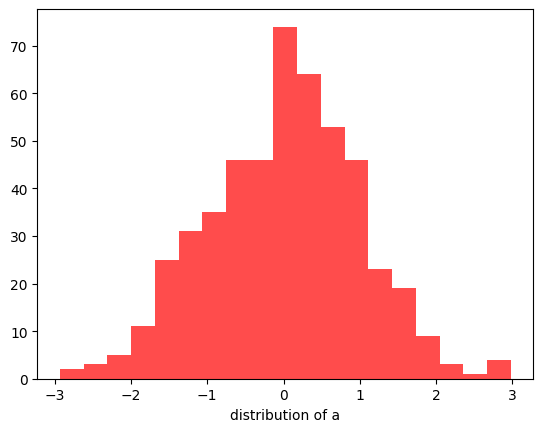

c


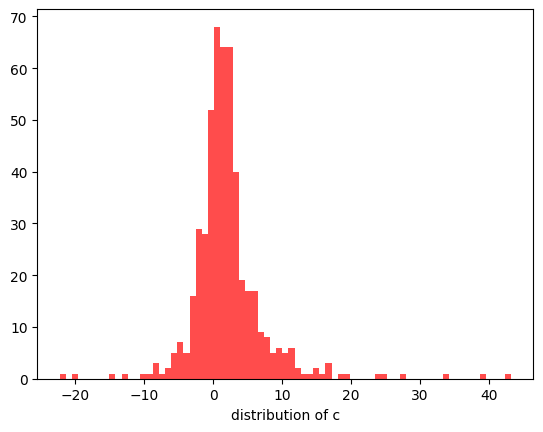

e


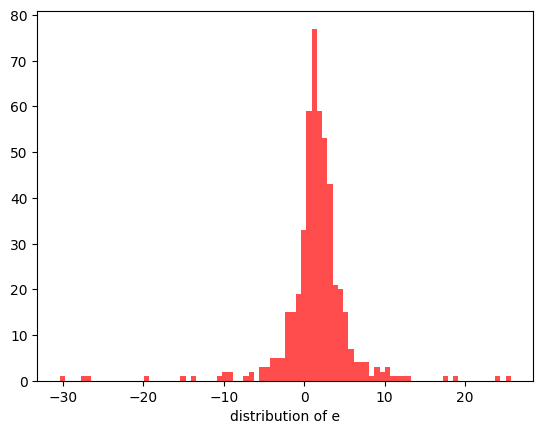

[[-0.6038249549186573,
  0.4256586431697116,
  -0.011891150107528102,
  -1.26203482744436,
  -0.7875573391676597,
  -0.00976198914789139,
  0.6865303946851331,
  -0.31827258887467624,
  0.2486125621153671,
  -0.19575797243590826,
  -1.5530968243362828,
  -0.6413350396235281,
  0.0006519962169595108,
  1.041229601179807,
  -1.8708535291986306,
  -1.3833225188628195,
  -0.9524564777231584,
  1.0499875665560723,
  -0.7558033292919791,
  -2.3197872849892445,
  -0.998217608159667,
  0.45192787996675254,
  1.1896913567351195,
  -0.6245390075735496,
  2.26938942438198,
  0.5896690928743189,
  -0.5403607642708129,
  -0.6539410181723572,
  0.6460066401331621,
  -0.8500318341753449,
  0.47830116881700135,
  1.7948643551496097,
  0.7067256861968144,
  0.3958869266316048,
  -1.1355197663805536,
  -0.30647928608289954,
  0.886023577546256,
  -1.966224745147479,
  0.1084742146287079,
  -1.1662574047120138,
  -1.348504846928095,
  -0.34913358616414764,
  -0.5082297758759399,
  -0.03511947881198364,
 

In [17]:

# Plot the sampled data
hscm.plot_data()


In [18]:
import json

# Function to save sampled data to a JSON file
def save_sampled_data(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

# Save the sampled data
save_sampled_data(sampled_data, 'data/sampled_data.json')

print("Sampled data has been saved to 'sampled_data.json'")


Sampled data has been saved to 'sampled_data.json'


In [19]:

# Set distributions from the loaded data
hscm.set_distribution_from_data()


In [20]:
# Perform additional analysis or modify the model as needed
# For example, you can change the graph structure or random functions here

# Re-sample data after modifications
new_sampled_data = hscm.resample_data()


a


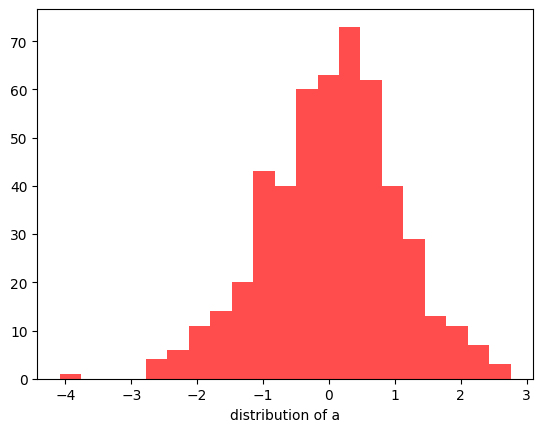

c


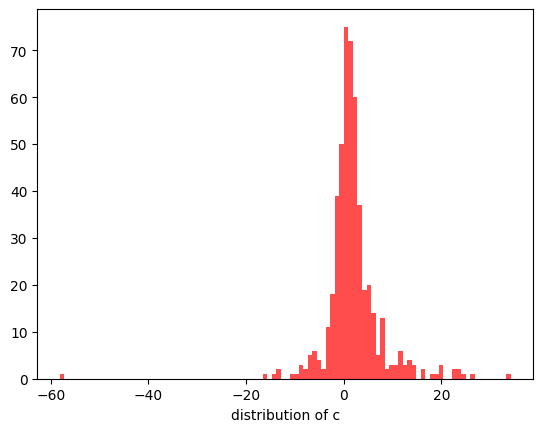

e


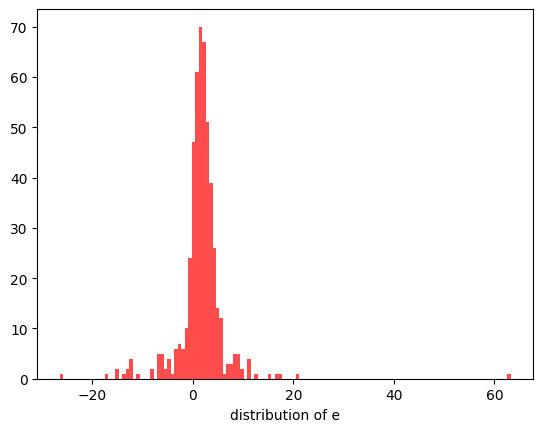

[[-0.6038249549186573,
  0.4256586431697116,
  -0.011891150107528102,
  -1.26203482744436,
  -0.7875573391676597,
  -0.00976198914789139,
  0.6865303946851331,
  -0.31827258887467624,
  0.2486125621153671,
  -0.19575797243590826,
  -1.5530968243362828,
  -0.6413350396235281,
  0.0006519962169595108,
  1.041229601179807,
  -1.8708535291986306,
  -1.3833225188628195,
  -0.9524564777231584,
  1.0499875665560723,
  -0.7558033292919791,
  -2.3197872849892445,
  -0.998217608159667,
  0.45192787996675254,
  1.1896913567351195,
  -0.6245390075735496,
  2.26938942438198,
  0.5896690928743189,
  -0.5403607642708129,
  -0.6539410181723572,
  0.6460066401331621,
  -0.8500318341753449,
  0.47830116881700135,
  1.7948643551496097,
  0.7067256861968144,
  0.3958869266316048,
  -1.1355197663805536,
  -0.30647928608289954,
  0.886023577546256,
  -1.966224745147479,
  0.1084742146287079,
  -1.1662574047120138,
  -1.348504846928095,
  -0.34913358616414764,
  -0.5082297758759399,
  -0.03511947881198364,
 

In [21]:

hscm.plot_data_resampled()

In [23]:
print(new_sampled_data)

{'a0': 0.4713528054510942, 'a1': 0.22107441957894303, 'a2': 0.5179165926061843, 'a3': -0.2732251893862723, 'a4': 0.44175620122845044, 'a5': 0.5076905678355943, 'a6': 0.29336523188374336, 'a7': -0.6127335485483407, 'a8': 0.7315819142692509, 'a9': -0.49134185910125006, 'a10': -0.967405930186576, 'a11': -2.297899683412554, 'a12': 0.37747216535769734, 'a13': 0.6679713684498068, 'a14': -0.6120940551148131, 'a15': 0.5081267316248302, 'a16': 0.3739132700414757, 'a17': 0.16931391539625112, 'a18': -1.6501971461652687, 'a19': 0.8256620204717919, 'a20': 0.1859708925880195, 'a21': -0.5813413146518348, 'a22': 0.24133560988775954, 'a23': 0.7789746843781814, 'a24': -0.07940823819521875, 'a25': 0.3214584371853378, 'a26': -0.5615126003765547, 'a27': 0.11324044485071849, 'a28': 0.7333586825031673, 'a29': -1.921621546408971, 'a30': 0.21425880454239407, 'a31': -2.0279236293944023, 'a32': -1.0433457394394339, 'a33': -1.1341146678829972, 'a34': -1.8891327398823952, 'a35': 0.017006295842928447, 'a36': 1.0327

In [24]:
save_sampled_data(new_sampled_data, 'data/resampled_data.json')

a


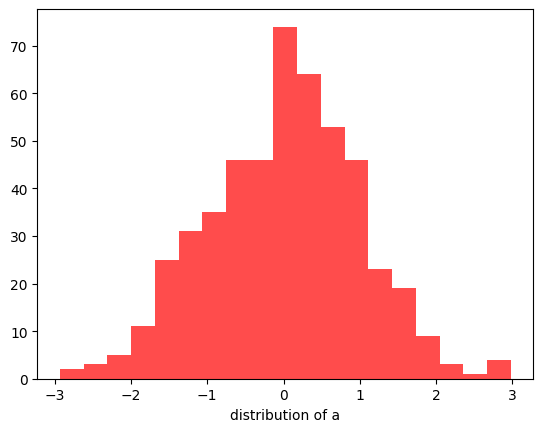

c


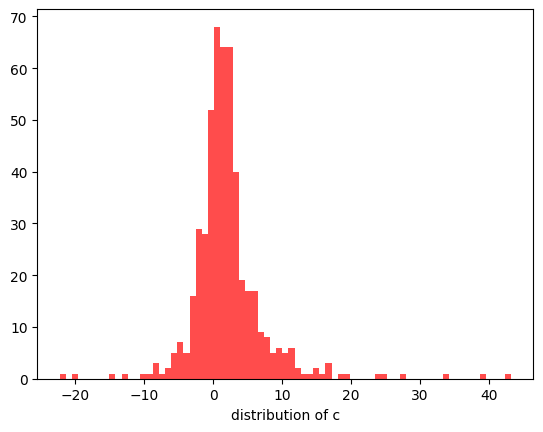

e


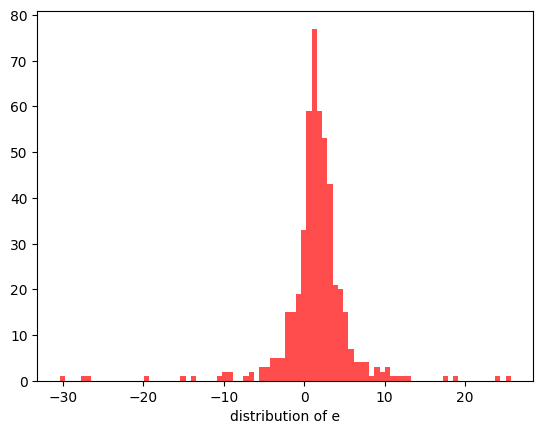

[[-0.6038249549186573,
  0.4256586431697116,
  -0.011891150107528102,
  -1.26203482744436,
  -0.7875573391676597,
  -0.00976198914789139,
  0.6865303946851331,
  -0.31827258887467624,
  0.2486125621153671,
  -0.19575797243590826,
  -1.5530968243362828,
  -0.6413350396235281,
  0.0006519962169595108,
  1.041229601179807,
  -1.8708535291986306,
  -1.3833225188628195,
  -0.9524564777231584,
  1.0499875665560723,
  -0.7558033292919791,
  -2.3197872849892445,
  -0.998217608159667,
  0.45192787996675254,
  1.1896913567351195,
  -0.6245390075735496,
  2.26938942438198,
  0.5896690928743189,
  -0.5403607642708129,
  -0.6539410181723572,
  0.6460066401331621,
  -0.8500318341753449,
  0.47830116881700135,
  1.7948643551496097,
  0.7067256861968144,
  0.3958869266316048,
  -1.1355197663805536,
  -0.30647928608289954,
  0.886023577546256,
  -1.966224745147479,
  0.1084742146287079,
  -1.1662574047120138,
  -1.348504846928095,
  -0.34913358616414764,
  -0.5082297758759399,
  -0.03511947881198364,
 

In [25]:


# Plot the new sampled data
hscm.plot_data()


In [26]:
sampled_intervention = hscm.resample_data_after_intervention('_b', lambda x: norm.ppf(x, 0, 1))

a


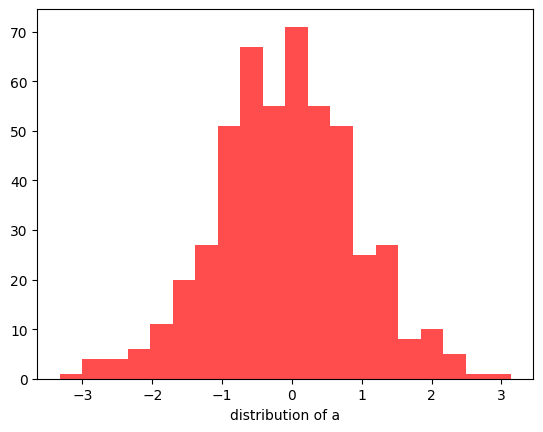

c


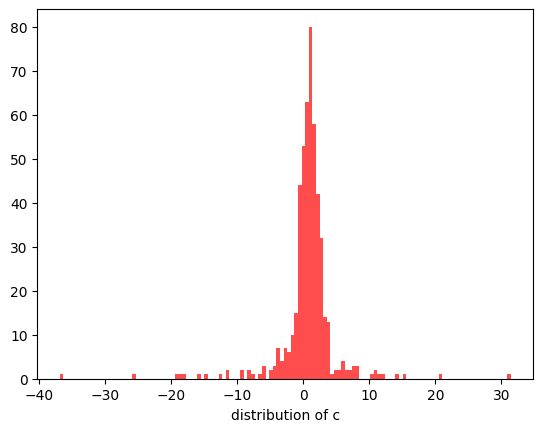

e


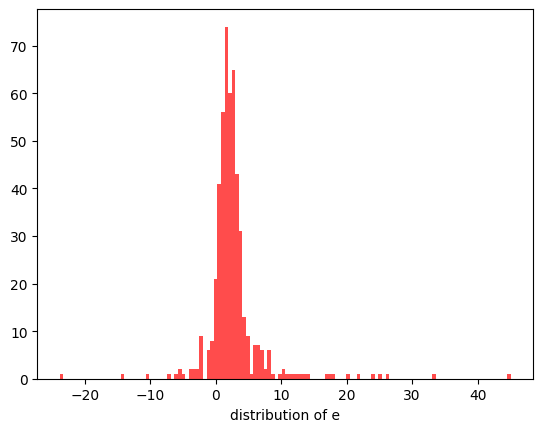

[[-1.8224378955699543,
  0.2765056757794859,
  -1.3689238594961899,
  0.7269022373455843,
  -0.009719832363957756,
  0.23946281127980185,
  0.20954725369268842,
  -0.5729828337891799,
  0.11532777300627438,
  0.9378054570556579,
  -0.8626368747035941,
  -0.02227584019508226,
  -0.325363314197214,
  1.1707926927075154,
  -0.23616275346034907,
  -0.830542493659931,
  1.414355022584552,
  -0.06576592686320254,
  0.16135260585545014,
  -0.6814653856974675,
  0.31343772079520055,
  0.7659048125453723,
  -0.09234249466780821,
  -0.5432879731158035,
  -0.8308778310879699,
  0.4765865866276878,
  -0.4939207676718363,
  -0.3008402422760943,
  -0.050445461597947674,
  0.4207840295542272,
  0.6260931923850477,
  1.219419510734526,
  1.5765488418157474,
  -0.14092045440291232,
  -0.4976360689659,
  -1.246890211213461,
  -1.186774475280404,
  1.3219953933558195,
  0.8199613267004647,
  1.288891493700445,
  0.7258961170380476,
  -0.5519303803675475,
  1.3093066407146539,
  0.2997583125300962,
  0.31

In [27]:
hscm.plot_data()

KL Divergence

In [28]:
from scipy.stats import gaussian_kde # type: ignore


In [29]:
def kl_divergence(p, q, bandwidth='scott'):
    """
    Calcule la divergence KL entre deux distributions empiriques représentées par des tableaux,
    en utilisant l'estimation de densité par noyau.
    
    :param p: Premier tableau de données
    :param q: Second tableau de données
    :param bandwidth: Méthode pour estimer la largeur de bande ('scott', 'silverman' ou un nombre)
    :return: Valeur de la divergence KL
    """
    # Assurez-vous que les tableaux ont la même taille
    min_len = min(len(p), len(q))
    p = p[:min_len]
    q = q[:min_len]
    
    # Estimation de densité par noyau
    kde_p = gaussian_kde(p, bw_method=bandwidth)
    kde_q = gaussian_kde(q, bw_method=bandwidth)
    
    # Créez un espace d'échantillonnage
    x = np.linspace(min(np.min(p), np.min(q)), max(np.max(p), np.max(q)), 10000)
    
    # Estimez les densités
    p_density = kde_p(x)
    q_density = kde_q(x)
    
    # Ajoutez un petit epsilon pour éviter la division par zéro
    epsilon = 1e-10
    p_density += epsilon
    q_density += epsilon
    
    # Normalisez les densités
    p_density /= np.sum(p_density)
    q_density /= np.sum(q_density)
    
    # Calculez la divergence KL
    return np.sum(p_density * np.log(p_density / q_density))

In [30]:
def kl_div_deprecated(original, resampled):
    # Calculate histograms
    hist_original, _ = np.histogram(original, bins=50, density=True)
    hist_resampled, _ = np.histogram(resampled, bins=50, density=True)
        
        # Add small constant to avoid division by zero
    hist_original += 1e-10
    hist_resampled += 1e-10
        
        # Normalize
    hist_original /= hist_original.sum()
    hist_resampled /= hist_resampled.sum()
        
        # Calculate KL divergence
    kl_divs = np.sum(hist_original * np.log(hist_original / hist_resampled))
    
    return kl_divs

In [40]:

def run_experiment(k):
    print(k)
    # Define the HSCM model structure
    nodes = ["a", "b", "c", "d", "e"]
    edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
    unit_nodes = ["a", "c", "e"]
    subunit_nodes = ["d", "b"]
    sizes = [50] * 50# You can adjust this based on your data
    
    # Initialize the HSCM model
    hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)
    
    # Define random functions for each node
    random_functions = {
        "a": lambda x: norm.ppf(x, 0, 1),
        "b": lambda x: norm.ppf(x, 0, 1),
        "c": lambda x: norm.ppf(x, 0, 1),
        "d": lambda x: norm.ppf(x, 0, 1),
        "e": lambda x: norm.ppf(x, 0, 1)
    }
    # Define additive functions for each node
    additive_functions = {
        "a": {},
        
        "b": {"a": lambda a: a},
        
        "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
        
        "d": {"b": lambda b: b +1, "c": lambda c: -c},
        
        "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
    }

    # Set up the HSCM model
    hscm.additive_model(additive_functions, random_functions)

    # Sample data from the model
    sampled_data = hscm.sample_data()
    print('sampled data !')
    save_sampled_data(sampled_data, f'data/sampled_data_{k}.json')
    
    # Set distributions from the sampled data
    hscm.set_distribution_from_data()

    # Resample data
    resampled_data = hscm.sample_data()
    save_sampled_data(resampled_data, f'data/resampled_data_{k}.json')
    print('sampled data 2 !!!!!')
    
    sampled_intervention = hscm.resample_data_after_intervention('_b', lambda x: norm.ppf(x, 0, 1))
    save_sampled_data(sampled_intervention, f'data/sampled_intervention_{k}.json')
    
    kl_divergences = {}
    for node in unit_nodes:
        original = [sampled_data[f"{node}{i}"] for i in range(len(sizes))]
        resampled = [resampled_data[f"{node}{i}"] for i in range(len(sizes))]
        
        kl_divergences[node] = kl_divergence(original, resampled)
    
        
    print('kl_divergences', kl_divergences)
    return kl_divergences

In [42]:

# Run the experiment 100 times
results = [run_experiment(k) for k in range(100)]


0
{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0xfc43f8a38220>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0xfc444b75f240>}} aggregator_functions
sampled data !
sampled data 2 !!!!!
kl_divergences {'a': 0.03265438257880332, 'c': 0.13756706473947988, 'e': 0.08137970826476398}
1
{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0xfc43f1367240>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0xfc43f8b8fe20>}} aggregator_functions
sampled data !
sampled data 2 !!!!!
kl_divergences {'a': 0.033024144154945215, 'c': 0.195949437522169, 'e': 0.23614793422472974}
2
{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lambda> at 0xfc43f9247f60>}, 'e': {'_d': <function HSCM.__init__.<locals>.<lambda> at 0xfc43f9244fe0>}} aggregator_functions
sampled data !
sampled data 2 !!!!!
kl_divergences {'a': 0.035941984943190355, 'c': 0.07455928497096673, 'e': 0.1428177381315066}
3
{'a': {}, 'c': {'_b': <function HSCM.__init__.<locals>.<lamb

if resampled, should be 0, else should be a certain value

In [43]:
print(results)

[{'a': 0.03265438257880332, 'c': 0.13756706473947988, 'e': 0.08137970826476398}, {'a': 0.033024144154945215, 'c': 0.195949437522169, 'e': 0.23614793422472974}, {'a': 0.035941984943190355, 'c': 0.07455928497096673, 'e': 0.1428177381315066}, {'a': 0.11236099809598389, 'c': 0.8942606901219339, 'e': 0.9387728093464147}, {'a': 0.08986754671575412, 'c': 0.16725641734716035, 'e': 0.16990917914760298}, {'a': 0.12447220962657535, 'c': 0.24072269403160723, 'e': 0.34777570510788125}, {'a': 0.03533765605045232, 'c': 0.027450974176695488, 'e': 0.04289293110715127}, {'a': 0.07144063058730218, 'c': 0.06947026898877957, 'e': 0.06810102865120819}, {'a': 0.012126676212831332, 'c': 0.041487851500952674, 'e': 0.06803686992159531}, {'a': 0.04093410500646639, 'c': 0.08868664262137517, 'e': 0.13589642122156043}, {'a': 0.07592536044319576, 'c': 0.19315955572027874, 'e': 0.18125623699610124}, {'a': 0.07859268448759303, 'c': 0.7721020583520313, 'e': 0.7846262210837583}, {'a': 0.012981746043240094, 'c': 0.066732

/tmp/ipykernel_13731/1790404846.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
/root/venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/root/venv/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will 

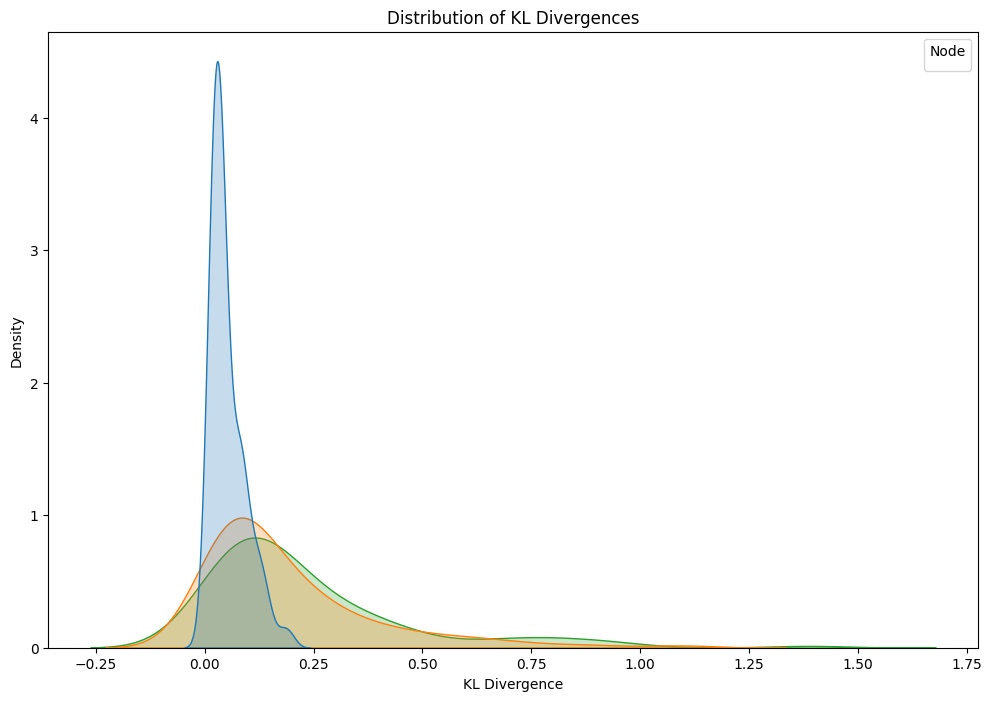

a:
  Mean: 0.0519
  Std Dev: 0.0396
  Min: 0.0018
  Max: 0.1941

c:
  Mean: 0.1913
  Std Dev: 0.2003
  Min: 0.0129
  Max: 1.0959

e:
  Mean: 0.2343
  Std Dev: 0.2424
  Min: 0.0285
  Max: 1.3884



In [46]:
# Analyze the results
import seaborn as sns
import pandas as pd

kl_divergences = {node: [result[node] for result in results] for node in results[0].keys()}

# Convert the data to a long format suitable for seaborn
df = pd.DataFrame([(node, div) for node, divs in kl_divergences.items() for div in divs],
                  columns=['Node', 'KL Divergence'])

# Plot the distribution of KL divergences for each node using KDE
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
plt.xlabel('KL Divergence')
plt.ylabel('Density')
plt.title('Distribution of KL Divergences')
plt.legend(title='Node')
plt.show()

# Print summary statistics
for node, divergences in kl_divergences.items():
    print(f"{node}:")
    print(f"  Mean: {np.mean(divergences):.4f}")
    print(f"  Std Dev: {np.std(divergences):.4f}")
    print(f"  Min: {np.min(divergences):.4f}")
    print(f"  Max: {np.max(divergences):.4f}")
    print()

AUC

In [70]:

def load_data_from_json(file_path):
    """
    Load data from a JSON file and return it as a dictionary.
    
    :param file_path: Path to the JSON file
    :return: Dictionary containing the loaded data
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None



In [71]:

# Specify the path to your JSON file
json_file_path = 'data/sampled_data.json'

# Load the data
data_dict = load_data_from_json(json_file_path)

# Check if data was loaded successfully
if data_dict is not None:
    print("Data loaded successfully. You can now use data_dict in your analysis.")
else:
    print("Failed to load data. Please check the file path and format.")


Data successfully loaded from data/sampled_data.json
Data loaded successfully. You can now use data_dict in your analysis.


In [72]:
data_dict_resampled = load_data_from_json('data/resampled_data.json')

Data successfully loaded from data/resampled_data.json


In [73]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)



In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [75]:


def hscm_classification_pipeline(X, y):
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot feature importances
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(feature_names)), importances[indices])
    plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    #plt.show()

    return accuracy


In [76]:

original_vectors = create_vector(data_dict, sizes)
new_vectors = create_vector(data_dict_resampled, sizes)
X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


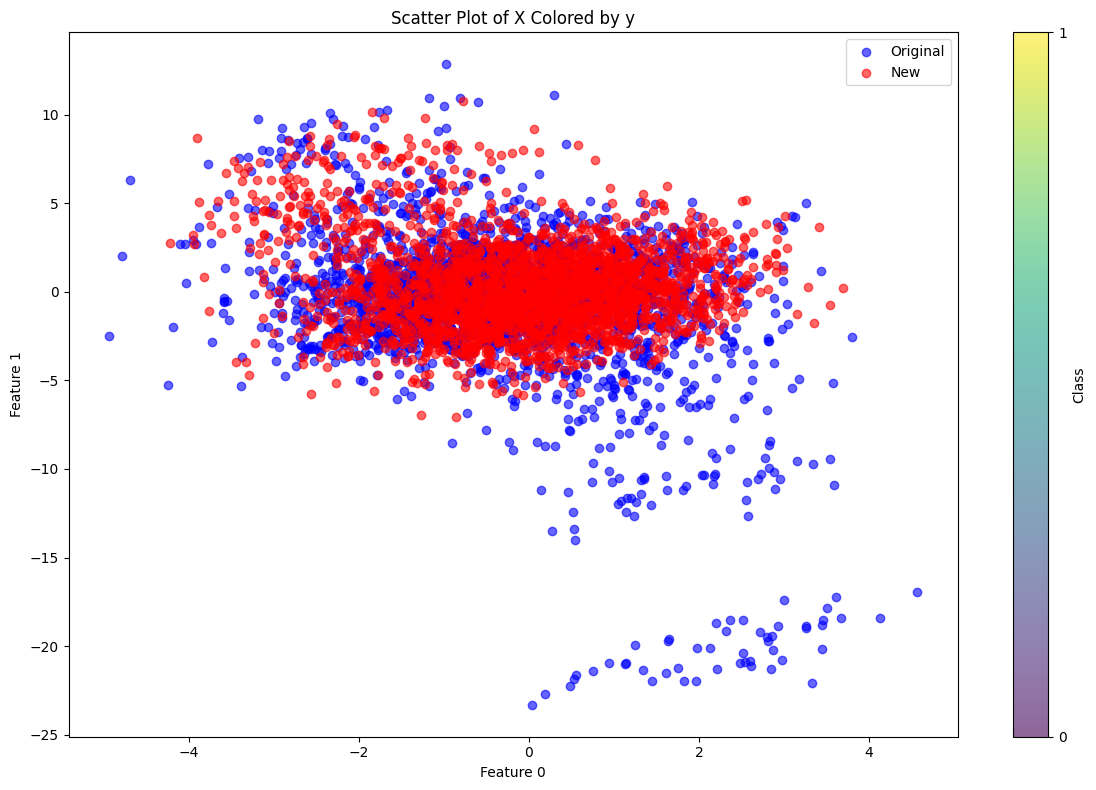

In [77]:
# Plotting X according to its color in y

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot points for y=0 (original vectors)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Original', alpha=0.6)

# Plot points for y=1 (new vectors)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='New', alpha=0.6)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of X Colored by y')
plt.legend()

# Add a colorbar
plt.colorbar(ticks=[0, 1], label='Class')

plt.tight_layout()
plt.show()


Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       500
           1       0.56      0.58      0.57       500

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.56      0.56      0.56      1000



0.564

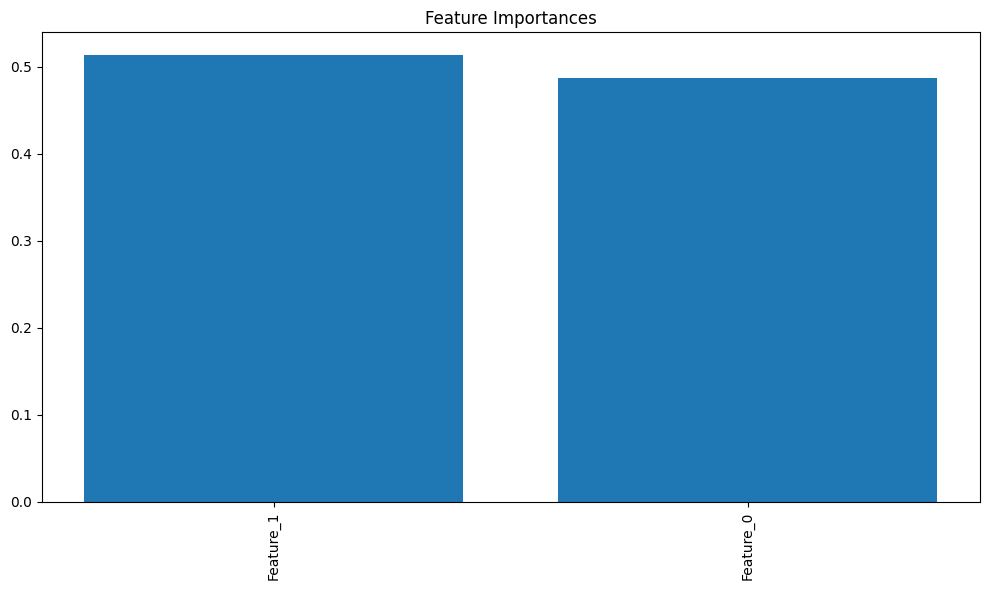

In [78]:
hscm_classification_pipeline(X, y)

In [79]:
def run_classification(k):
    list = []
    for i in range(k):
        data_dict = load_data_from_json(f'data/sampled_data_{i}.json')
        data_dict_resampled = load_data_from_json(f'data/resampled_data_{i}.json')        
        original_vectors = create_vector(data_dict, sizes)
        new_vectors = create_vector(data_dict_resampled, sizes)
        X = np.vstack((original_vectors, new_vectors))
        y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new
        accuracy_score = hscm_classification_pipeline(X, y)
        list.append(accuracy_score)
    return list

Data successfully loaded from data/sampled_data_0.json
Data successfully loaded from data/resampled_data_0.json
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       500
           1       0.55      0.52      0.53       500

    accuracy                           0.55      1000
   macro avg       0.55      0.55      0.55      1000
weighted avg       0.55      0.55      0.55      1000

Data successfully loaded from data/sampled_data_1.json
Data successfully loaded from data/resampled_data_1.json
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       500
           1       0.55      0.53      0.54       500

    accuracy                           0.55      1000
   macro avg       0.55      0.55      0.55      1000
weighted avg       0.55      0.55      0.55      1000

Data successfully loaded from data/sampled_dat

/tmp/ipykernel_13731/3675280145.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       500
           1       0.56      0.53      0.55       500

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.56      0.56      0.56      1000

Data successfully loaded from data/sampled_data_22.json
Data successfully loaded from data/resampled_data_22.json
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       500
           1       0.58      0.53      0.56       500

    accuracy                           0.58      1000
   macro avg       0.58      0.58      0.58      1000
weighted avg       0.58      0.58      0.58      1000

Data successfully loaded from data/sampled_data_23.json
Data successfully loaded from data/resampled_data_23.json
Accuracy: 0.56
Classification Report:
    

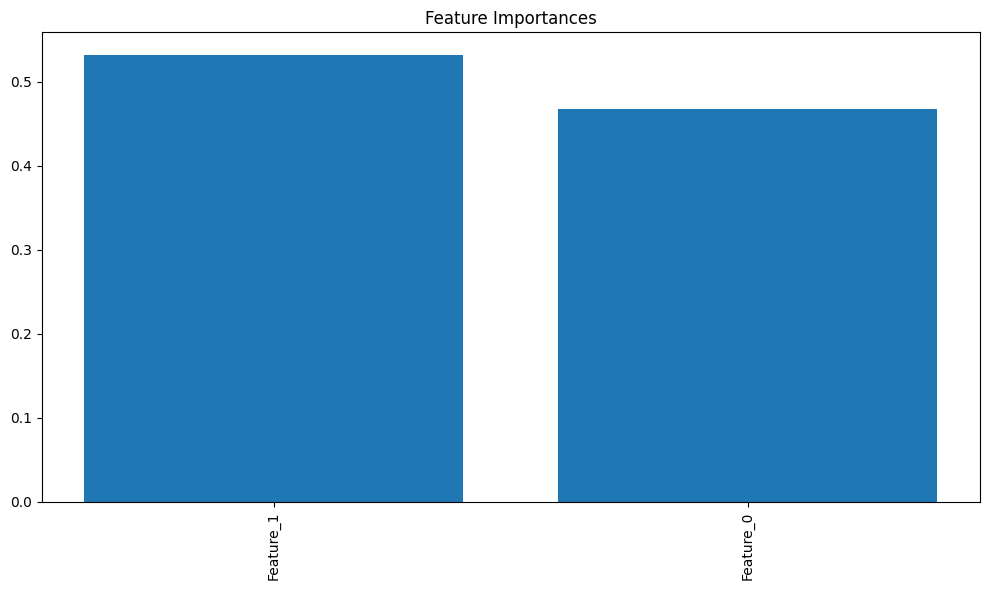

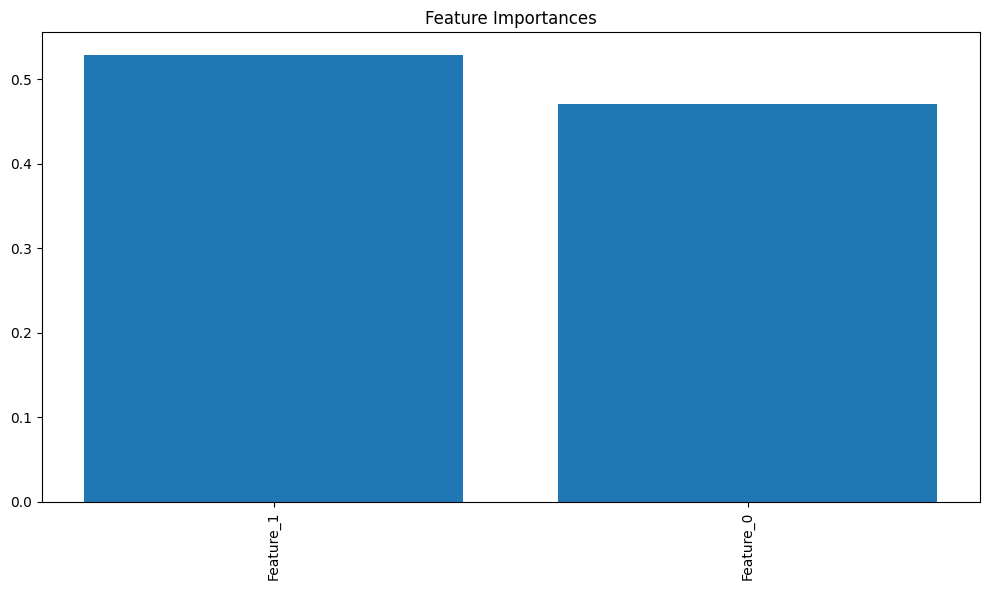

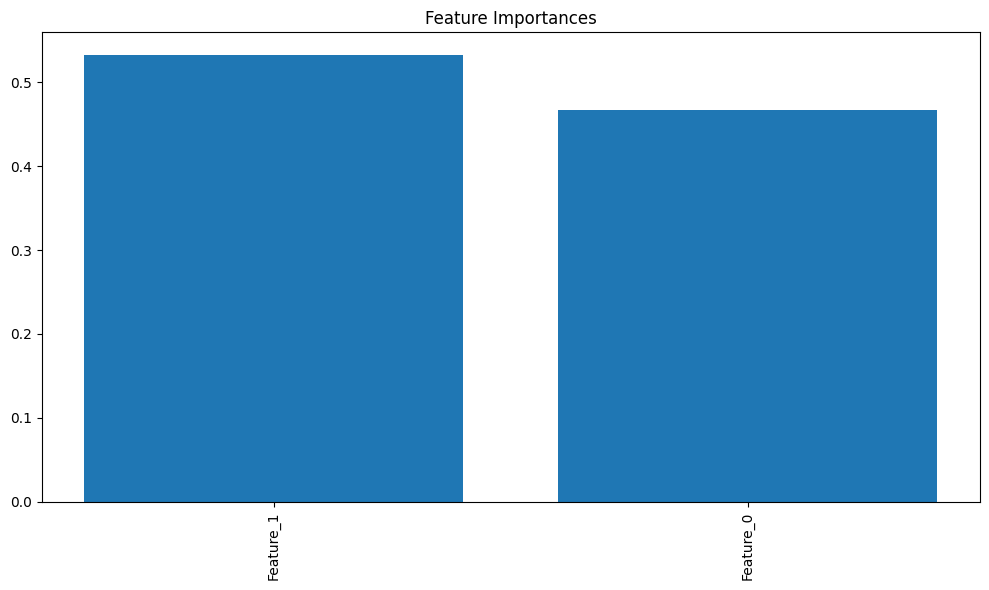

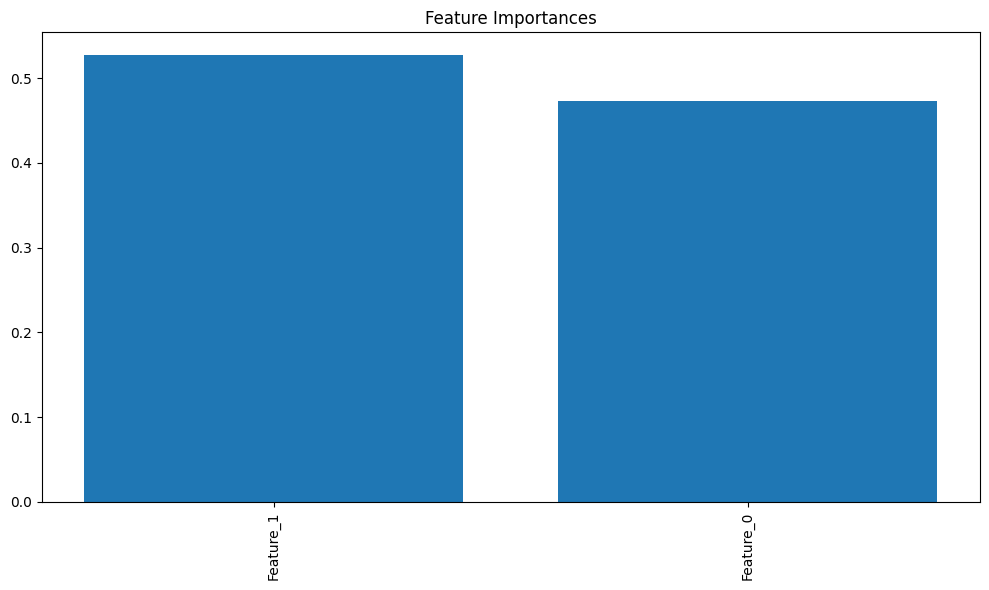

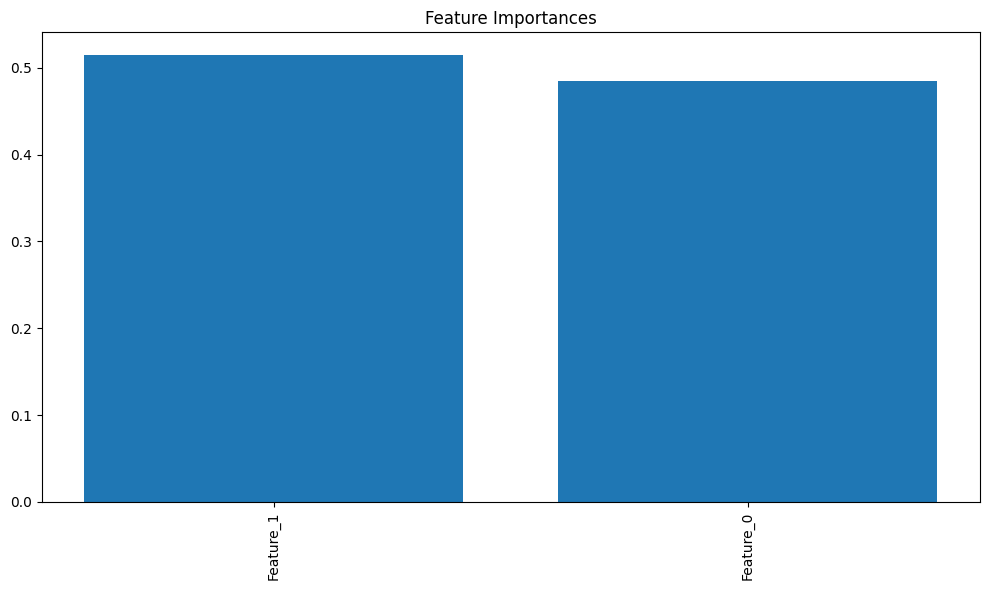

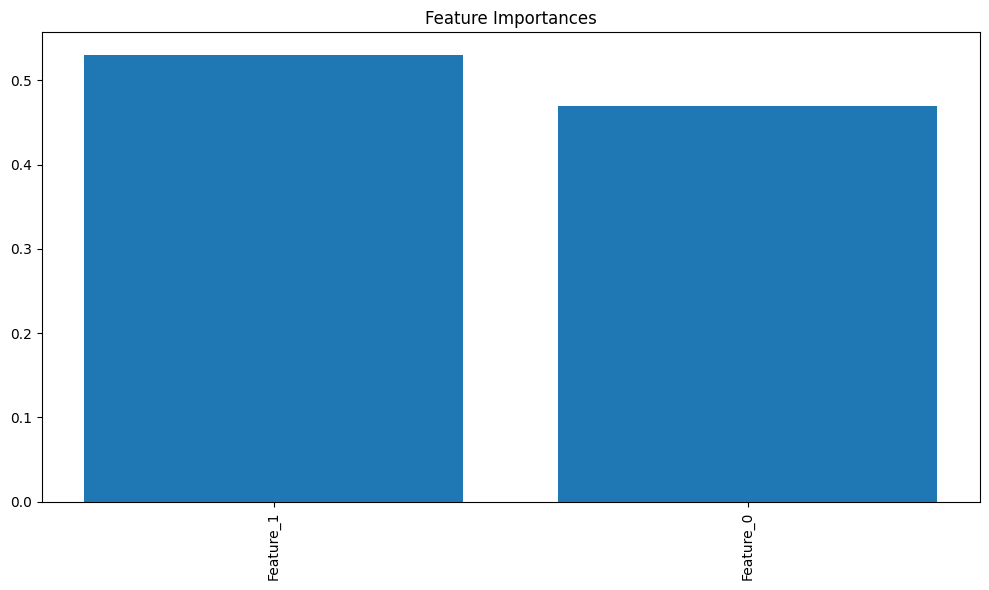

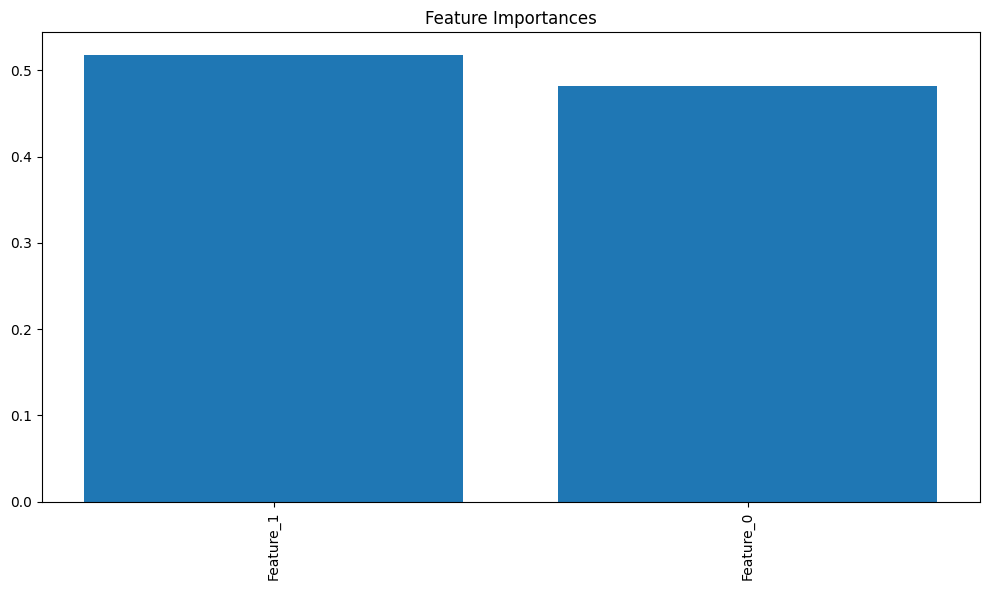

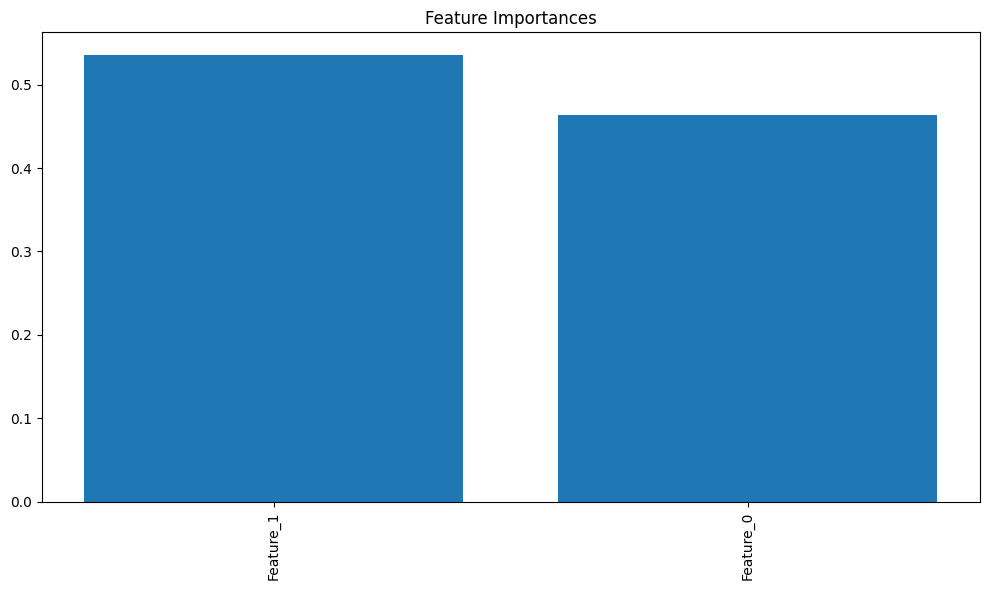

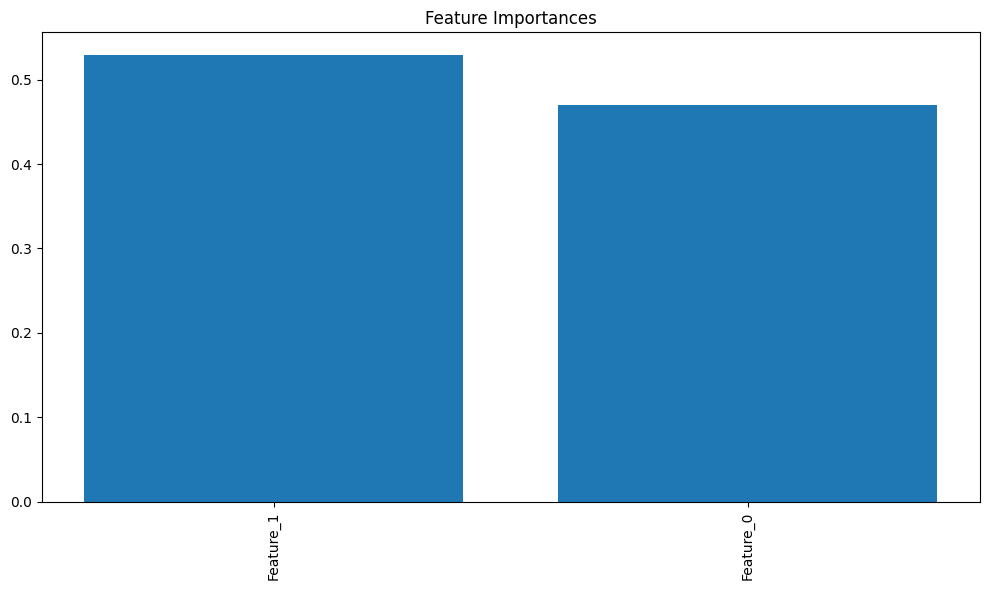

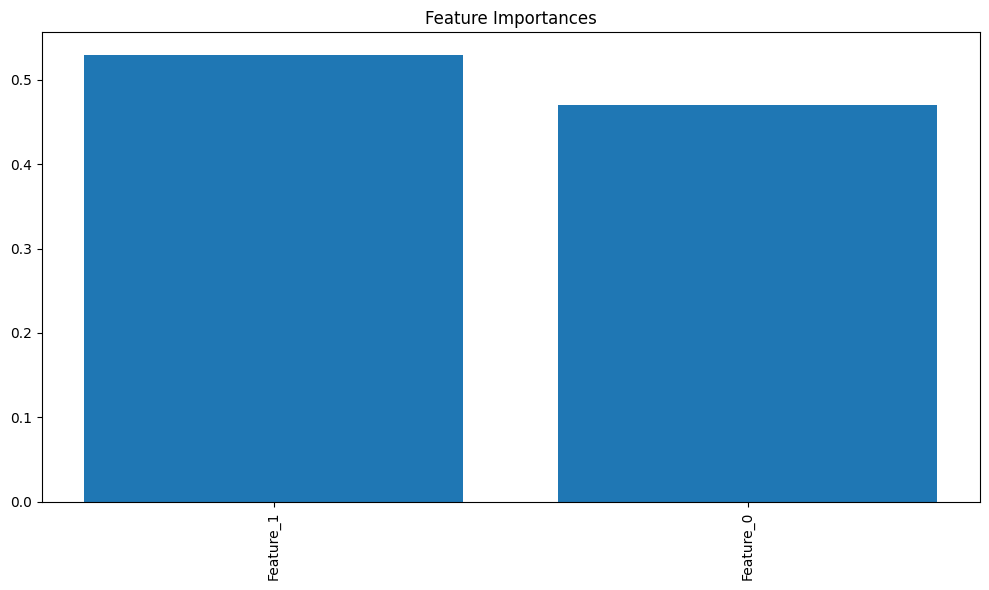

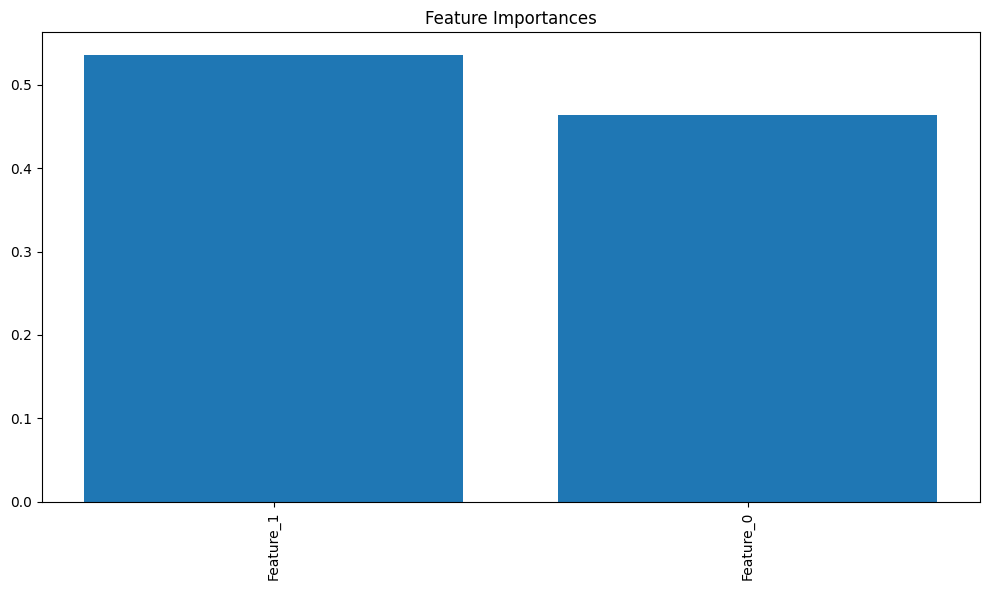

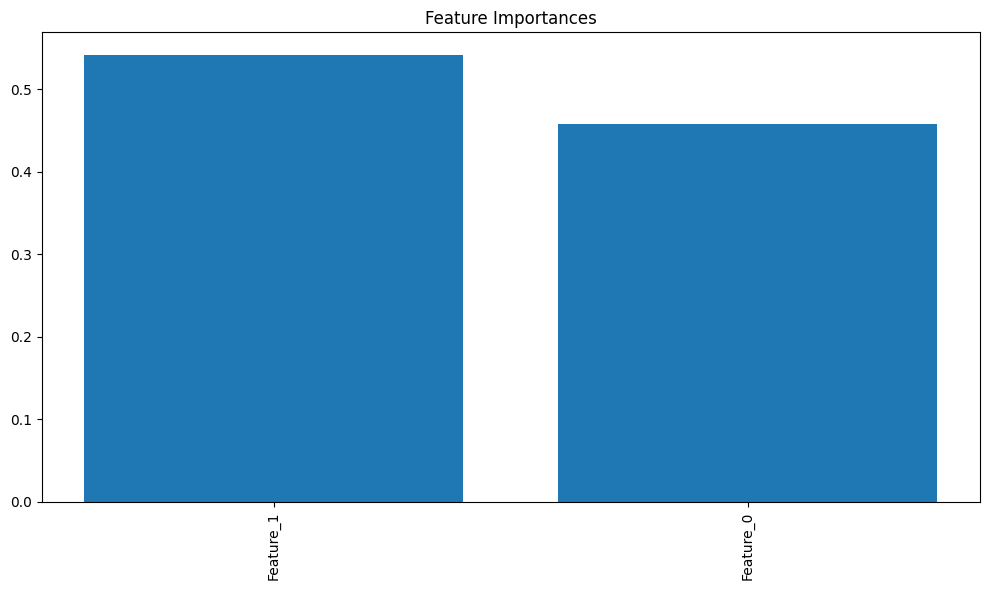

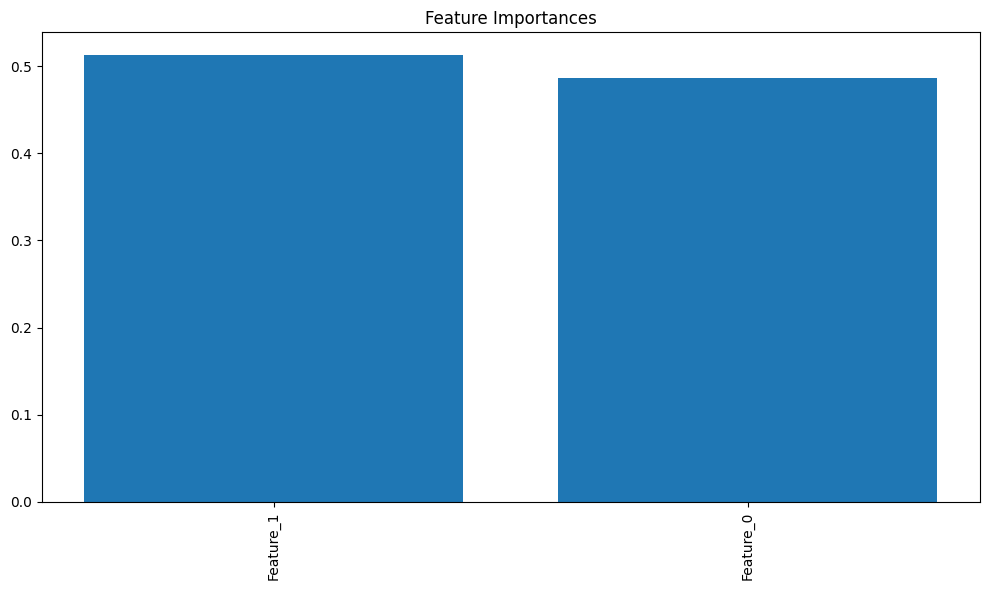

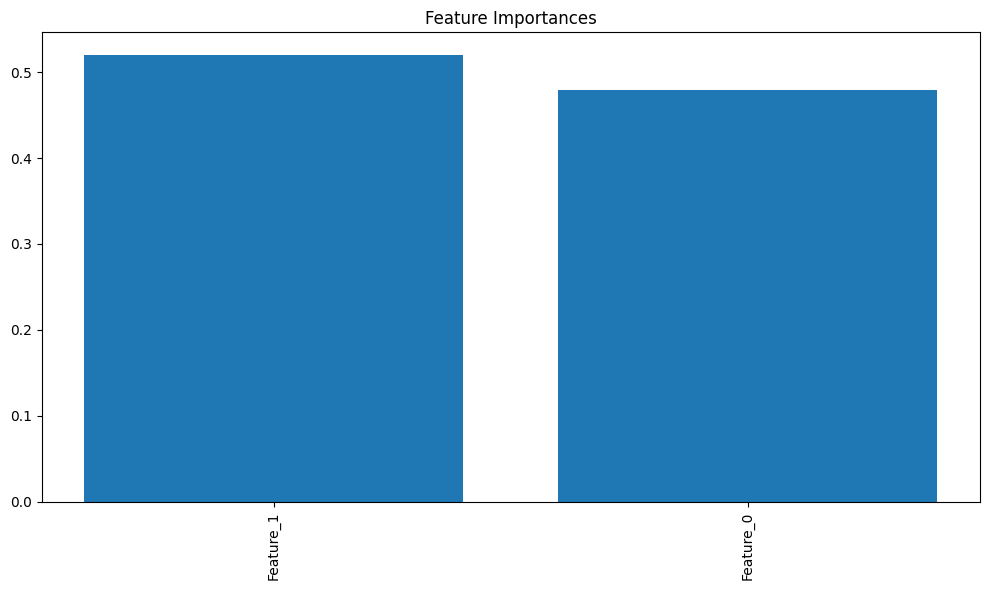

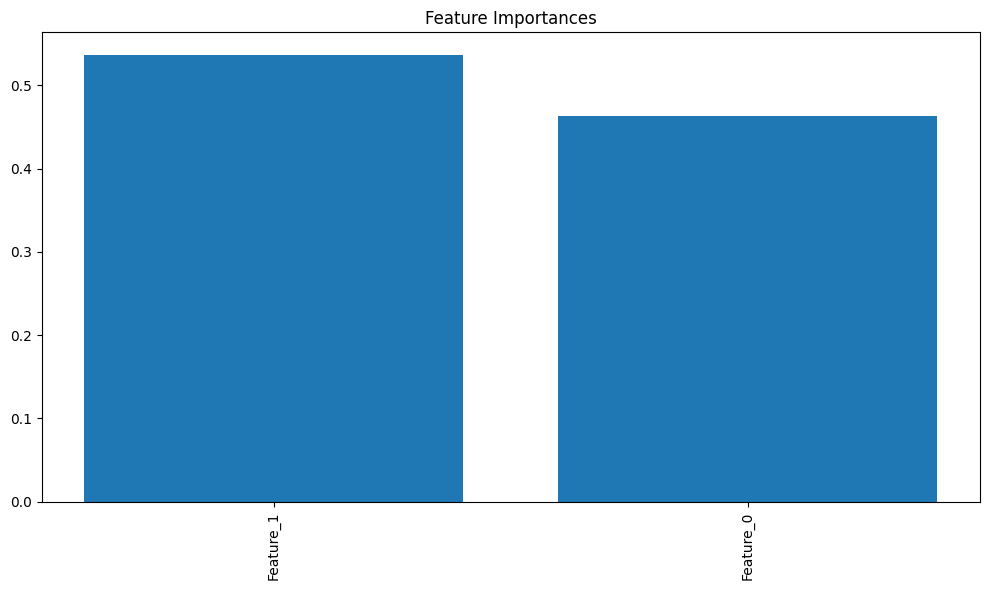

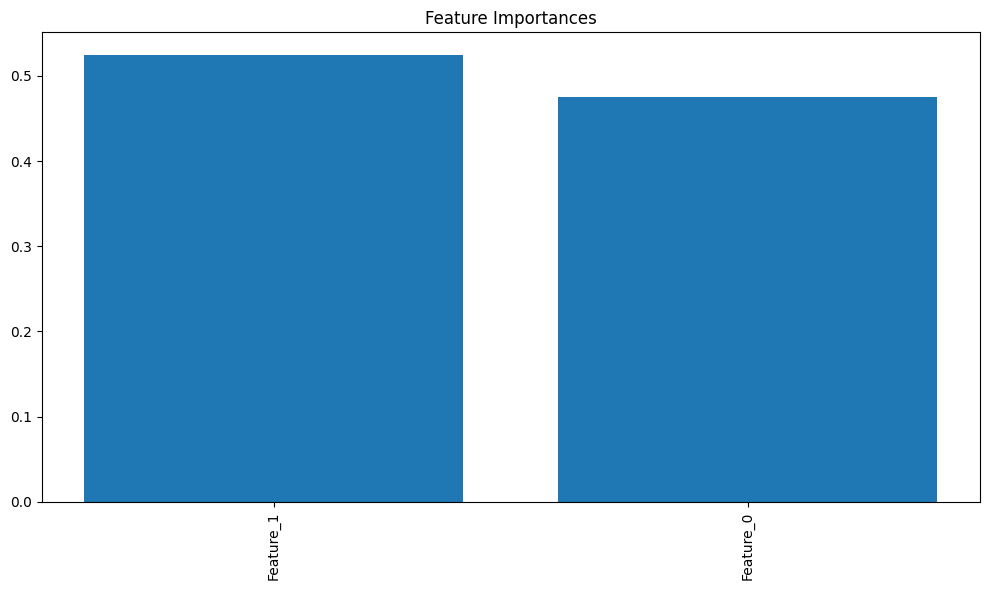

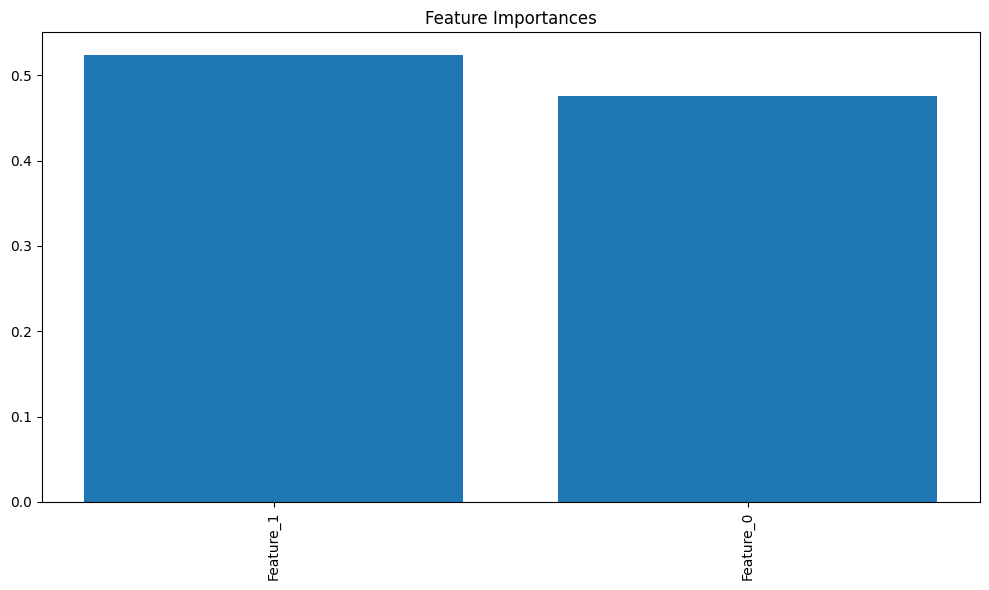

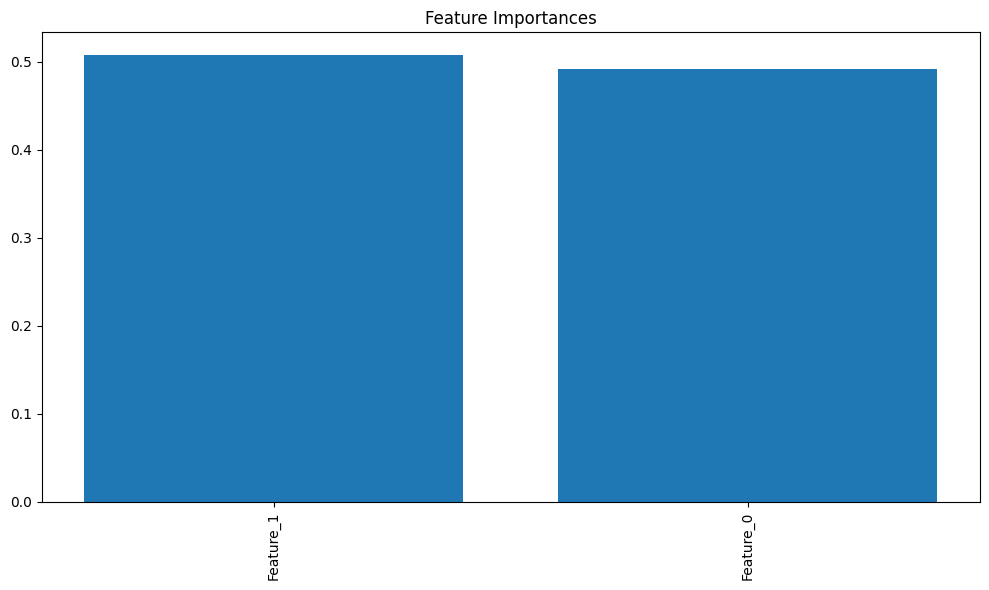

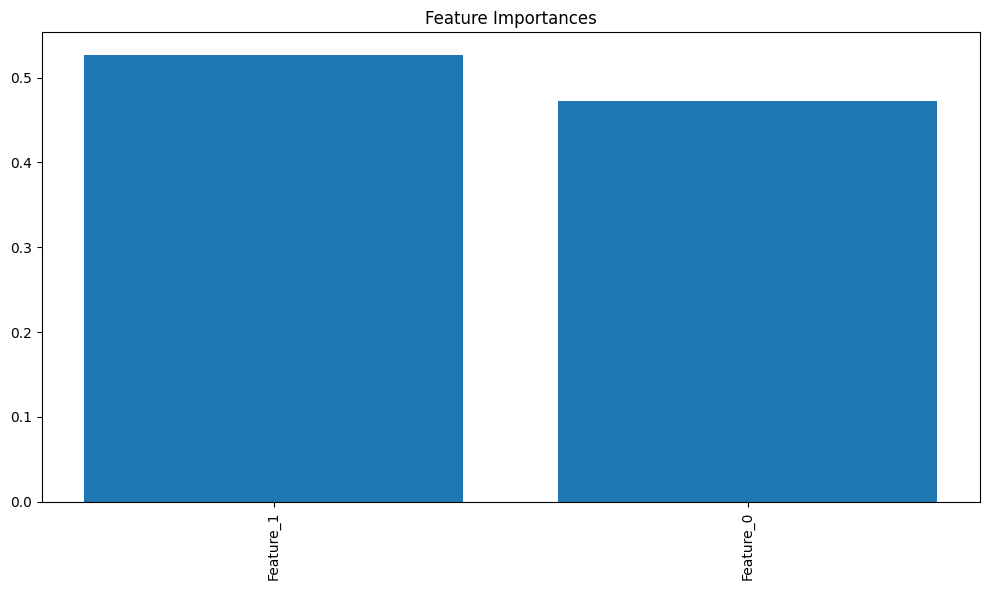

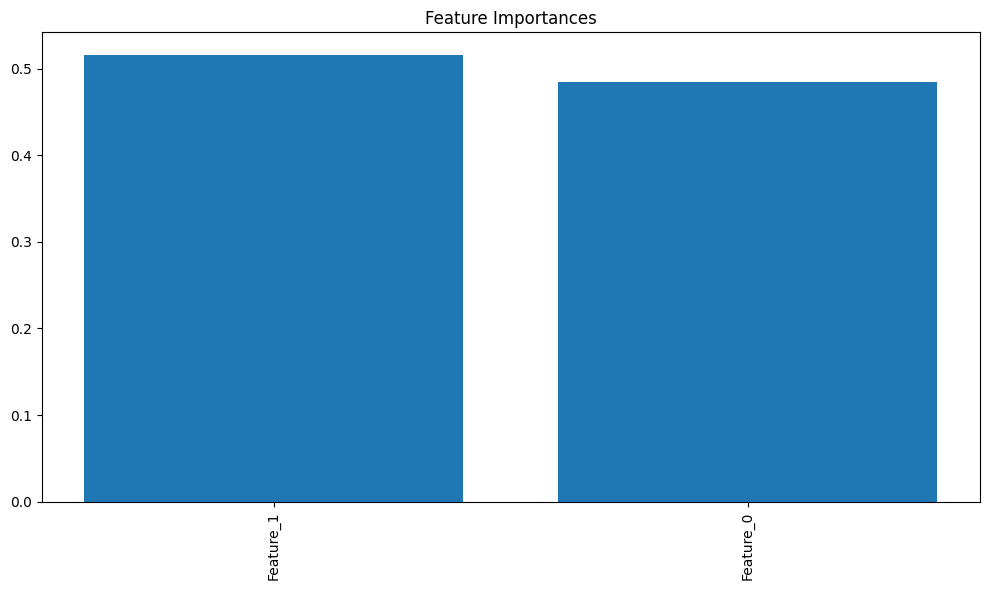

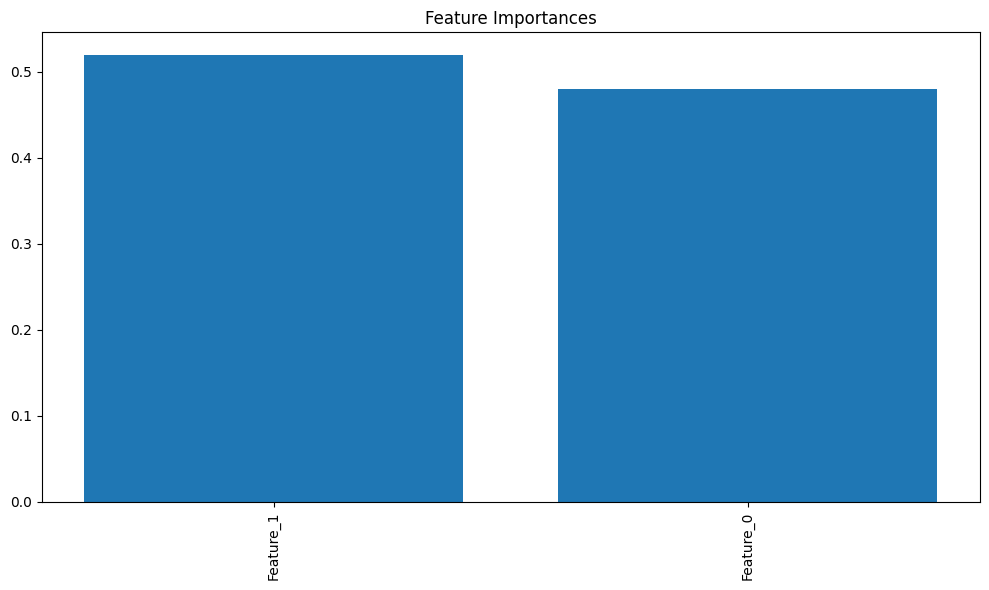

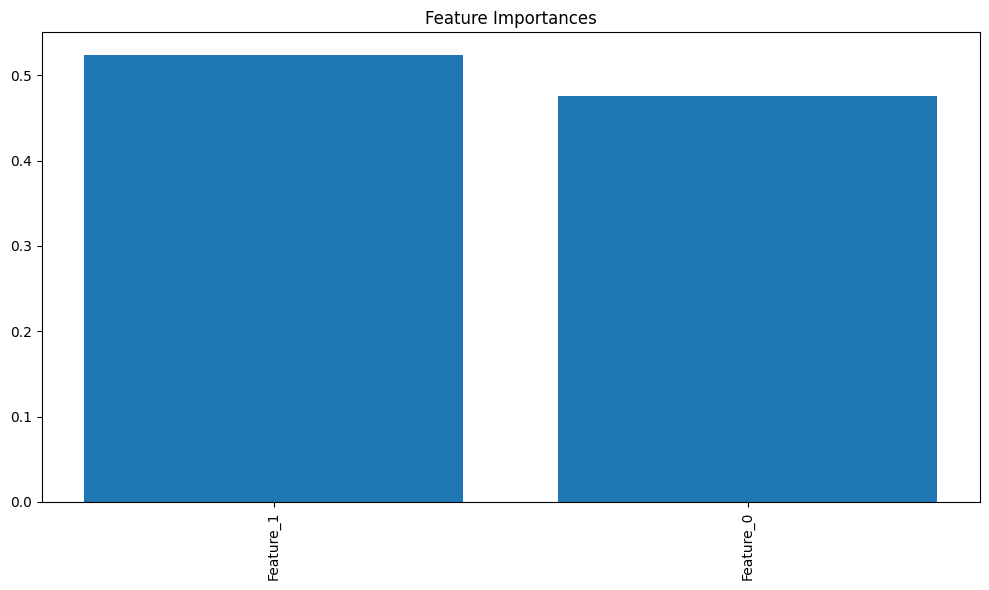

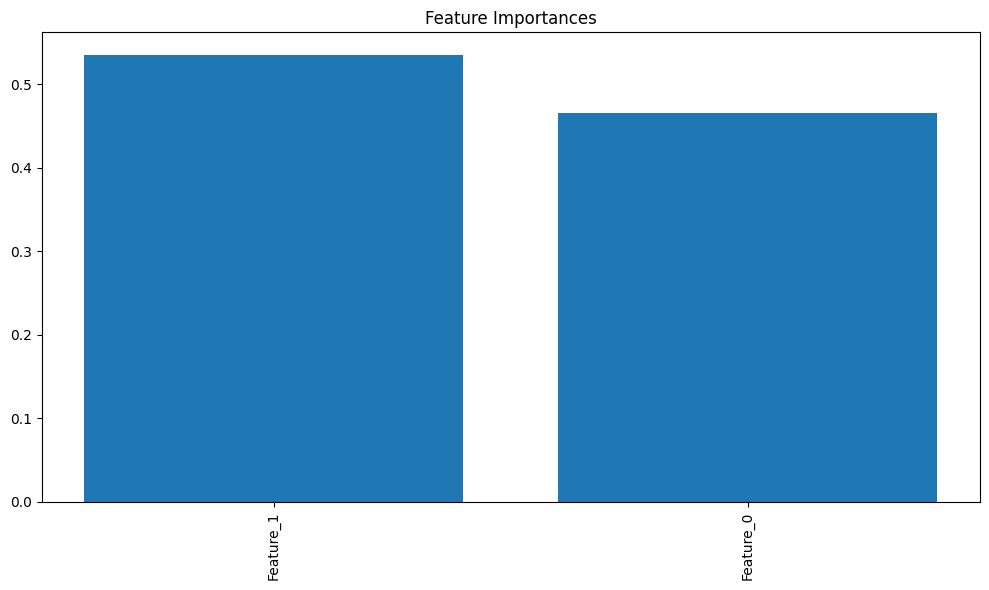

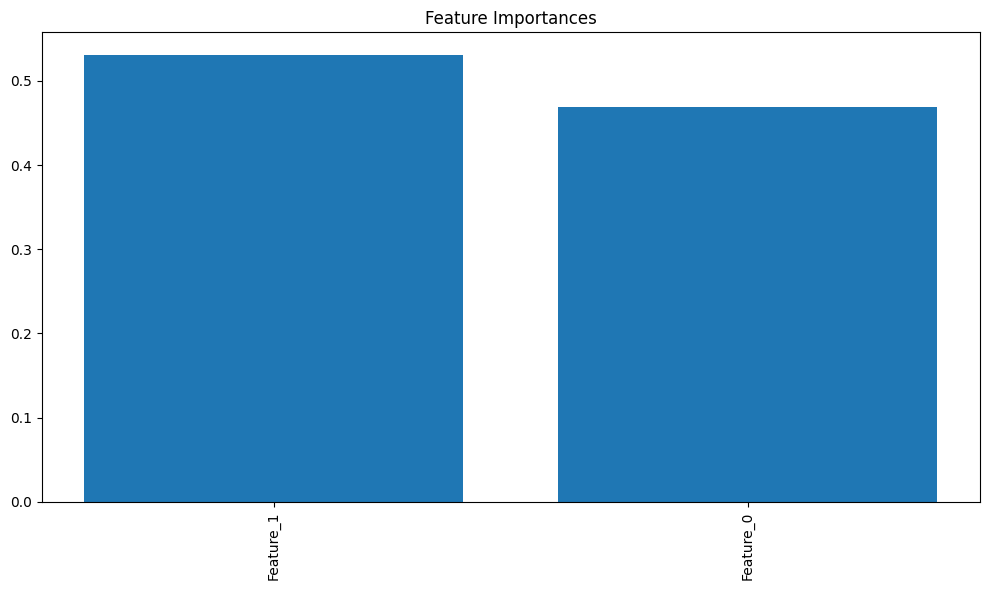

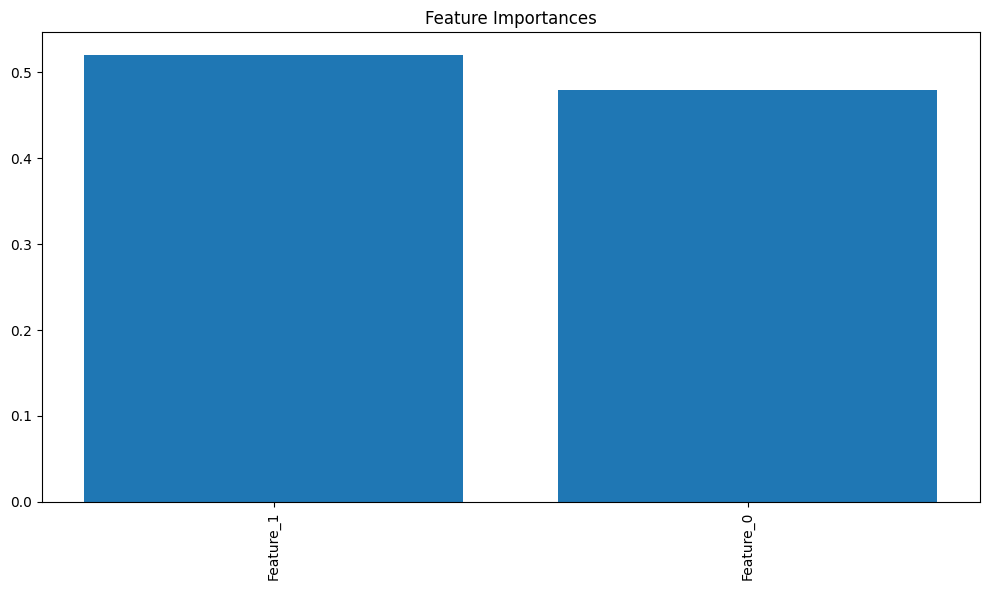

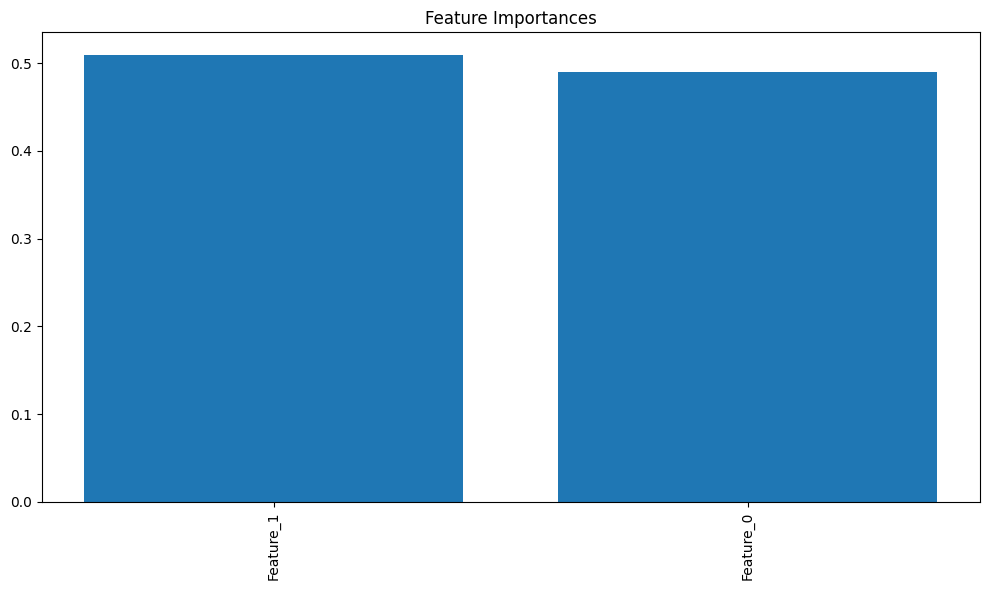

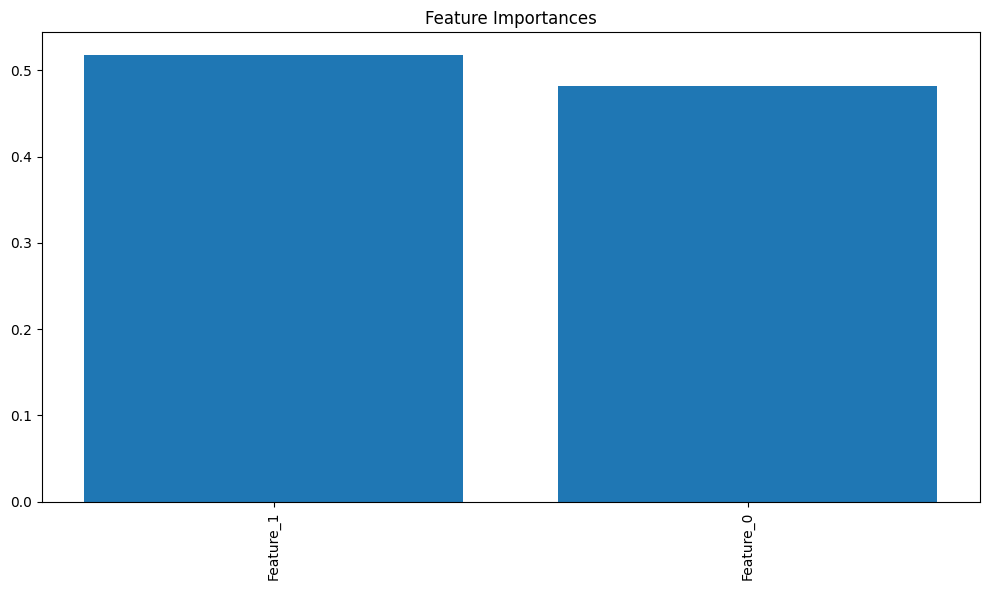

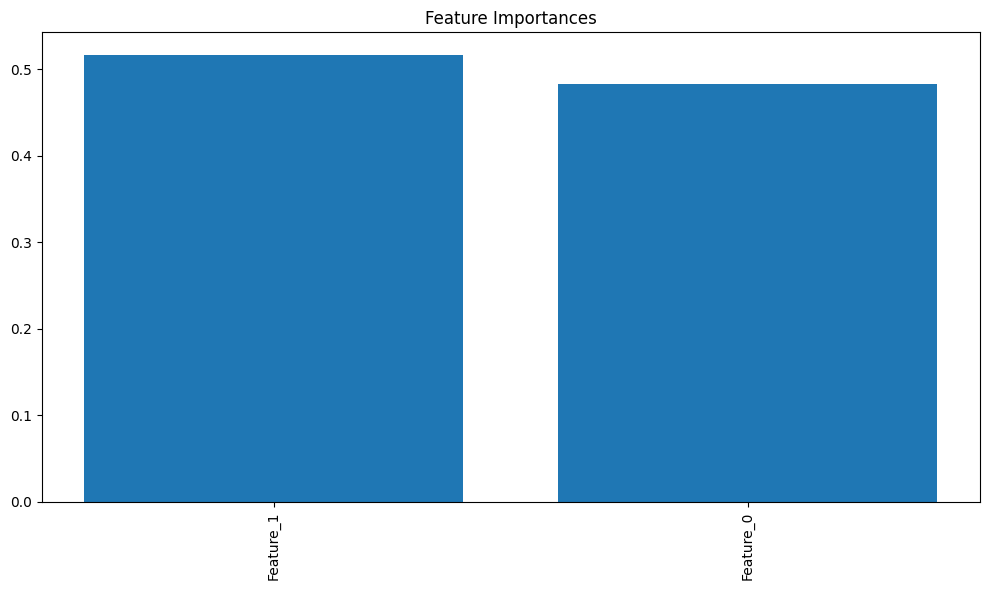

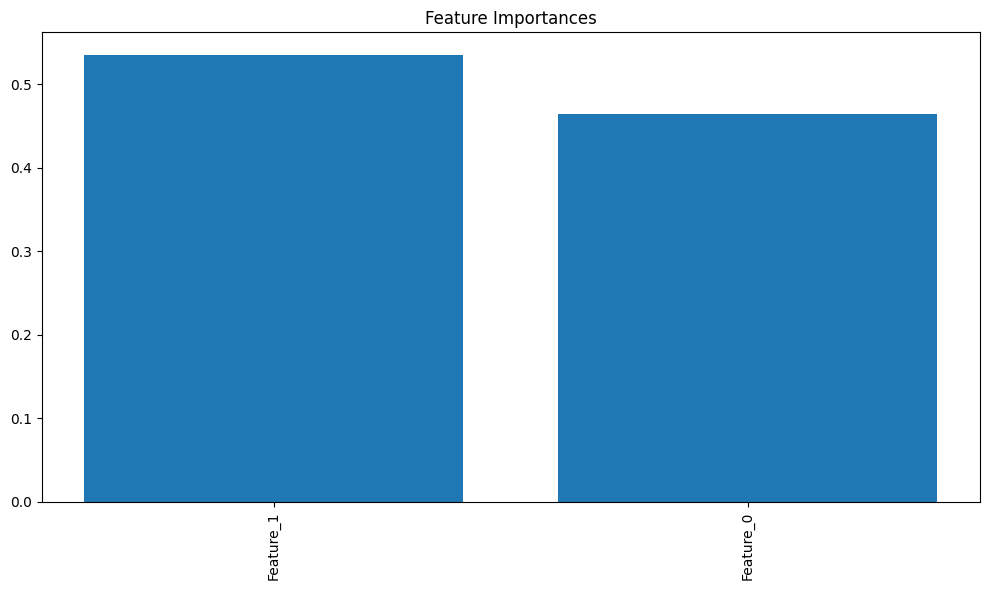

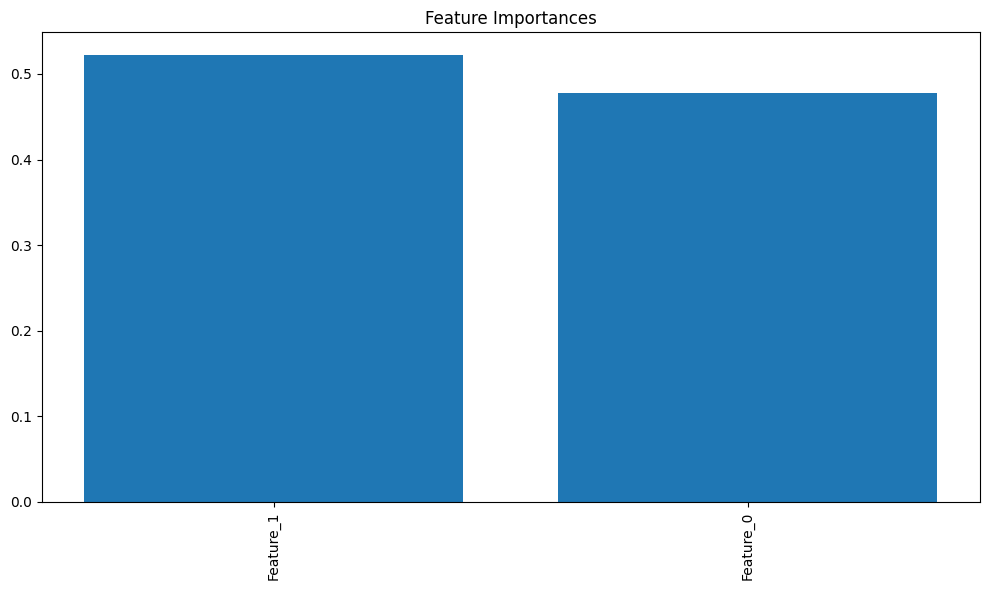

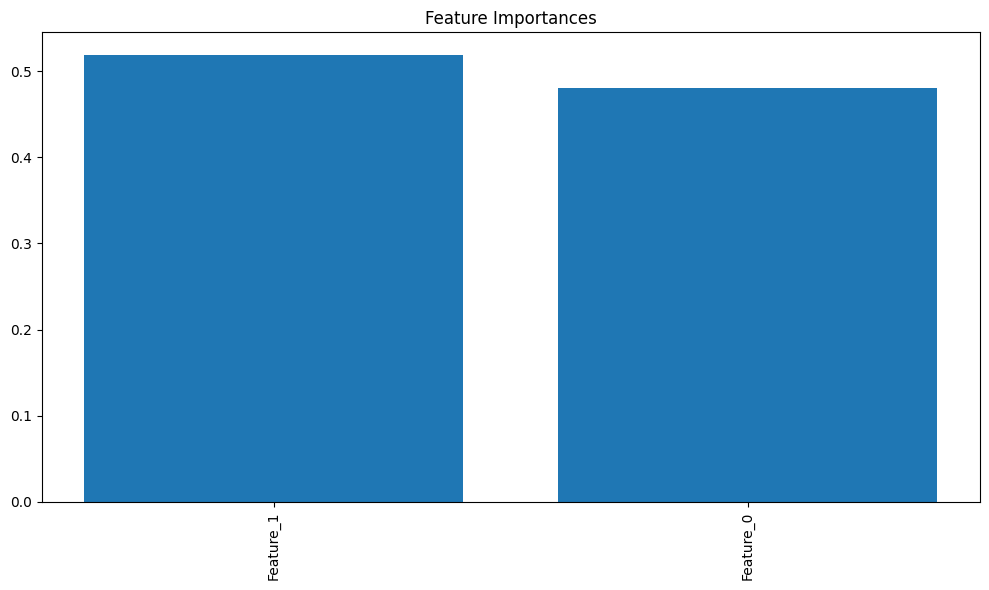

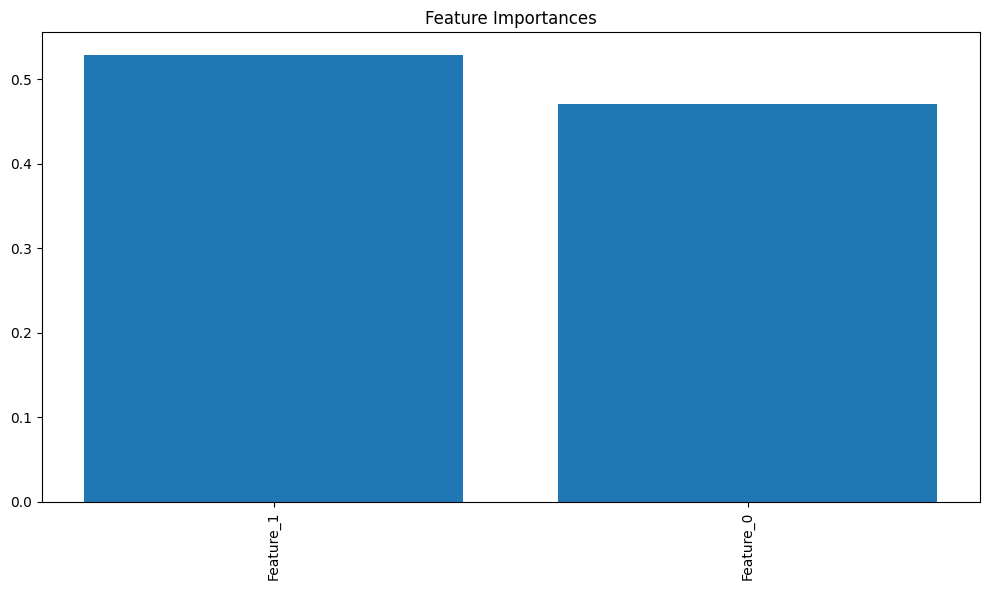

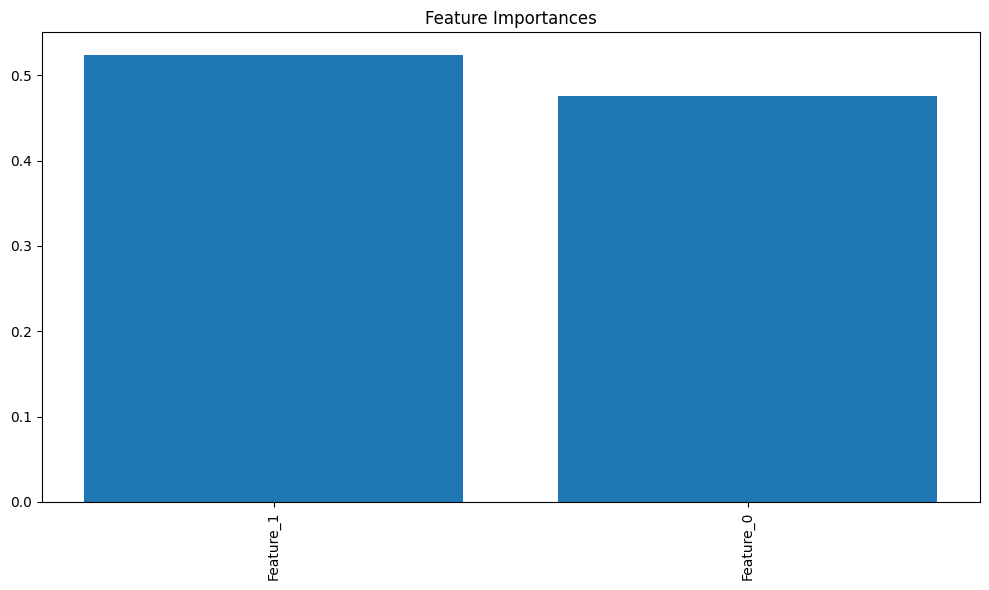

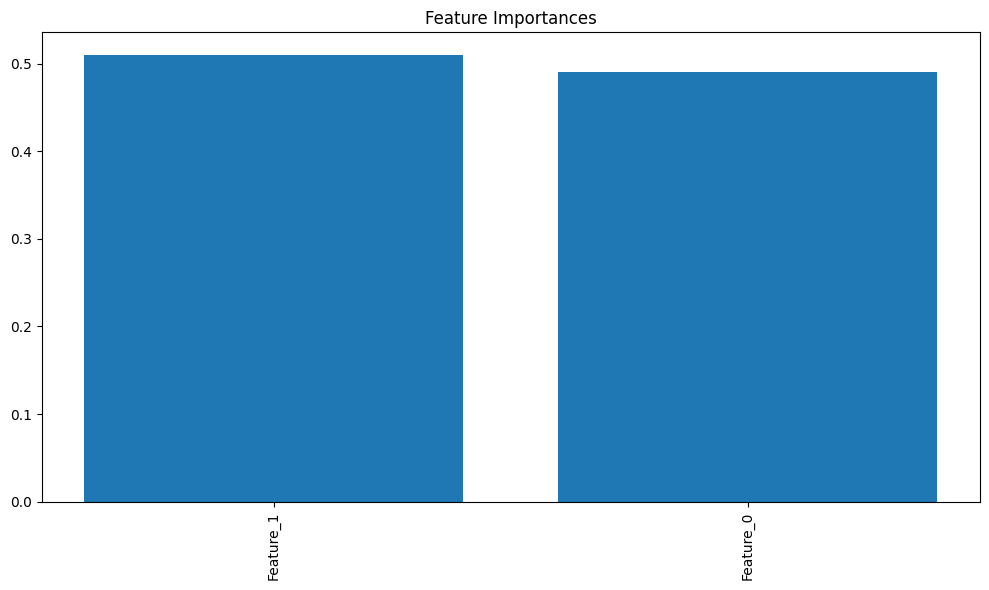

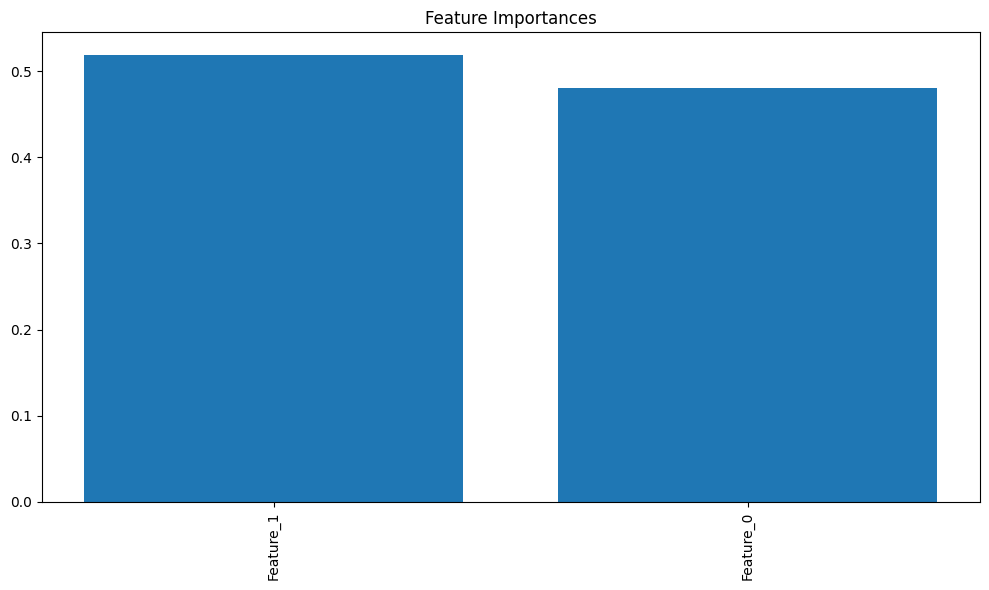

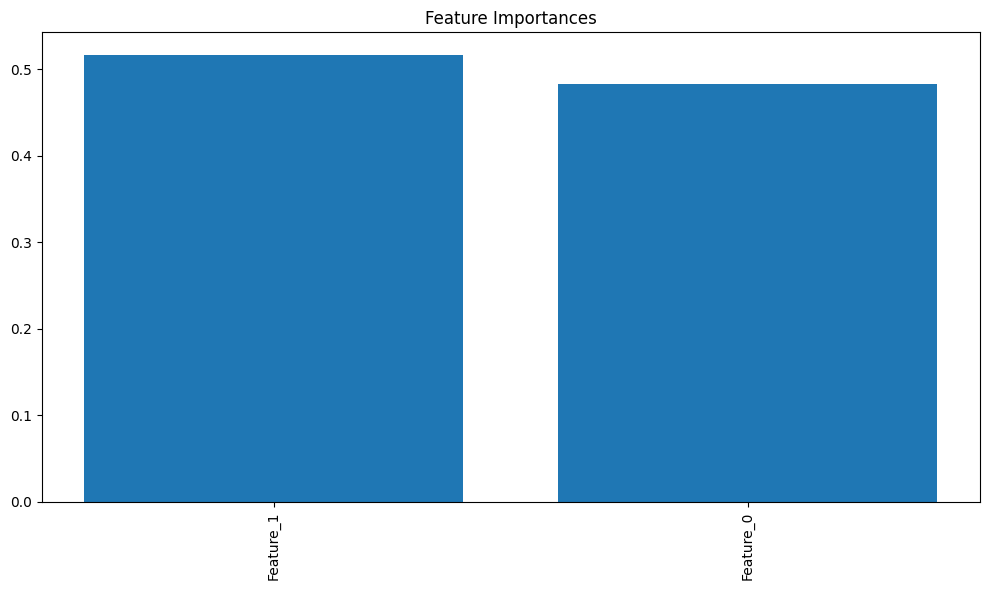

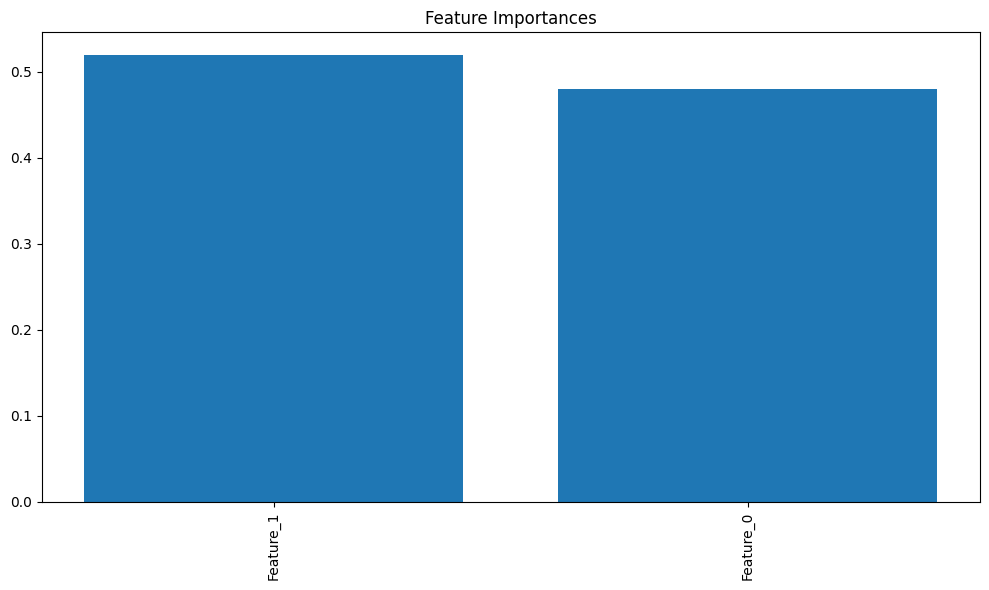

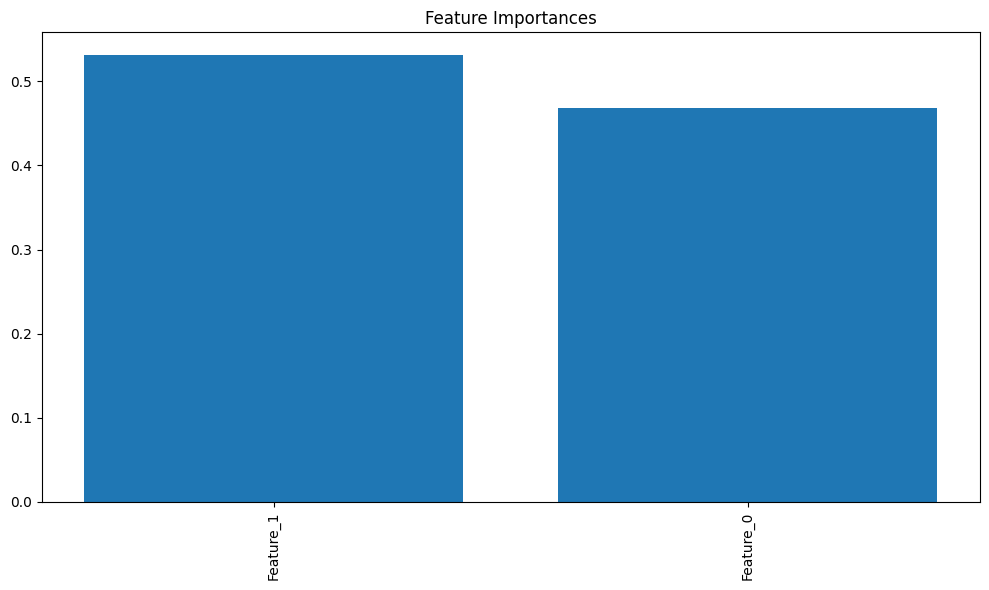

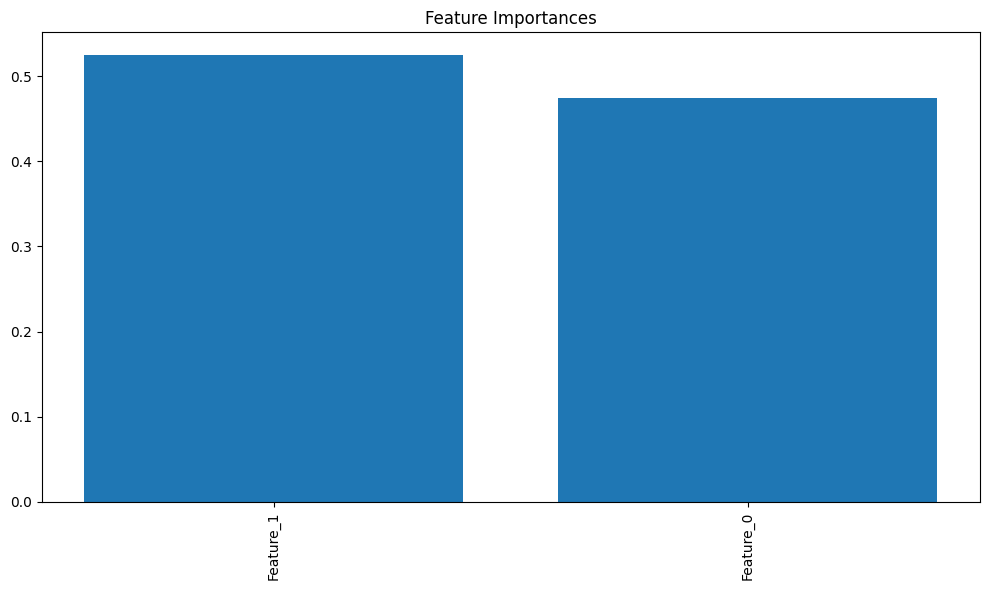

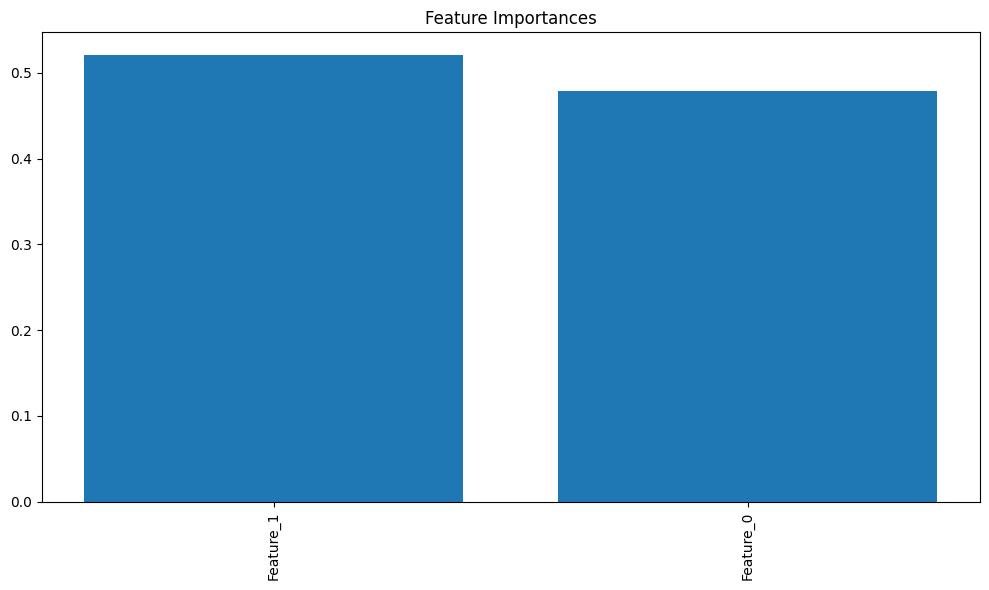

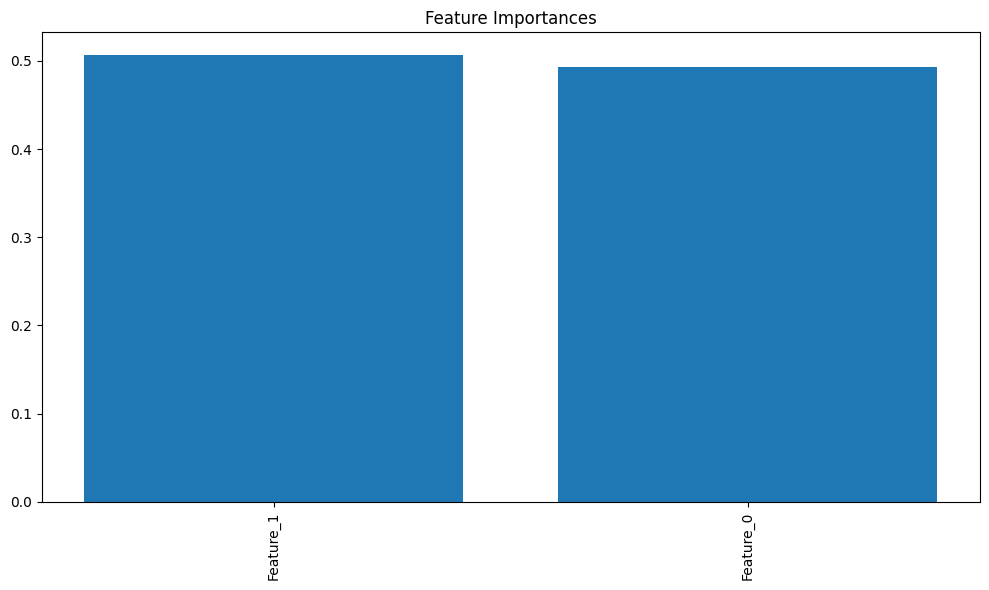

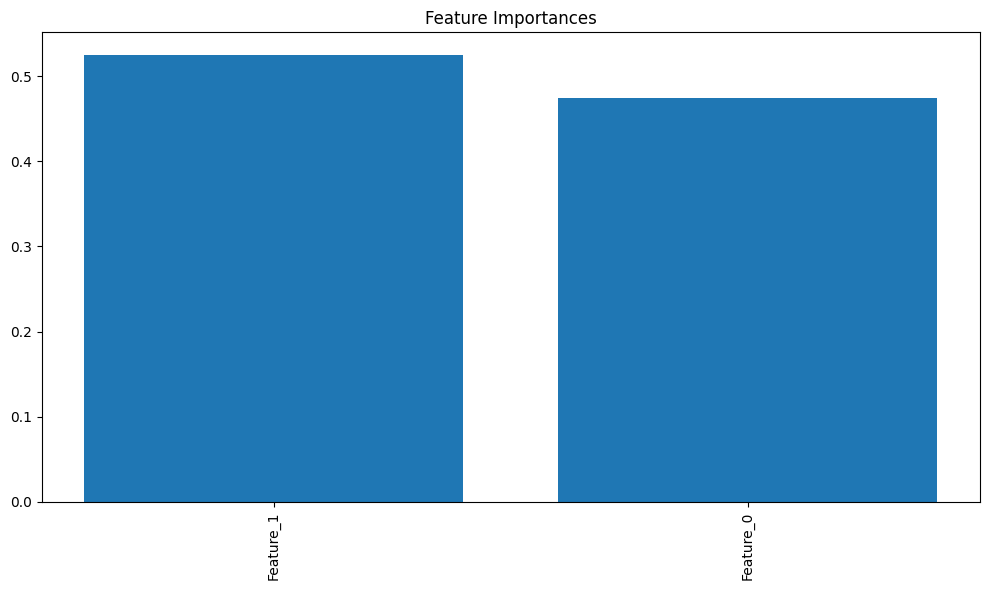

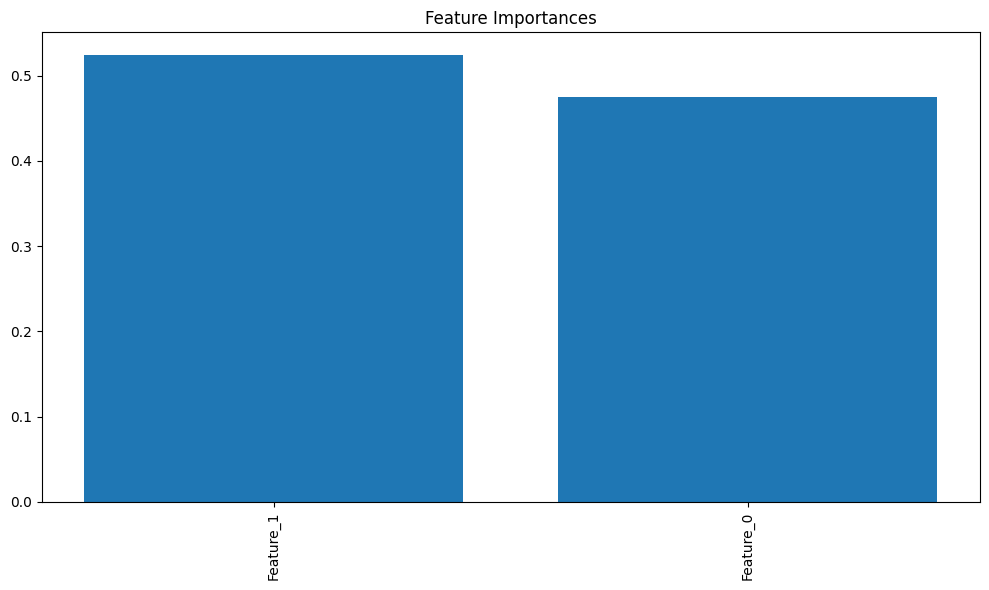

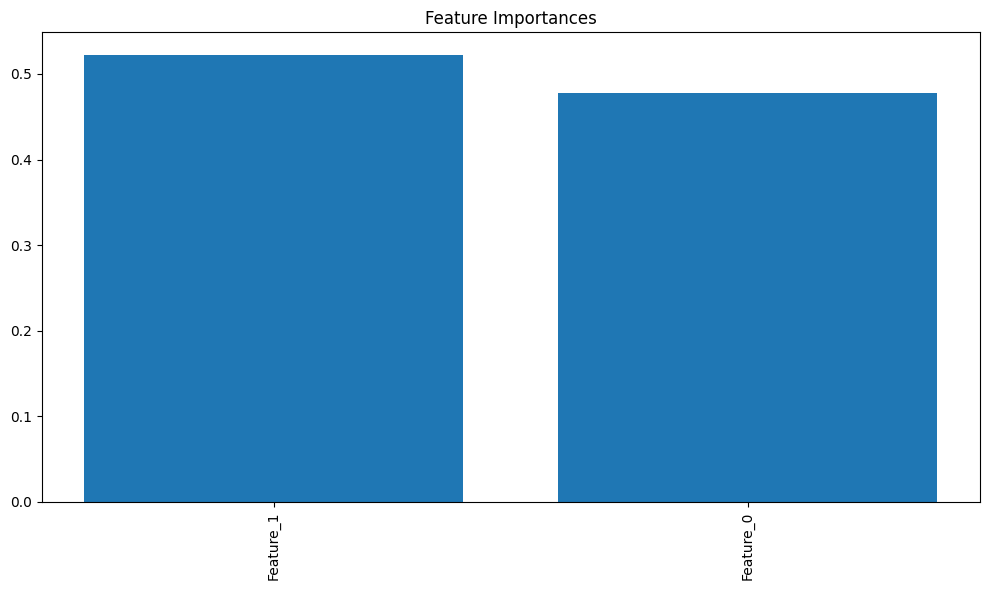

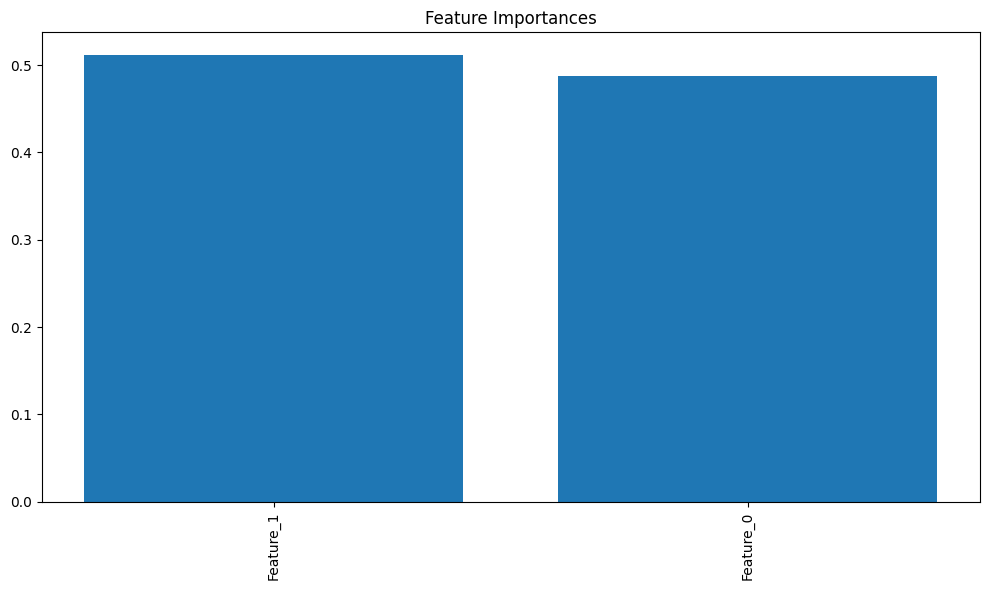

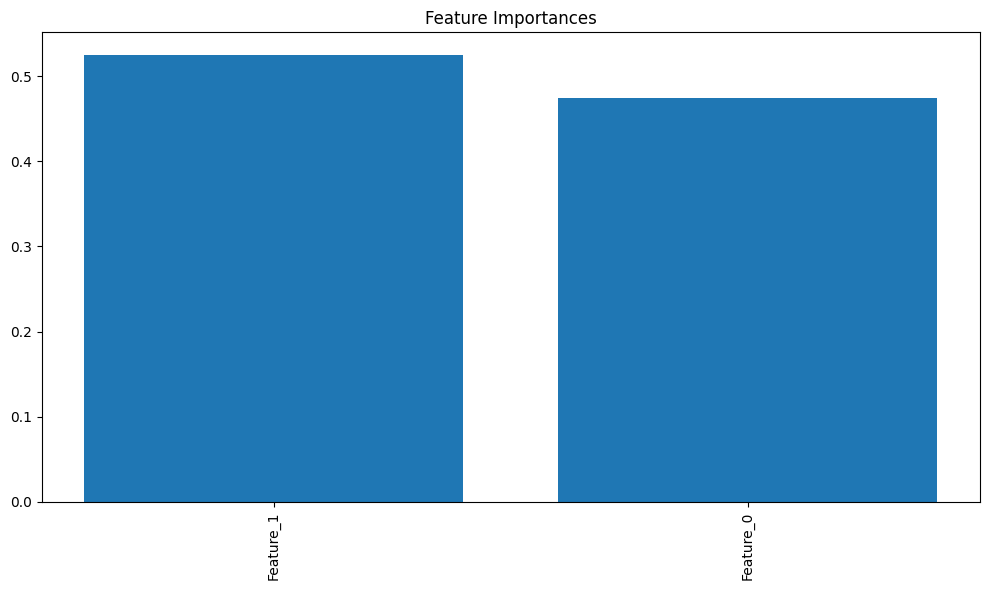

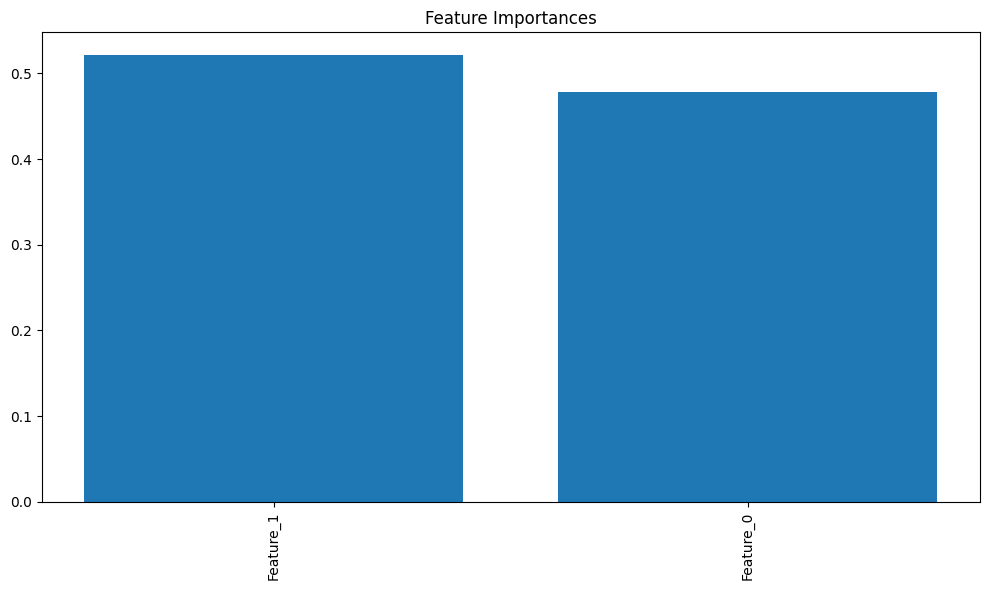

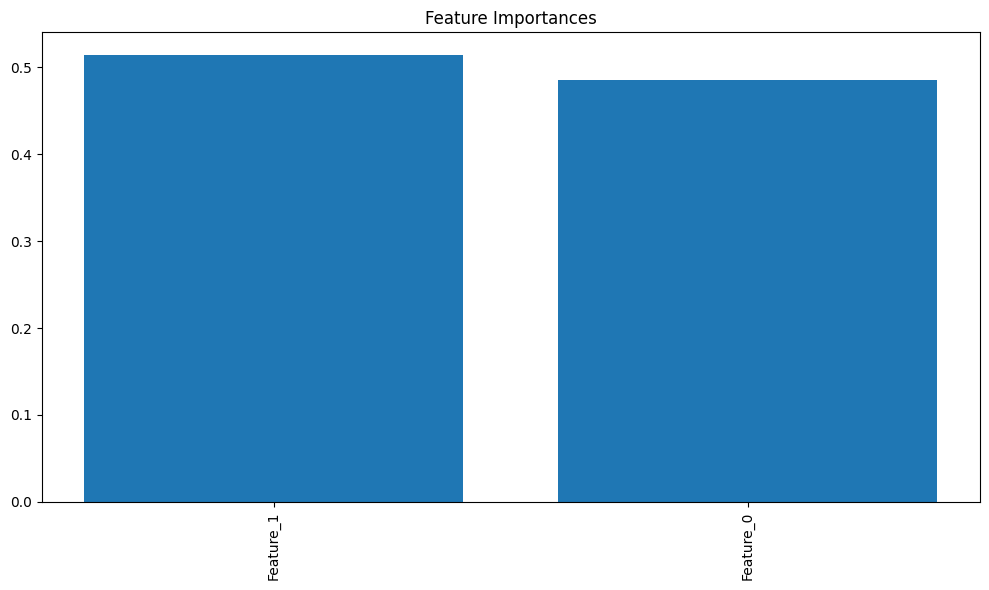

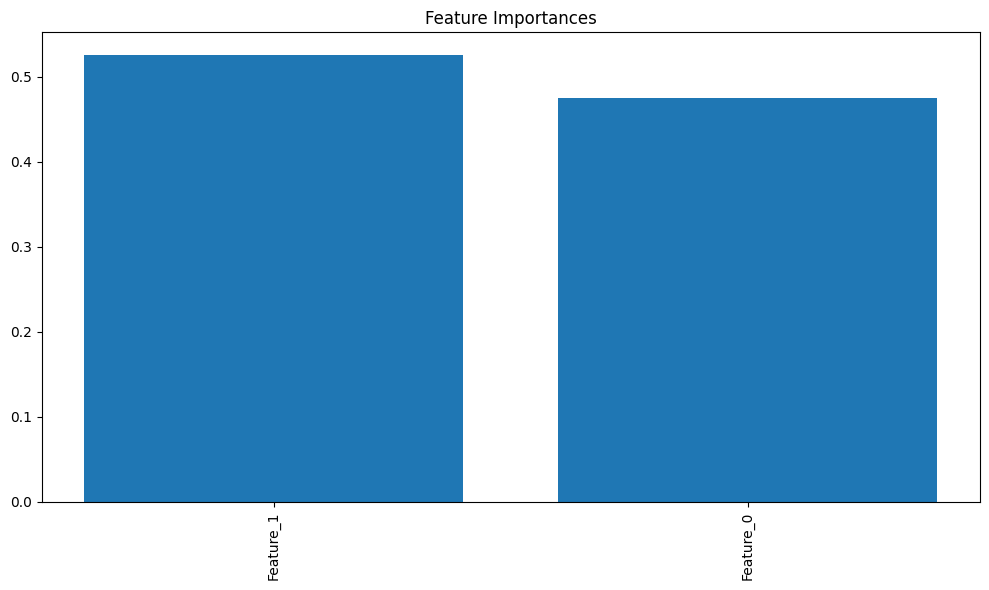

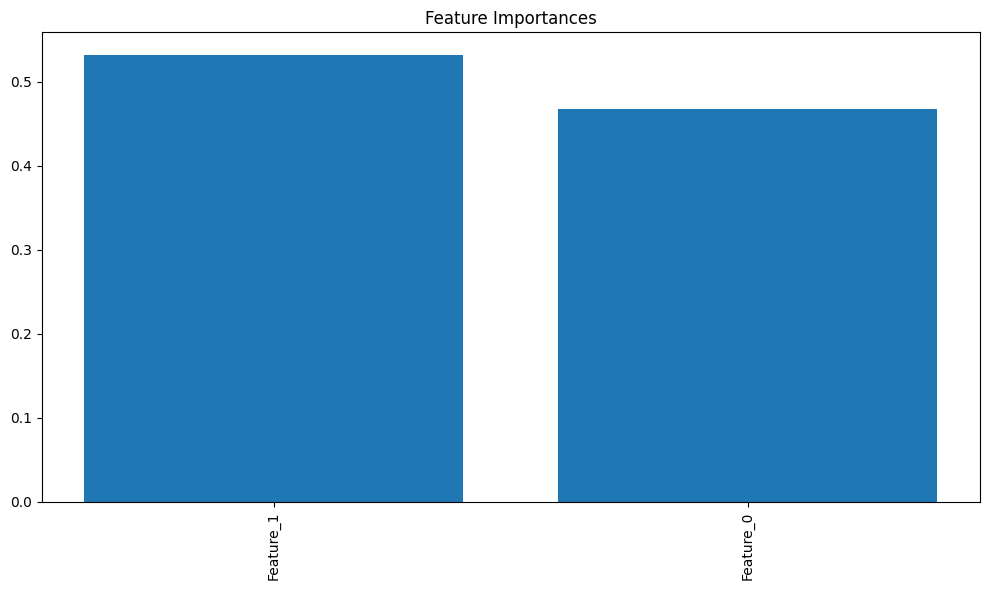

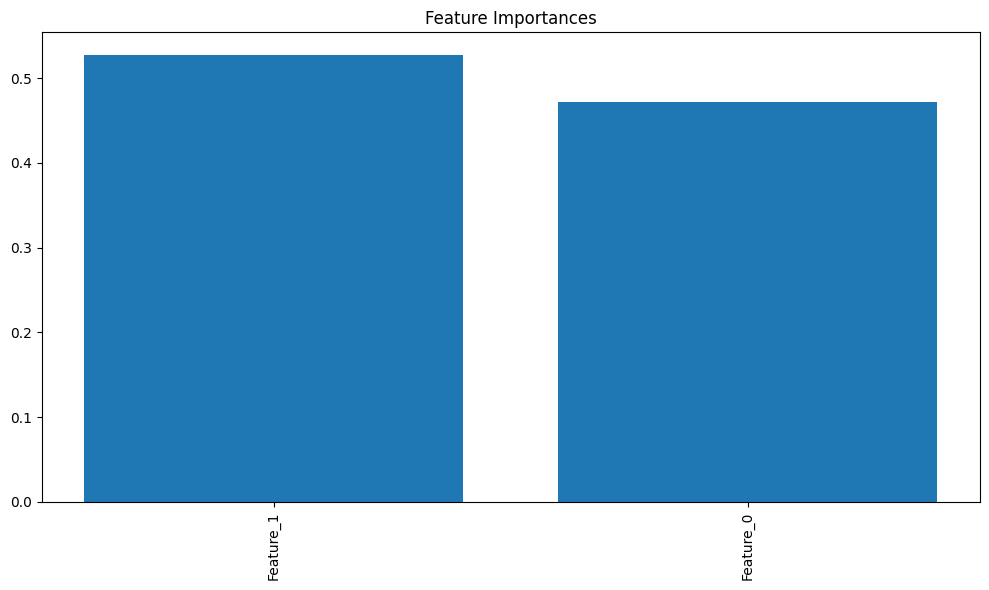

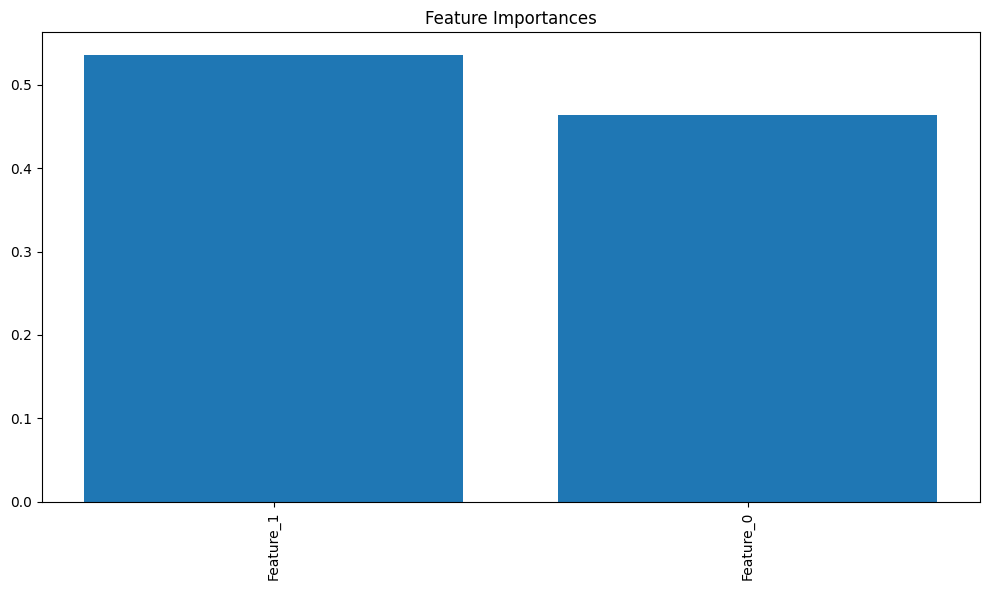

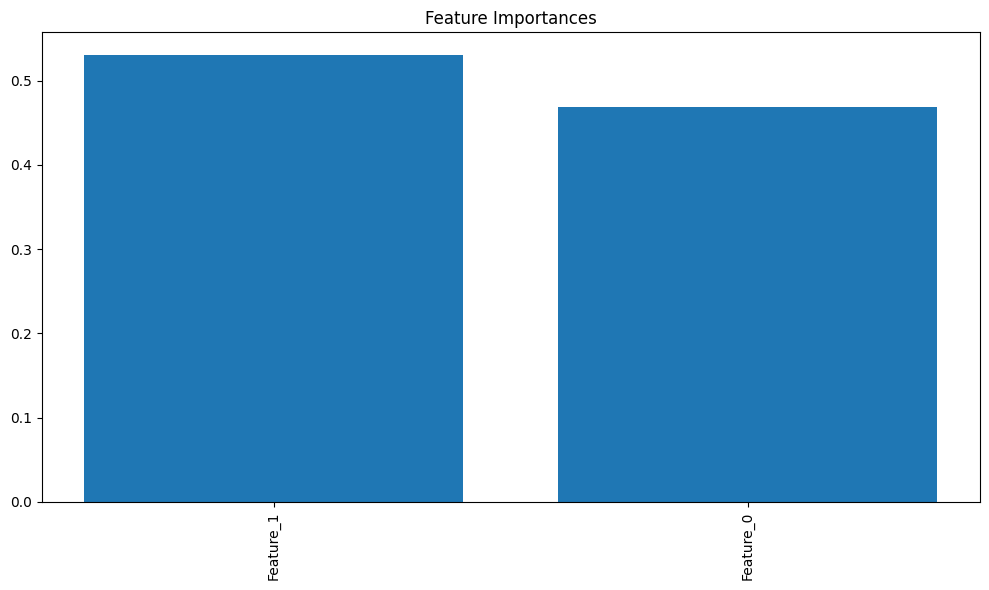

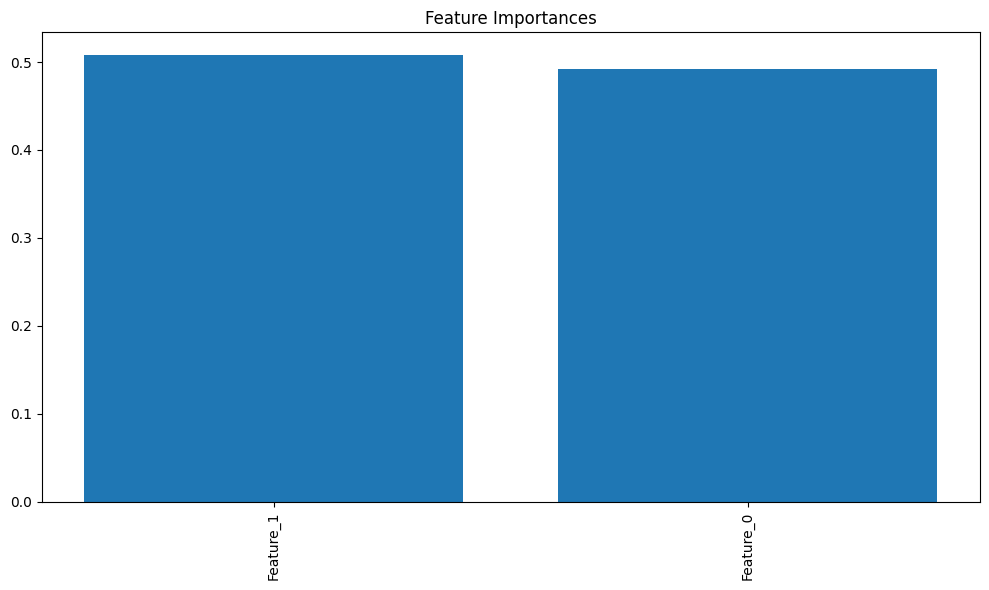

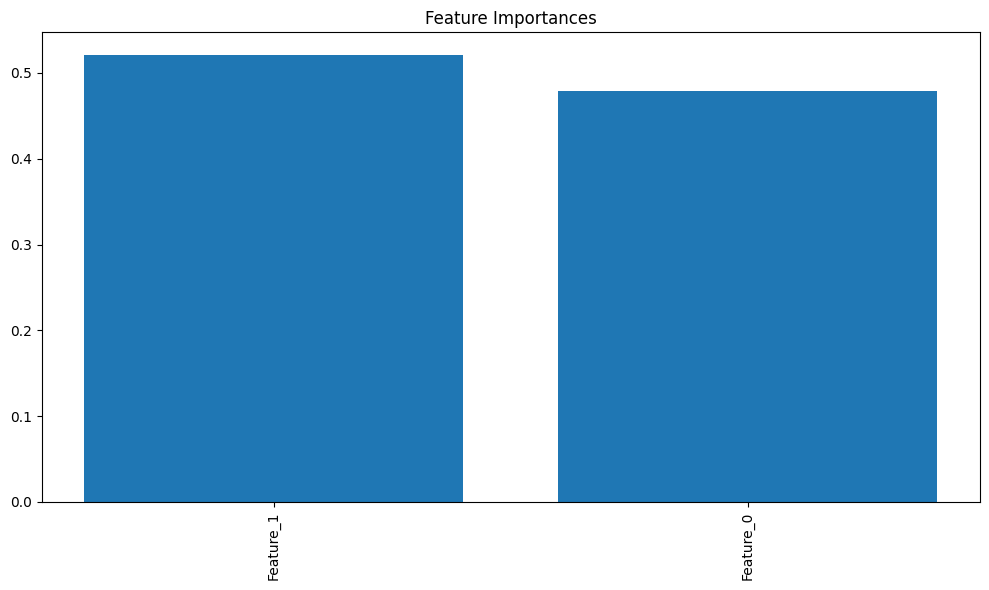

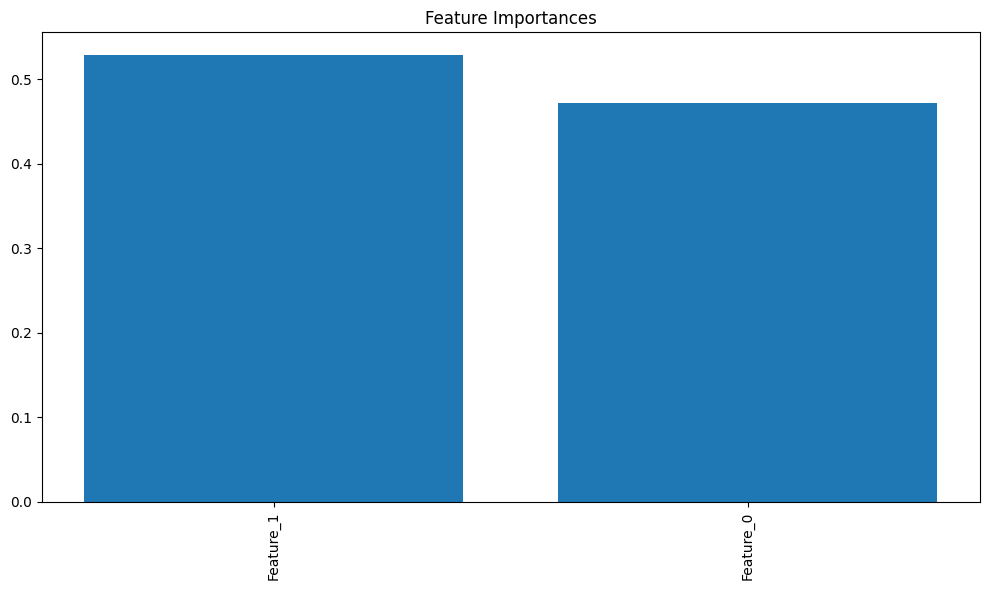

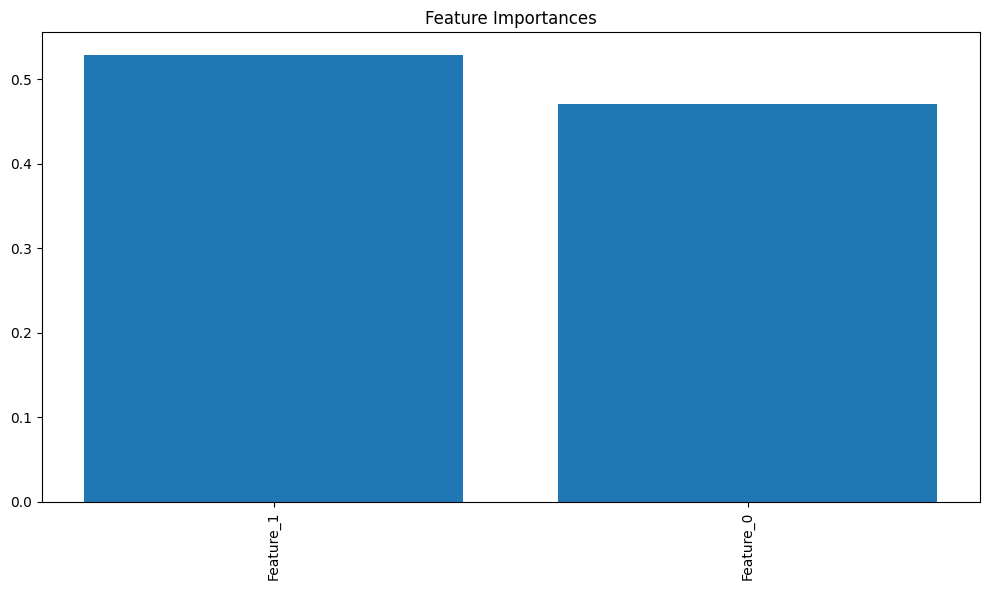

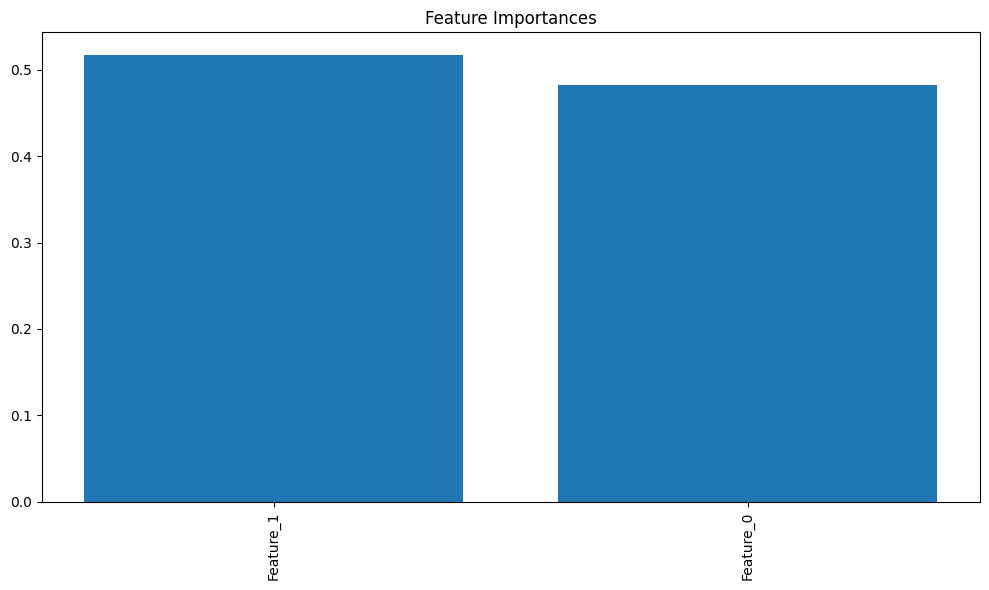

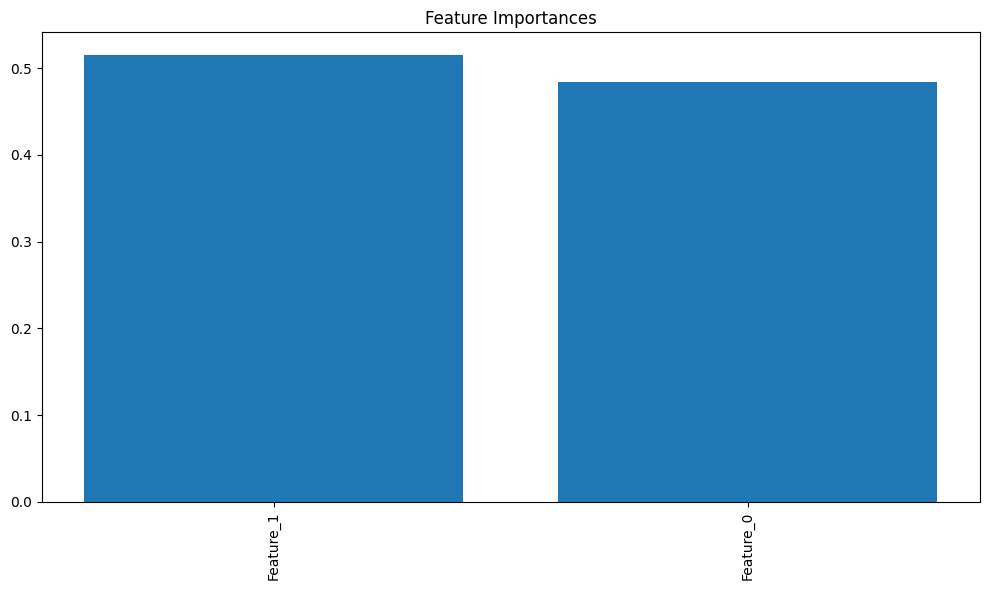

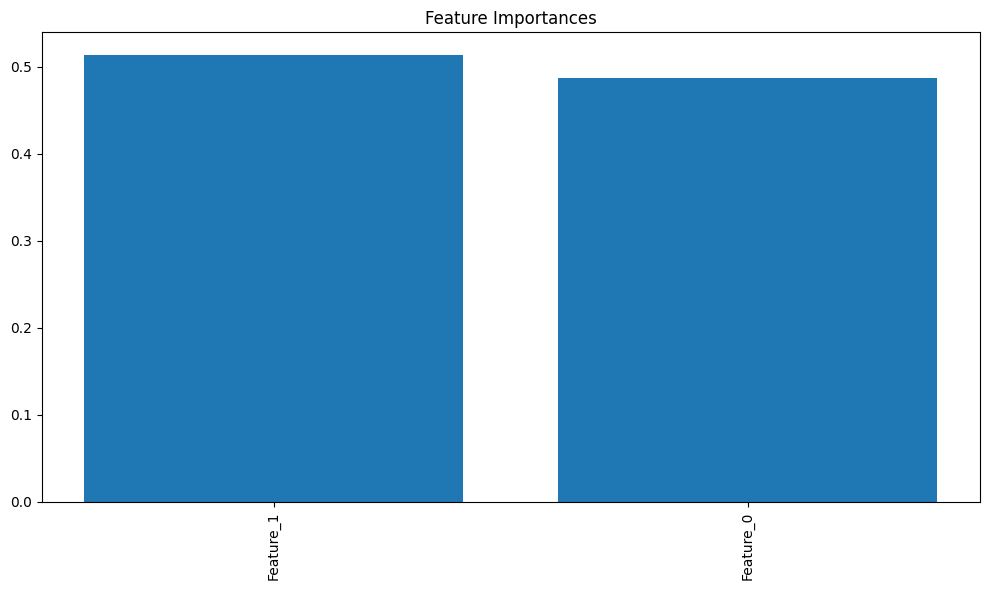

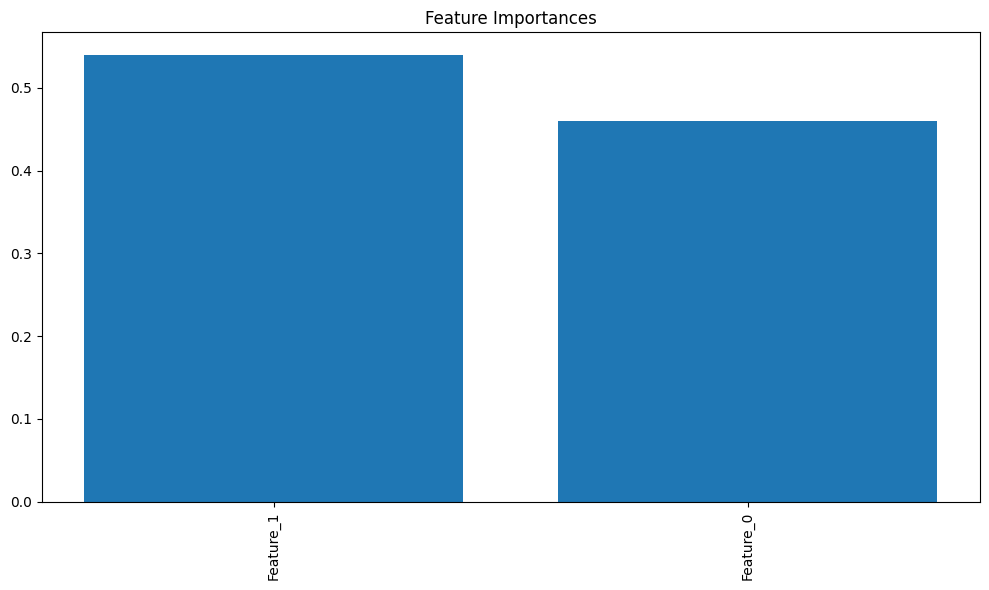

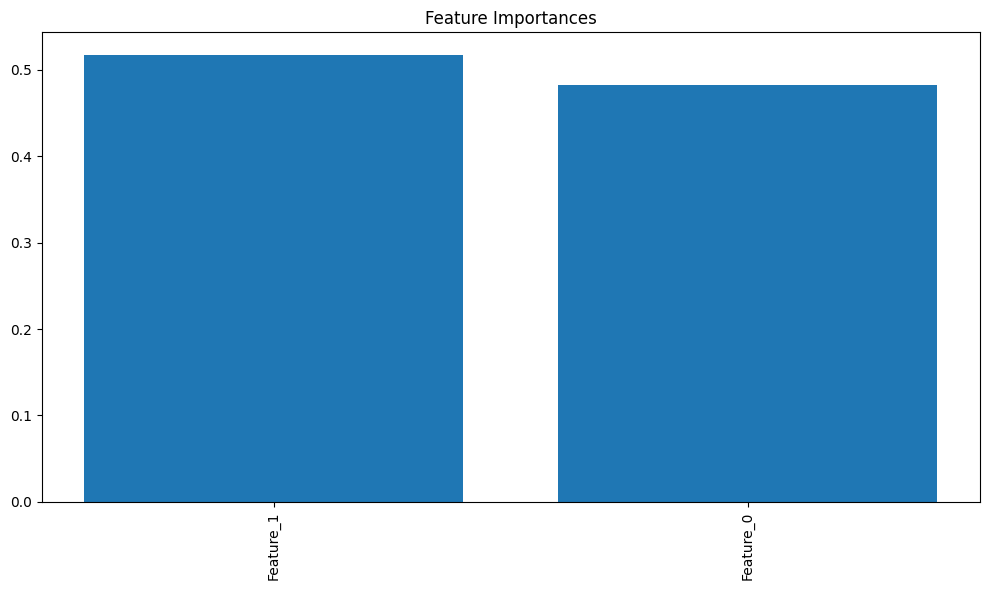

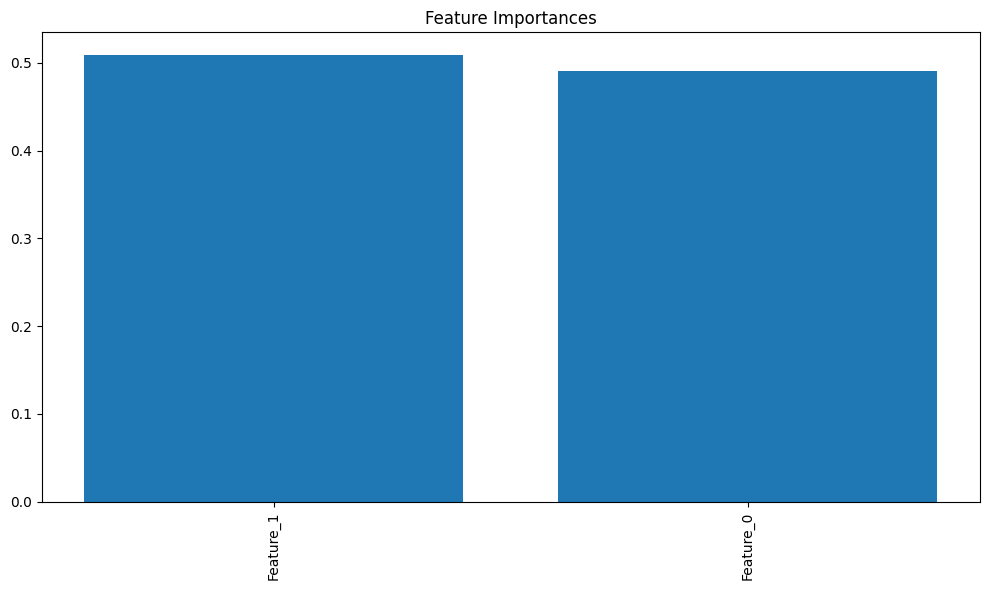

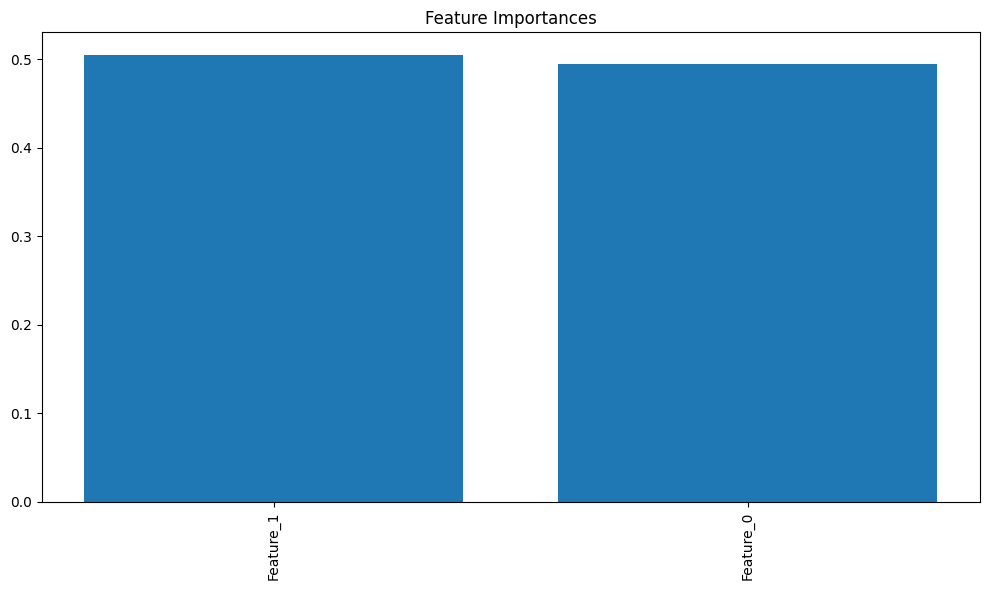

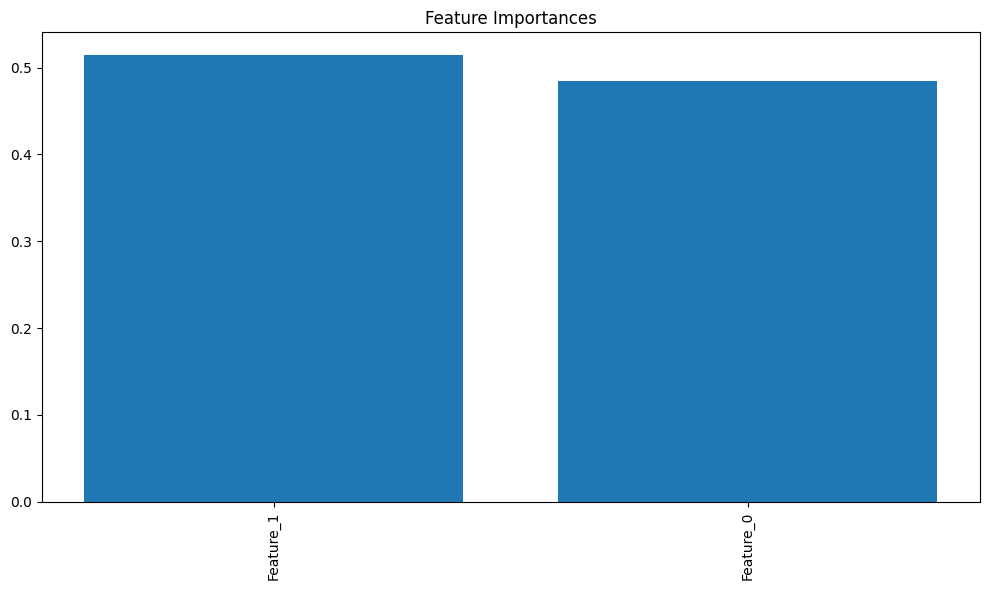

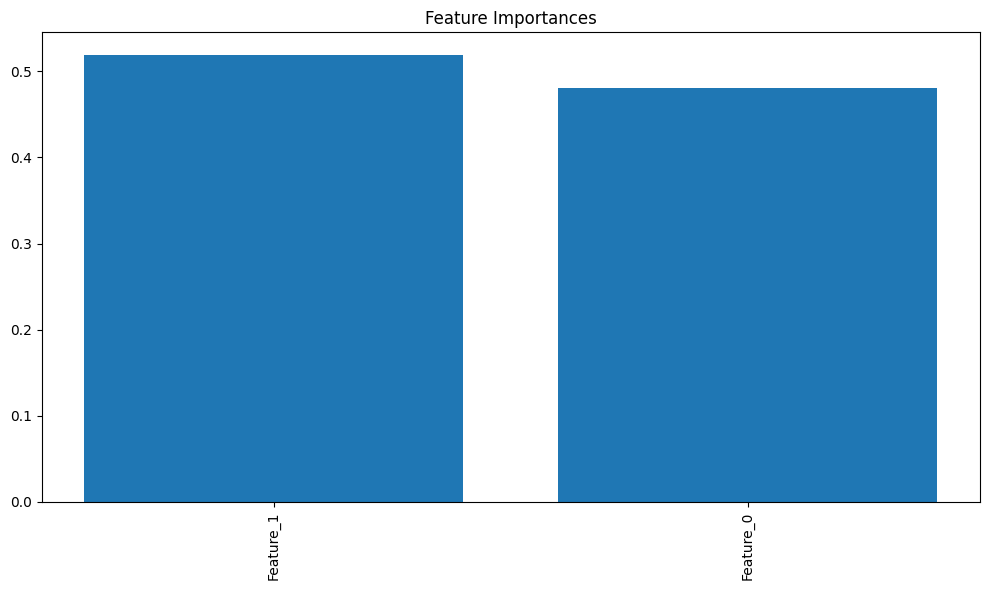

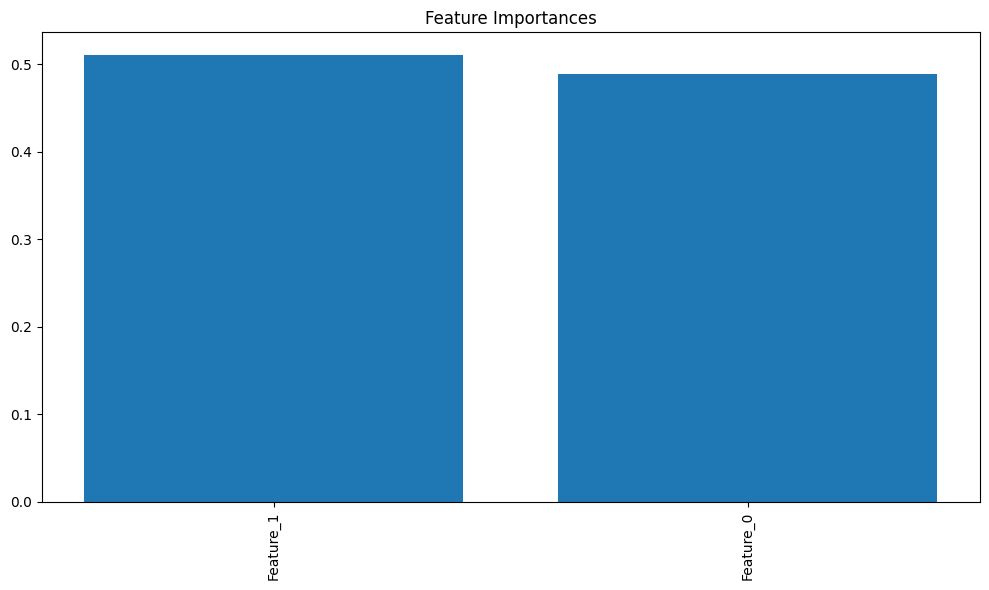

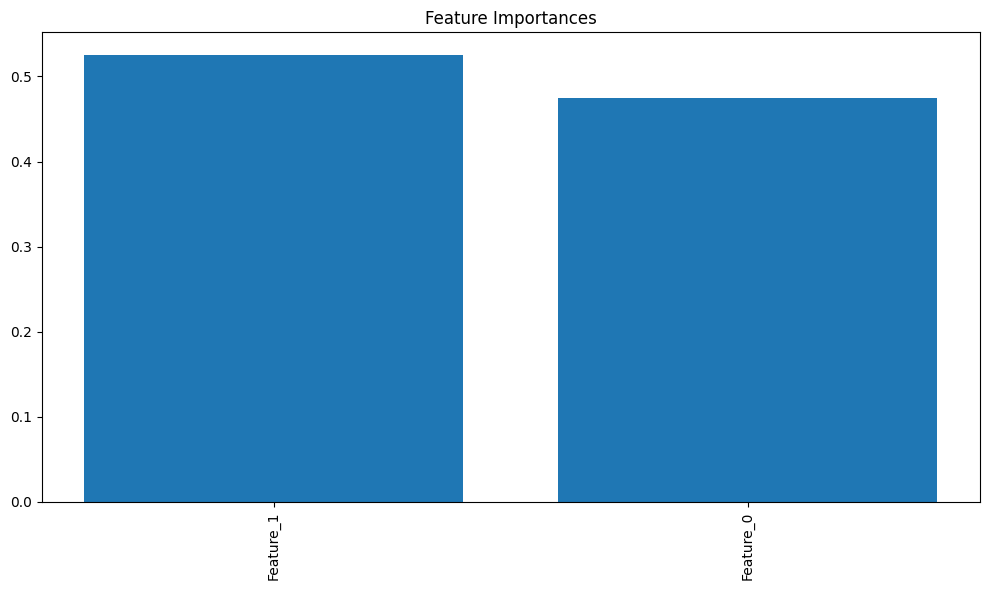

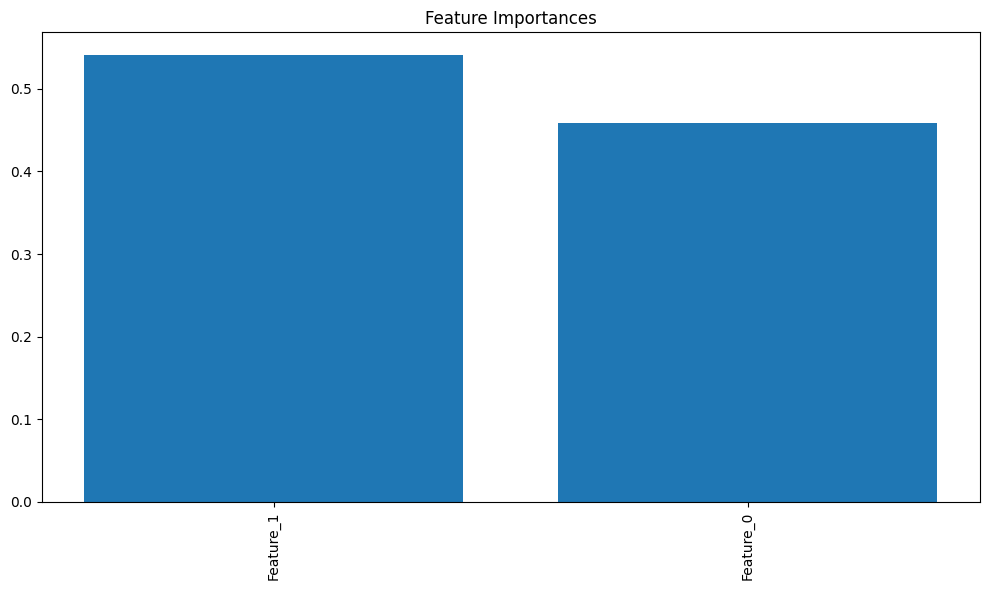

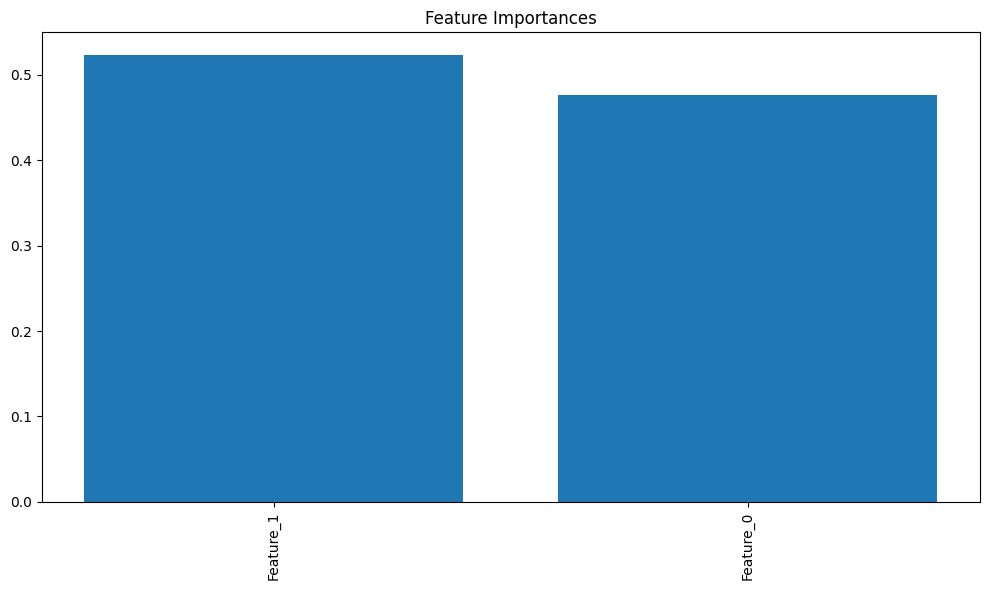

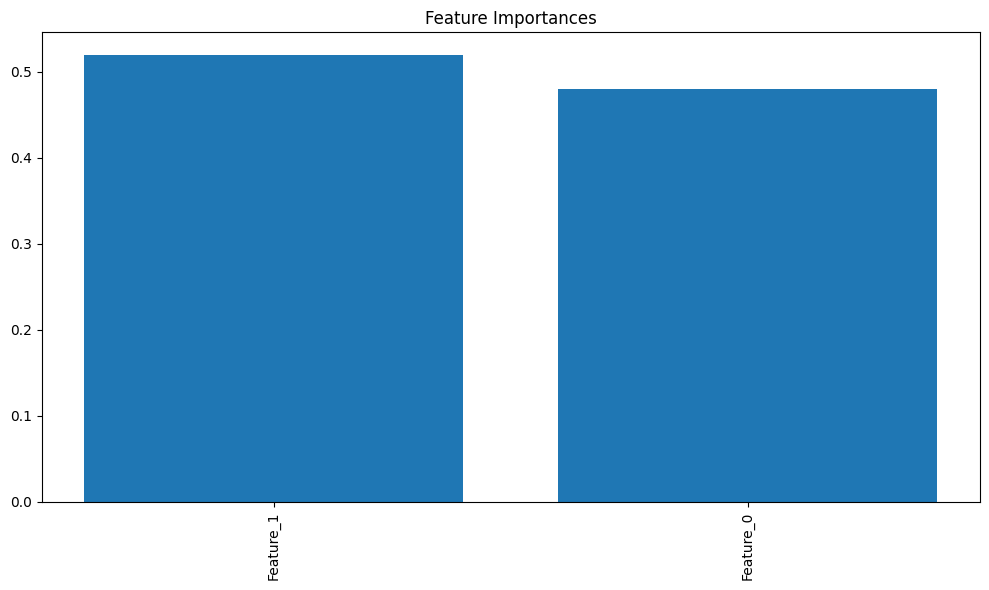

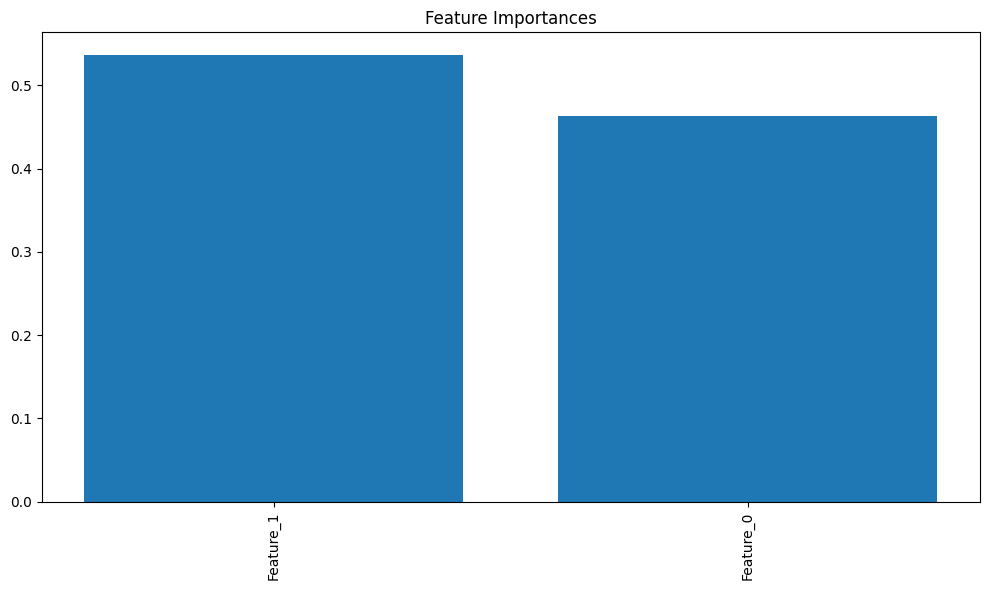

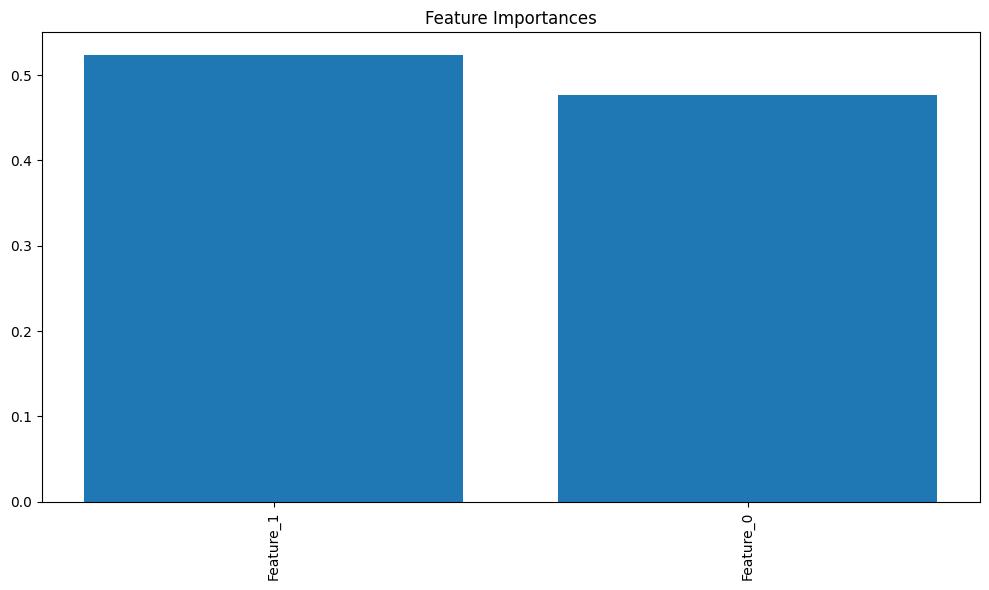

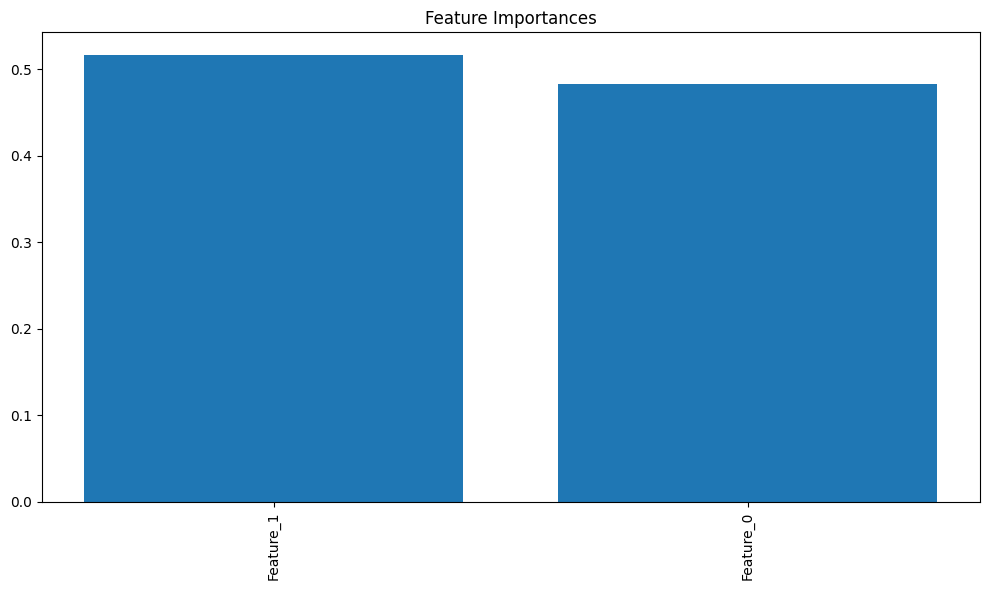

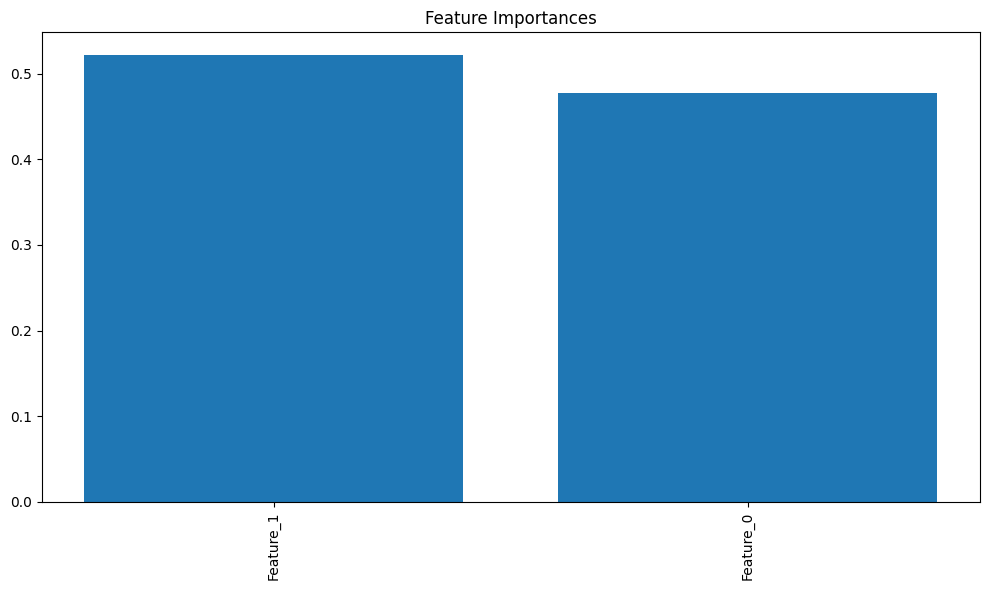

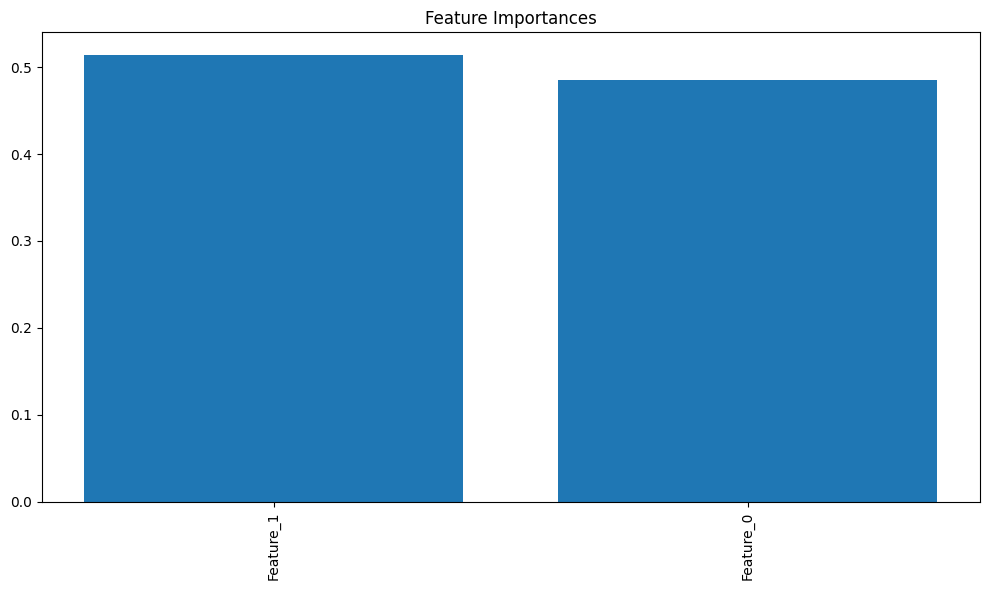

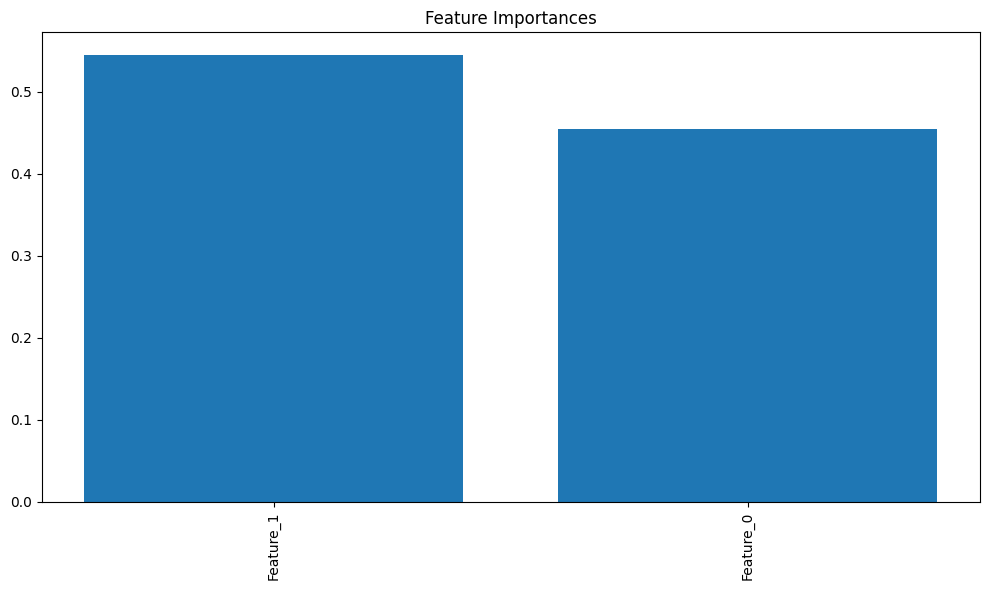

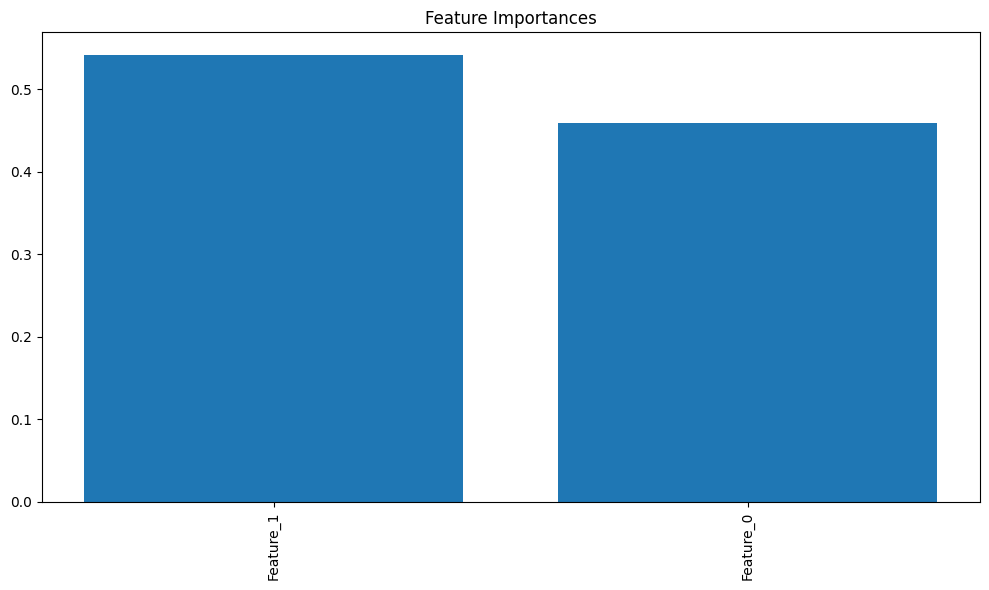

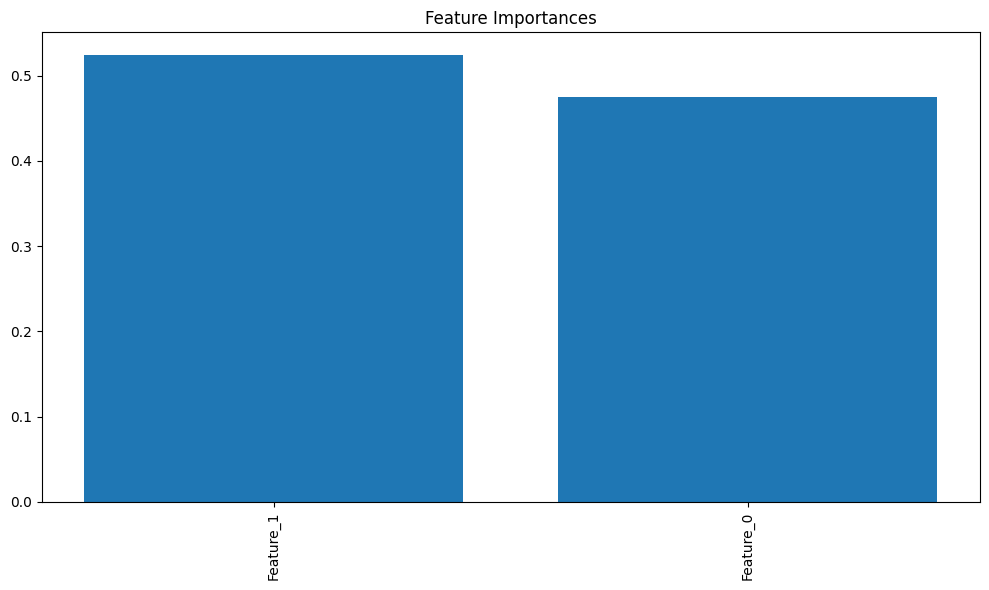

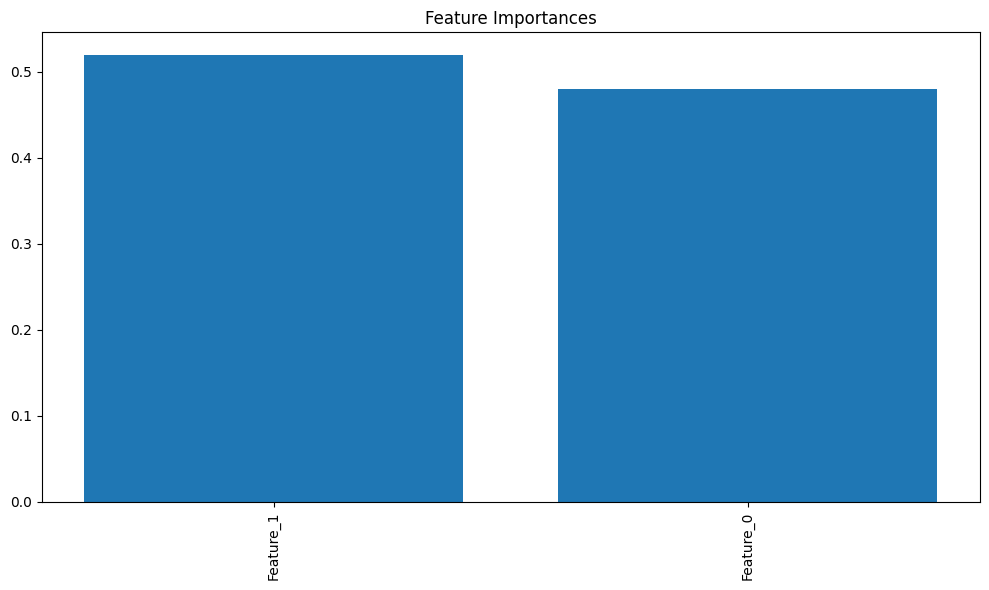

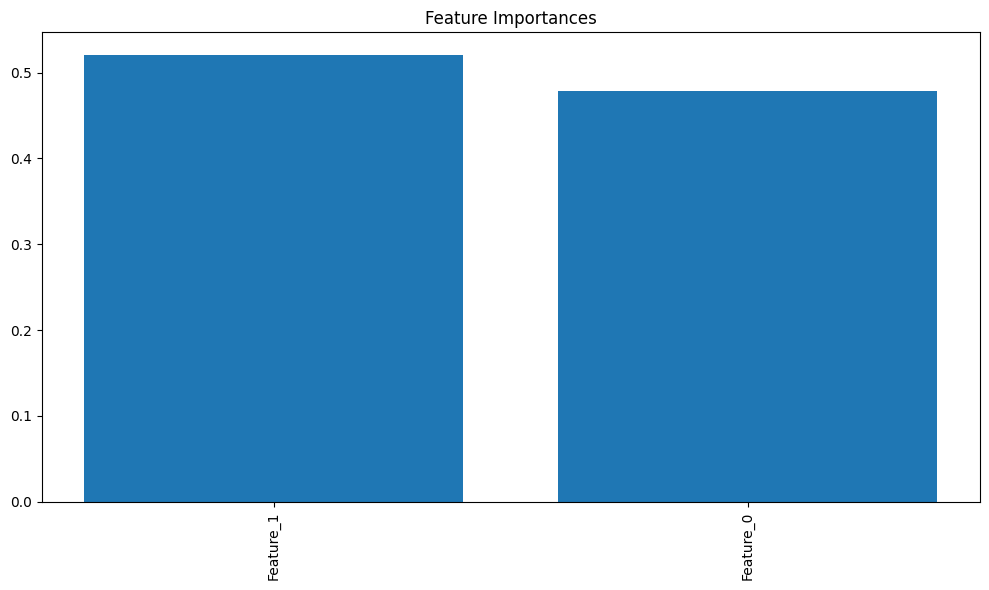

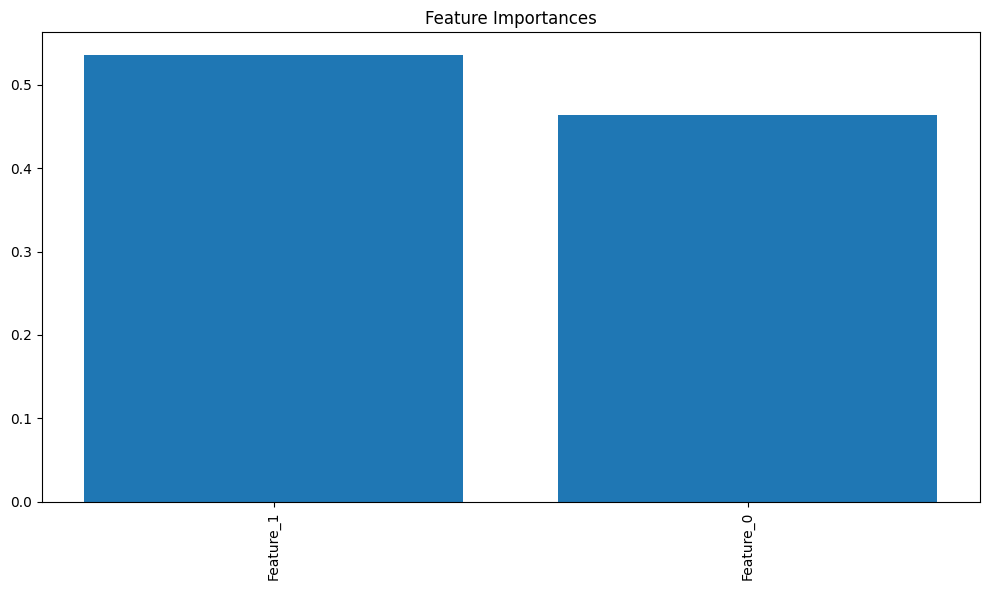

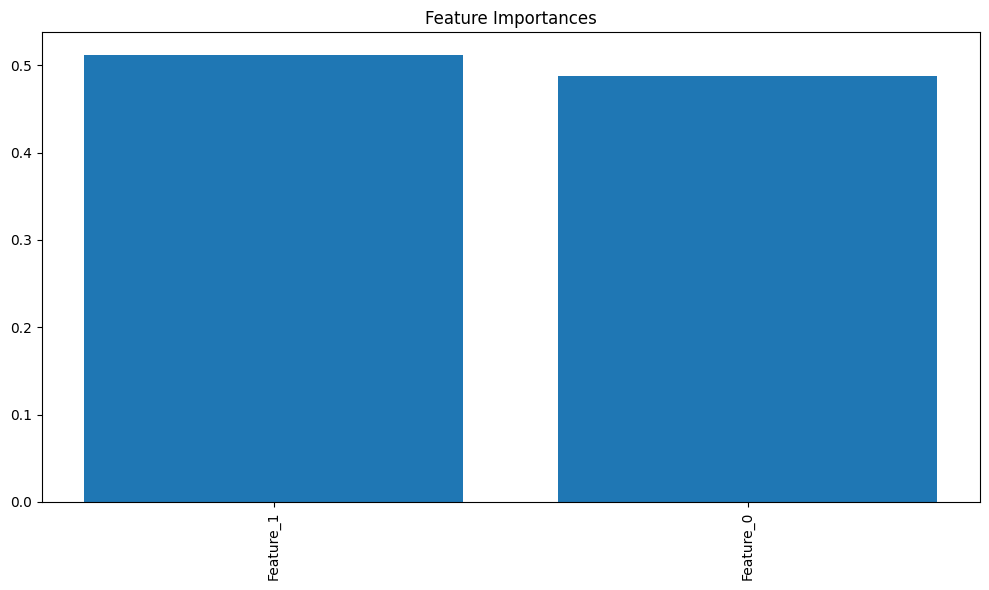

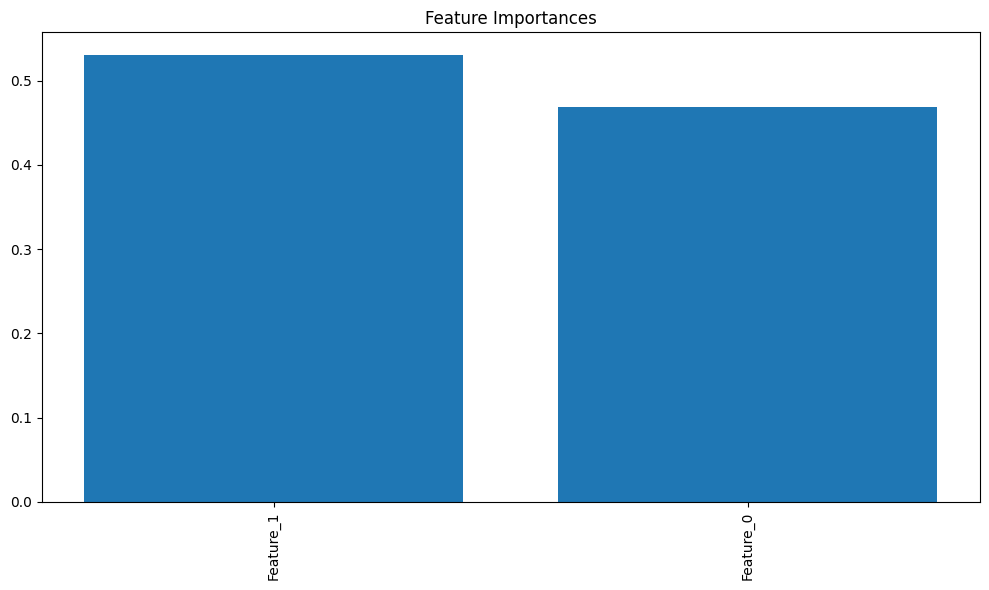

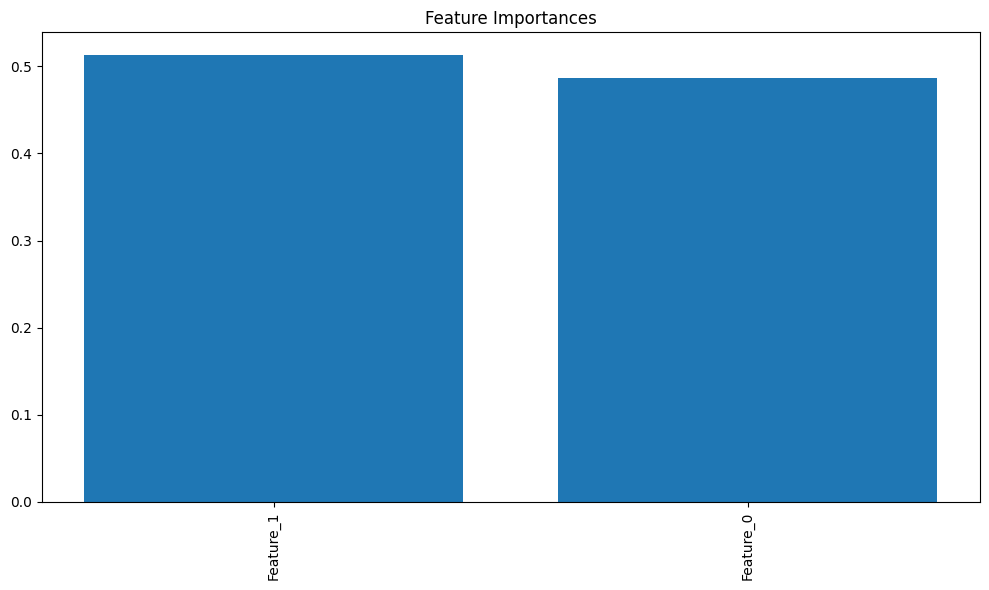

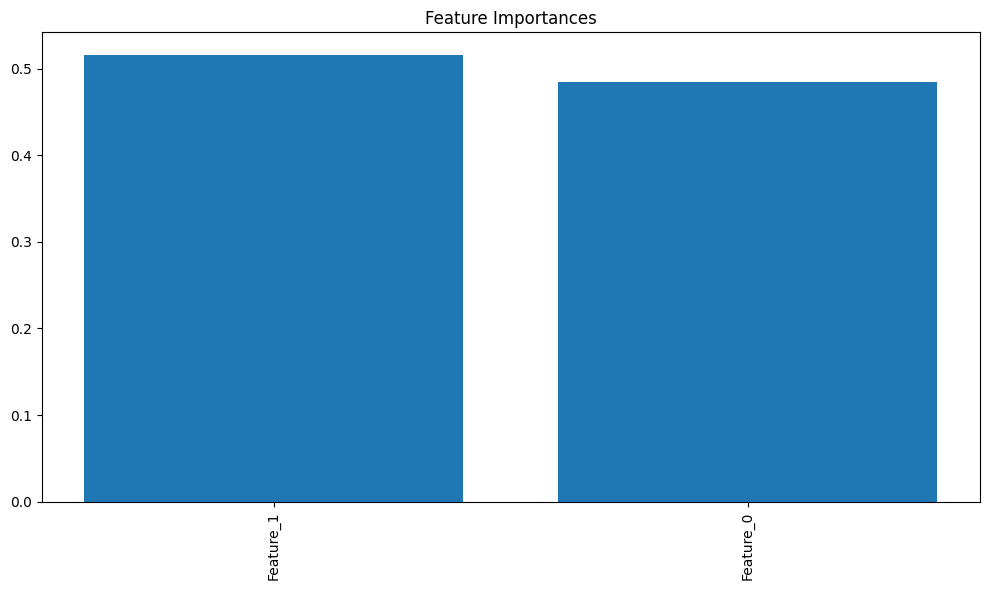

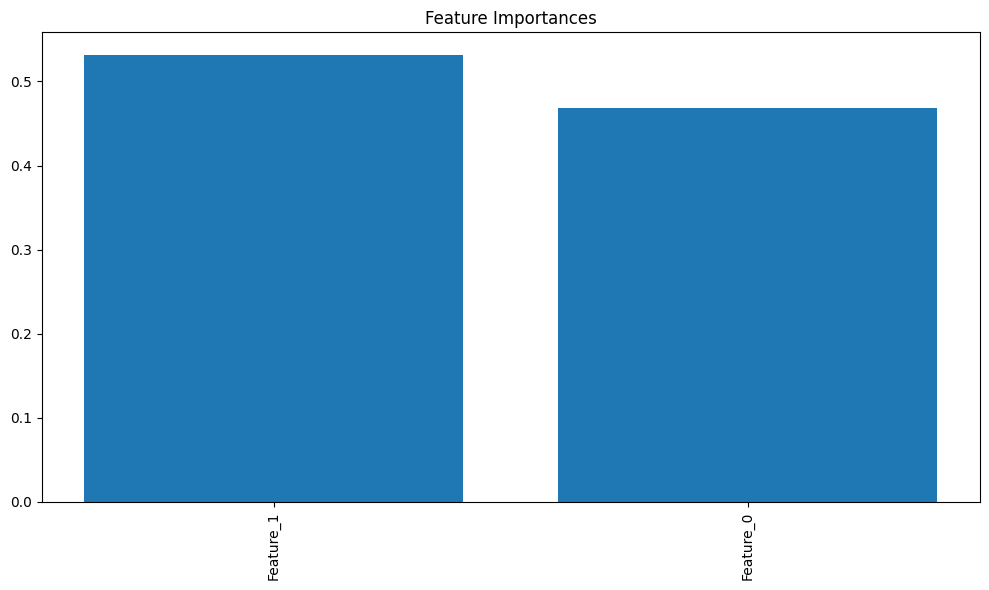

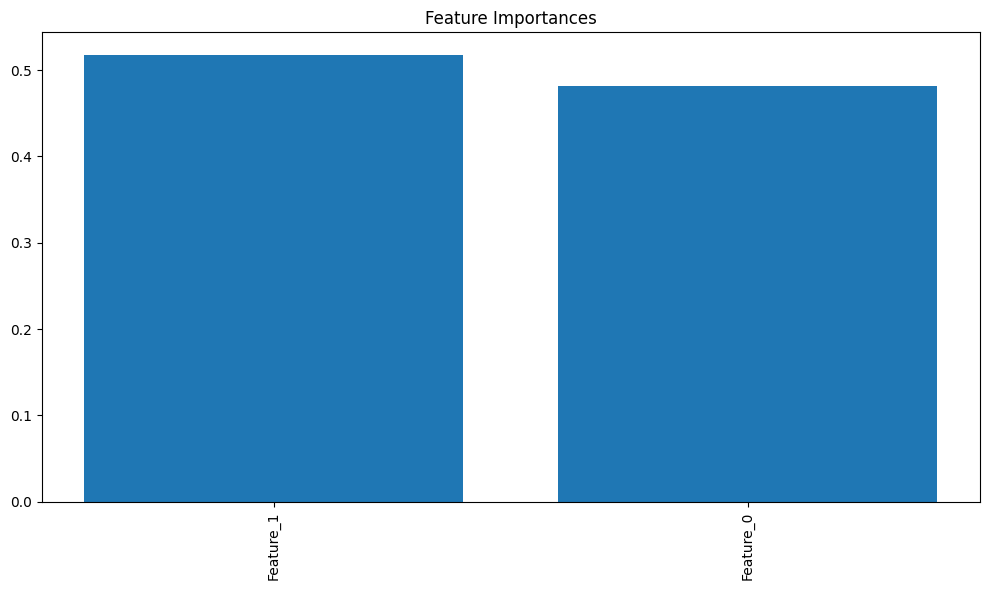

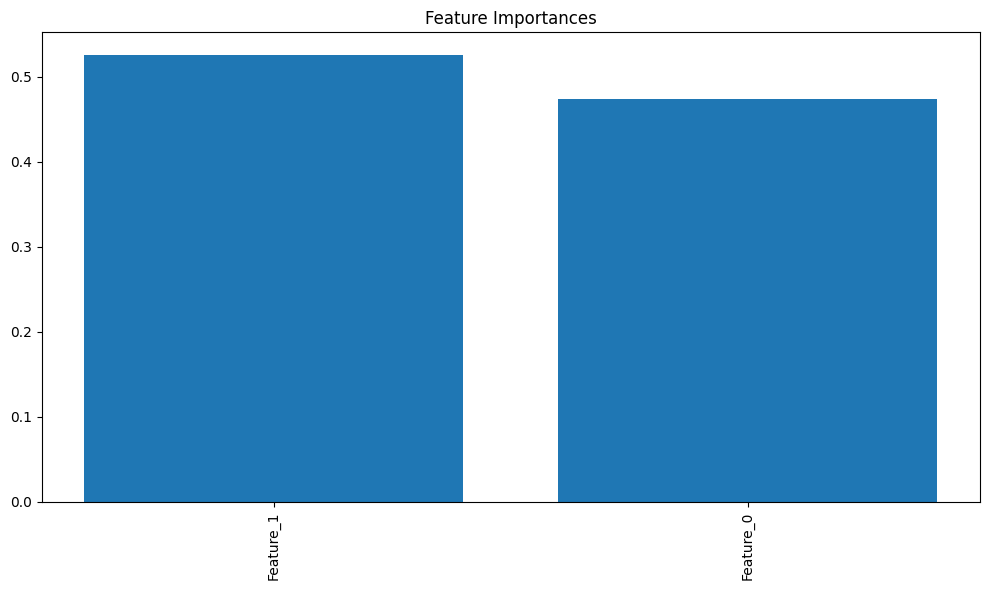

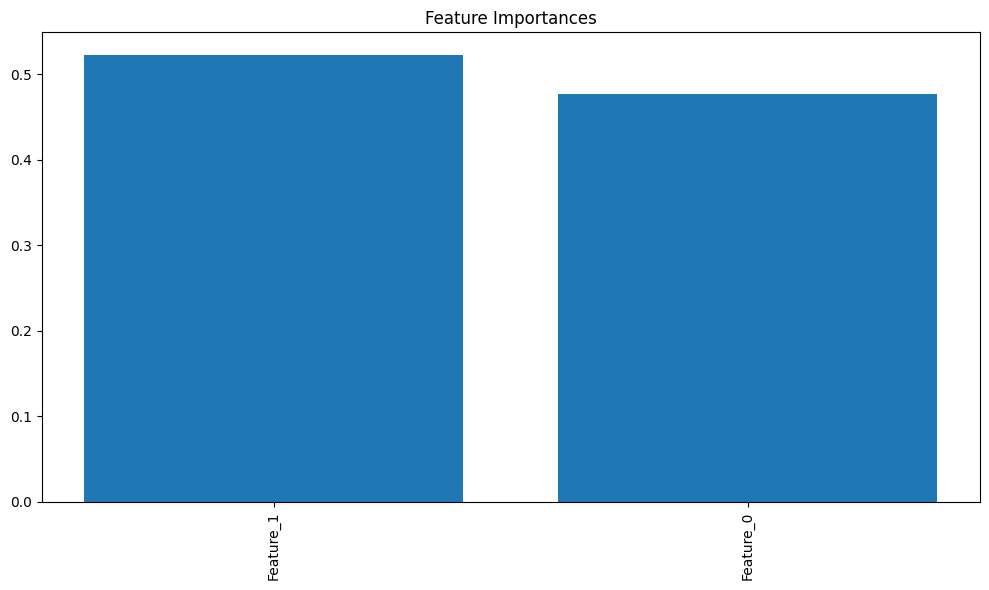

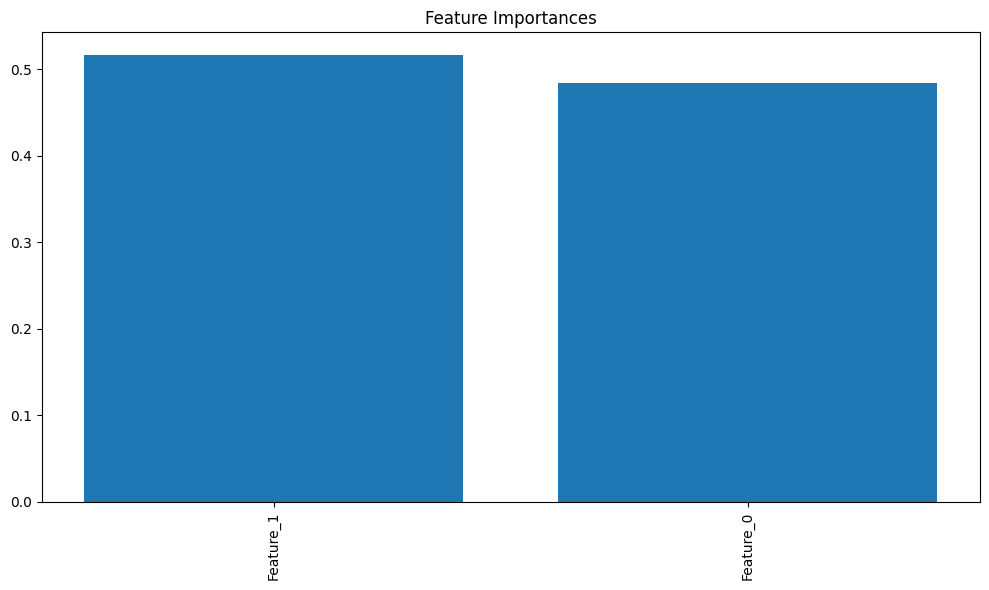

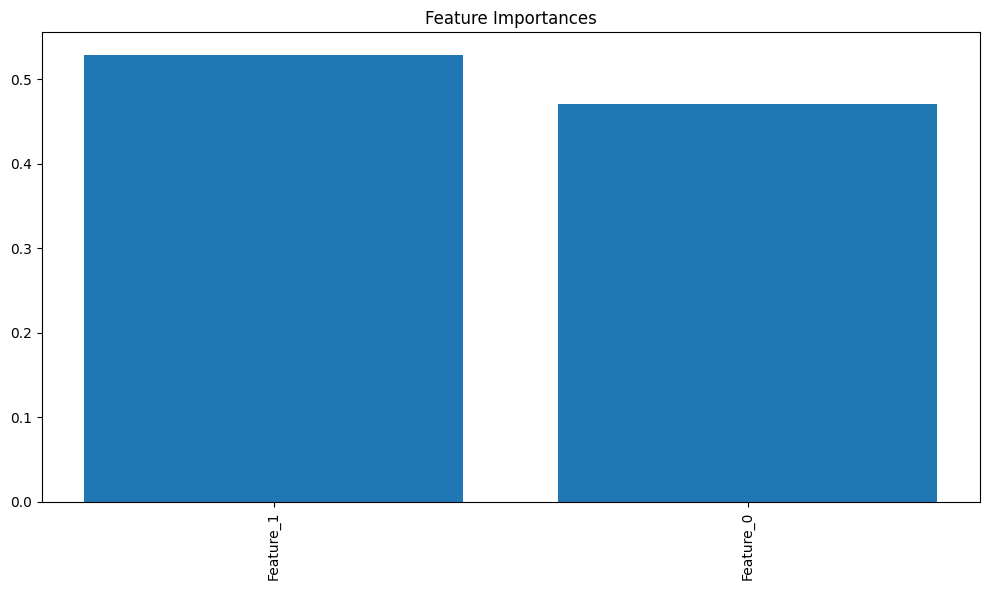

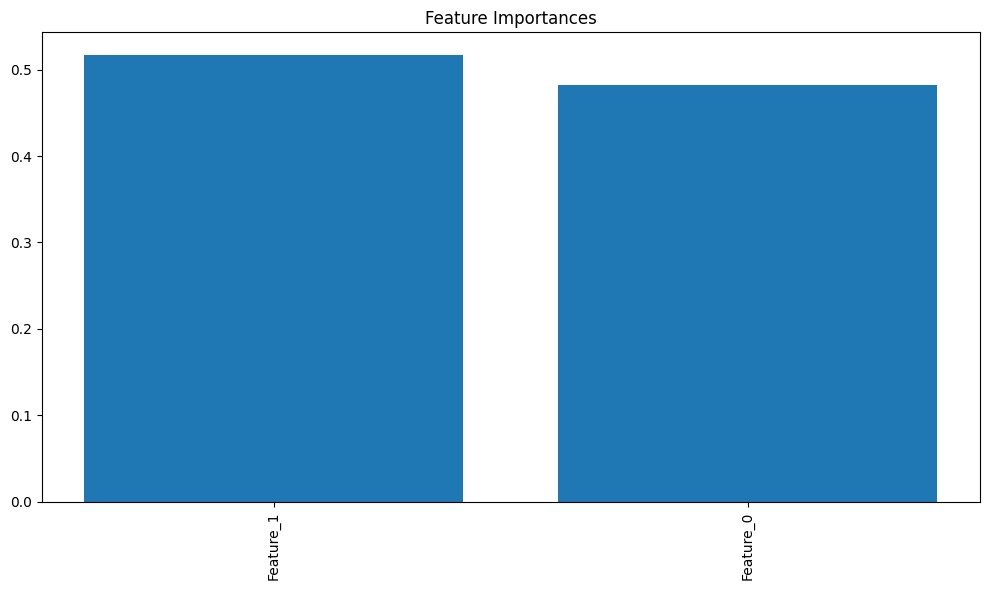

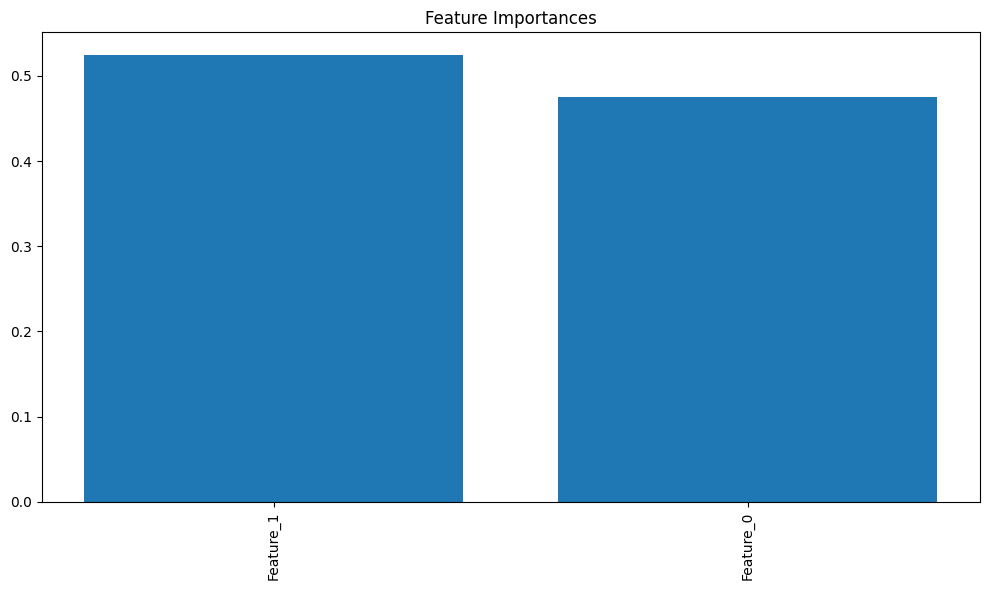

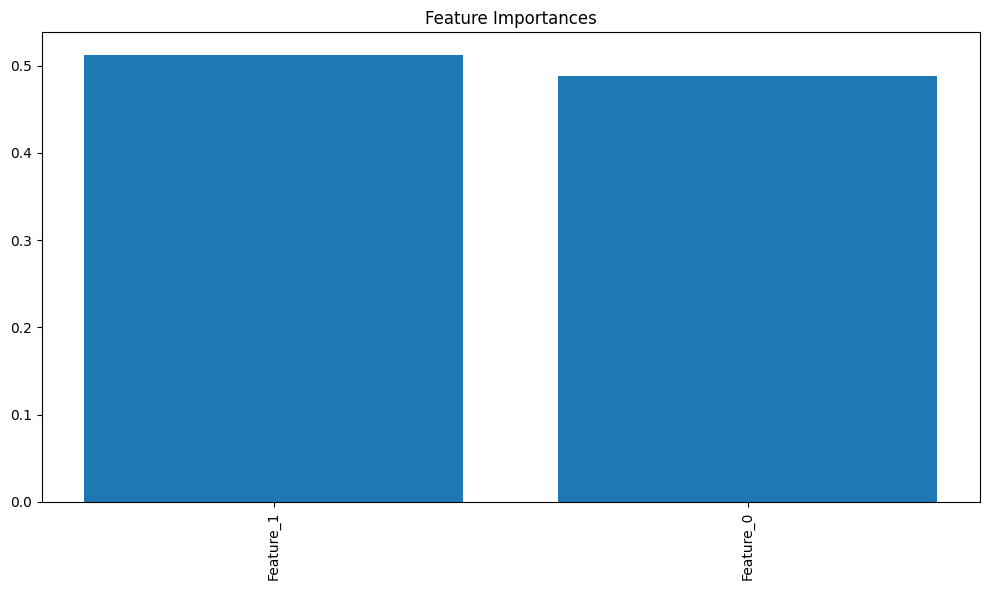

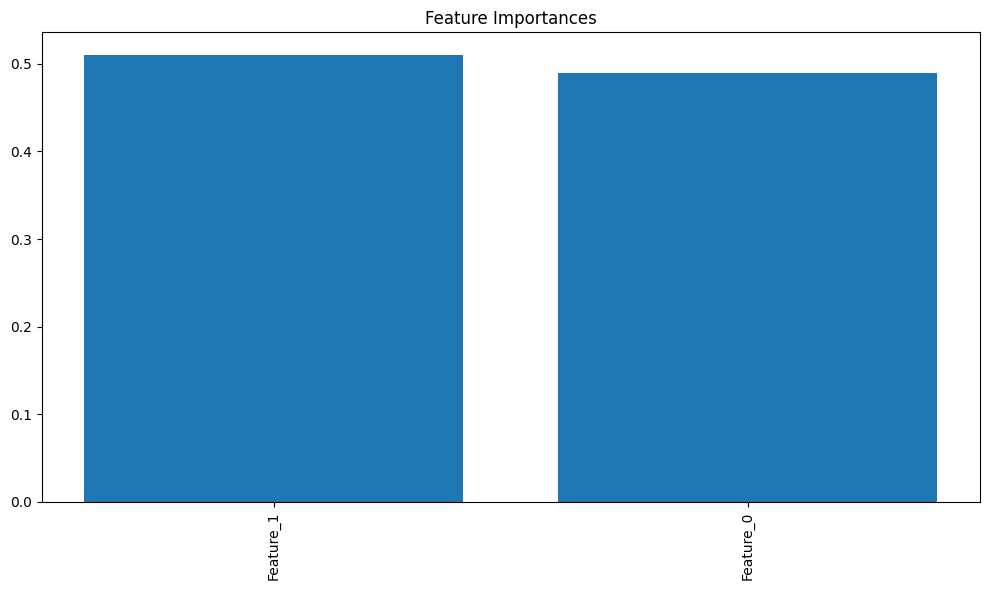

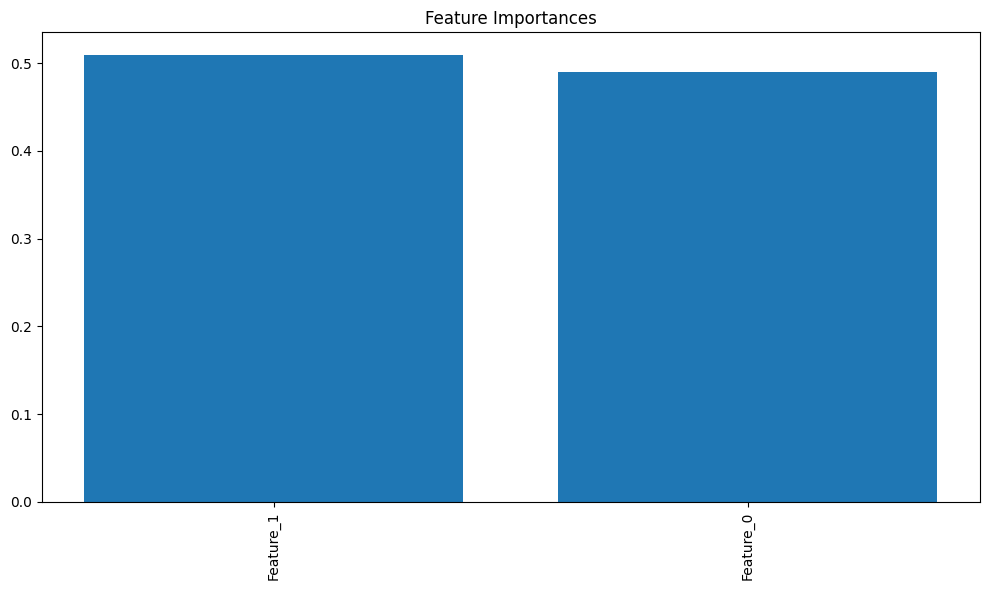

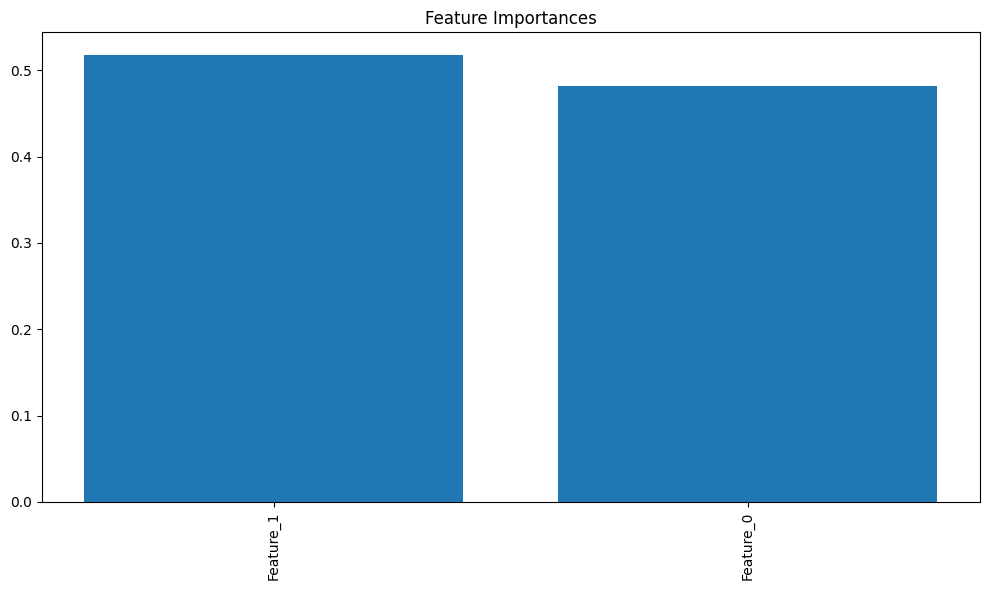

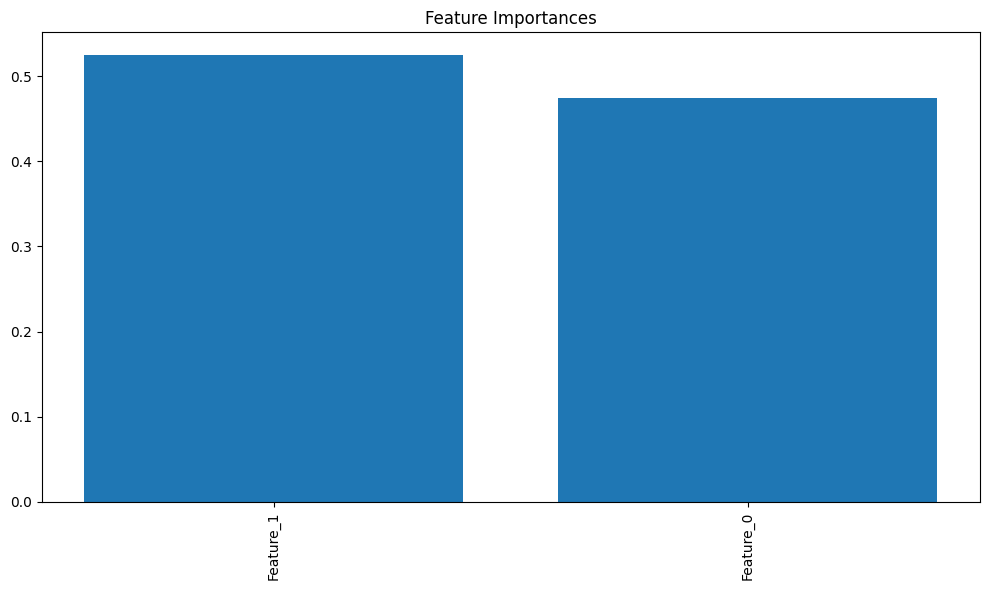

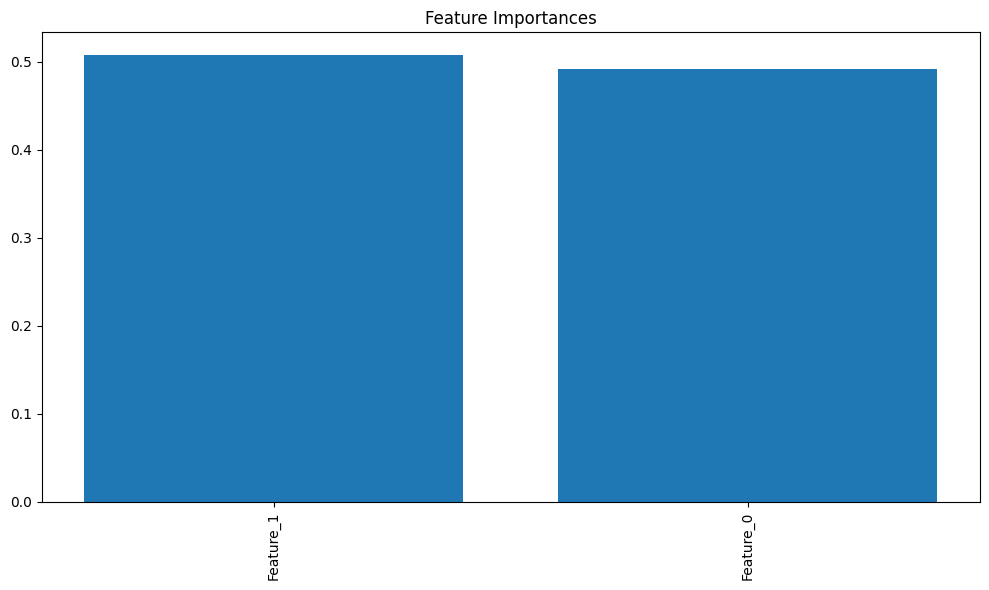

In [80]:
liste = run_classification(100)

In [81]:
print(liste)

[0.548, 0.547, 0.587, 0.544, 0.538, 0.595, 0.558, 0.592, 0.564, 0.559, 0.579, 0.597, 0.532, 0.587, 0.575, 0.6, 0.543, 0.565, 0.547, 0.556, 0.58, 0.557, 0.577, 0.562, 0.548, 0.503, 0.584, 0.524, 0.523, 0.578, 0.558, 0.554, 0.568, 0.535, 0.539, 0.56, 0.552, 0.59, 0.576, 0.542, 0.522, 0.576, 0.549, 0.525, 0.543, 0.572, 0.558, 0.568, 0.564, 0.571, 0.574, 0.57, 0.587, 0.531, 0.534, 0.589, 0.562, 0.564, 0.515, 0.556, 0.567, 0.542, 0.528, 0.528, 0.528, 0.503, 0.543, 0.6, 0.584, 0.521, 0.544, 0.575, 0.54, 0.548, 0.593, 0.555, 0.645, 0.57, 0.562, 0.57, 0.578, 0.58, 0.531, 0.54, 0.55, 0.555, 0.542, 0.543, 0.53, 0.595, 0.545, 0.562, 0.529, 0.586, 0.525, 0.539, 0.502, 0.55, 0.548, 0.504]


In [82]:
print(np.mean(np.array(liste)))

0.55633


In [83]:
print(np.std(np.array(liste)))

0.02512490995008736
